In [1]:
from data_col import *
from process import *
from classify import *
from analyse import *
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import scipy
pd.options.display.max_rows = 999
pd.set_option('precision', 5)
plt.rcParams['figure.figsize'] = [5, 5]

In [546]:
def color_col(v):
    if "logl2" in v.name:
        return ['background-color: yellow' if i == 1 else "" for i in v]
    elif "multi" in v.name:
        return ['background-color: red' if i == 1 else "" for i in v]
    elif "entropy" in v.name:
        return ['background-color: blue' if i == 1 else "" for i in v]
    elif "ksconf" in v.name:
        return ['background-color: green' if i == 1 else "" for i in v]
    else:
        return ['' for _ in v]
    return res

def color_col_data(v):
    if "Res" in v.name:
        return ['background-color: green' if i == 1 else "" for i in v]
    elif "Suq" in v.name:
        return ['background-color: blue' if i == 1 else "" for i in v]
    else:
        return ['' for _ in v]
    return res


def col_simple(v):
    return ['background-color: green' if i == 1 else "" for i in v]

def col_min(v, ref):
    v2 = v.values
    return ['background-color: #84befb' if v2[i] == ref[i] else "" for i in range(len(v2))]

def compute_first_1(dfs, pro, data_name=None, as_df=True):
    data = []
    for j in range(len(dfs)):
        df = dfs[j]
        p = pro[j]
        for d in df.groupby("alpha"):
                for i in p:
                    if data_name is not None:
                        dp = int(i.test_data.get_name().replace(data_name, ""))
                    else:
                        dp = i.test_data.get_name()
                    if len( d[1][d[1][i.get_name()]>=1])>0:
                        r = [dp, d[0], i.classifier.get_name(), d[1][d[1][i.get_name()]>=1].iloc[0]["bs"]]
                    else: 
                        r = [dp, d[0], i.classifier.get_name(), np.NaN]
                    data.append(r)
    if as_df:
        data = pd.DataFrame(data, columns=["percent", "alpha", "clf", "bs"])
    return data

def tr(df):
    return df

def tr2(df):
    m = {"ksconf": "max", "margin_0_1": "margin",  "entropy": "entropy", "geo": "geo", "l2": "l2" }
    df[["process","cdata","tdata"]] = (df["process"].str.split("-", expand=True))[[1,2,3]]
    df["scale"] = [int("".join([j if j.isnumeric() else "0" for j in i ])) for i in df["tdata"]]
    df["tdata"] = ["".join([j if not j.isnumeric() else "" for j in i ])[3:] for i in df["tdata"]]
    df["cdata"] = [i[:3] if i[:3]!="Suq" else "Squ"  for i in df["cdata"]]
    df["process"] = [m[i] for i in df["process"]]
    df = df[["cdata","tdata", "scale", "process", "bs", "alpha", "result"]] 
    return df

def tr3(df):
    m = {"ksconf": "max", "margin_0_1": "margin",  "entropy": "entropy", "geo": "geo", "l2": "l2" , 
         "multi_ksconf_p2_p3": "proj", "emulti_ksconf_p2_p3": "proj_e", 
         "multi_ksconf_entropy_geo_margin_0_1_l2": "all", "emulti_ksconf_entropy_geo_margin_0_1_l2":"all_e"}
    df[["process","cdata","tdata"]] = (df["process"].str.split("-", expand=True))[[1,2,3]]
    df["scale"] = [int("".join([j if j.isnumeric() else "0" for j in i ])) for i in df["tdata"]]
    df["tdata"] = ["".join([j if not j.isnumeric() else "" for j in i ])[3:] for i in df["tdata"]]
    df["cdata"] = [i[:3] if i[:3]!="Suq" else "Squ"  for i in df["cdata"]]
    df["process"] = [m[i] for i in df["process"]]
    df = df[["cdata","tdata", "scale", "process", "bs", "alpha", "result"]] 
    df1 = df[df["tdata"]!="Val"].copy().set_index(["cdata",  "process", "bs", "alpha"])
    df2 = df[df["tdata"]=="Val"].copy().set_index(["cdata", "process", "bs", "alpha"]).rename(columns={"result":"val"}).drop(columns=["scale", "tdata"])
    df = df1.join(df2).reset_index()[['cdata', 'tdata', 'scale', 'process', 'bs', 'alpha','val', 'result']]
    return df

In [688]:
sing = [BasicClassifier(), EntropyClassifier(), GeoClassifier(aggregate_interval=None), MarginClassifier(), L2Classifier()]
mproj = [MultiClassifier([BasicClassifier(), Basic2Classifier(), Basic3Classifier()]), EmpiricMultiClassifier([BasicClassifier(), Basic2Classifier(), Basic3Classifier()])]
mall = [MultiClassifier(sing), EmpiricMultiClassifier(sing)]
mulitbon = sing + [mproj[0], mall[0]]
allclf = sing + mproj + mall



In [ ]:

pSN = [[Process(SquCal[0], i, j)  for j in sing] for i in SquN]
anaSN = [Analysis(i) for i in pSN]
dfsSN = [tr(a.flatten_results()) for a in anaSN]
repSN = [tr(a.compose_report()) for a in anaSN]

pRN = [[Process(ResCal[0], i, j)  for j in sing] for i in ResN]
anaRN = [Analysis(i) for i in pRN]
dfsRN = [tr(a.flatten_results()) for a in anaRN]
repRN = [tr(a.compose_report()) for a in anaRN]

pN = [[Process(SquCal[0], i, j)  for j in sing] for i in SquN] + [[Process(ResCal[0], i, j)  for j in sing] for i in ResN]
anaN = [Analysis(i) for i in pN]
dfsN = [tr(a.flatten_results()) for a in anaN]
repN = [tr(a.compose_report()) for a in anaN]

pSD = [[Process(SquCal[0], i, j)  for j in sing] for i in SquD]
anaSD = [Analysis(i) for i in pSD]
dfsSD = [tr(a.flatten_results()) for a in anaSD]
repSD = [tr(a.compose_report()) for a in anaSD]

pRD = [[Process(ResCal[0], i, j)  for j in sing] for i in ResD]
anaRD = [Analysis(i) for i in pRD]
dfsRD = [tr(a.flatten_results()) for a in anaRD]
repRD = [tr(a.compose_report()) for a in anaRD]

pD = [[Process(SquCal[0], i, j)  for j in sing] for i in SquD] + [[Process(ResCal[0], i, j)  for j in sing] for i in ResD]
anaD = [Analysis(i) for i in pD]
dfsD = [tr(a.flatten_results()) for a in anaD]
repD = [tr(a.compose_report()) for a in anaD]

pSA = [[Process(SquCal[0], i, j)  for j in sing] for i in SquOOS]
anaSA = [Analysis(i) for i in pSA]
dfsSA = [tr(a.flatten_results()) for a in anaSA]
repSA = [tr(a.compose_report()) for a in anaSA]

pRA = [[Process(ResCal[0], i, j)  for j in sing] for i in ResOOS]
anaRA = [Analysis(i) for i in pRA]
dfsRA = [tr(a.flatten_results()) for a in anaRA]
repRA = [tr(a.compose_report()) for a in anaRA]

pA = [[Process(SquCal[0], i, j)  for j in sing] for i in SquOOS] + [[Process(ResCal[0], i, j)  for j in sing] for i in ResOOS]
anaA = [Analysis(i) for i in pA]
dfsA = [tr(a.flatten_results()) for a in anaA]
repA = [tr(a.compose_report()) for a in anaA]

pAwA = [[Process(SquCal[0], i, j)  for j in sing] for i in SquAwA] +  [[Process(ResCal[0], i, j)  for j in sing] for i in ResAwA]
anaAwA = [Analysis(i) for i in pAwA]
dfsAwA = [tr(a.flatten_results()) for a in anaAwA]
repAwA = [tr(a.compose_report()) for a in anaAwA]

dic = {
    "SN":[pSN, anaSN, dfsSN, repSN],
    "SD":[pSD, anaSD, dfsSD, repSD],
    "SA":[pSA, anaSA, dfsSA, repSA],
    "RN":[pRN, anaRN, dfsRN, repRN],
    "RD":[pRD, anaRD, dfsRD, repRD],
    "RA":[pRA, anaRA, dfsRA, repRA],
    "N":[pN, anaN, dfsN, repN],
    "D":[pD, anaD, dfsD, repD],
    "A":[pA, anaA, dfsA, repA],
    "AwA":[pAwA, anaAwA, dfsAwA, repAwA]
}



In [459]:
pAll = [Process(SquCal[0], i, j)  for j in sing for i in SquOOS] + [Process(ResCal[0], i, j)  for j in sing for i in ResOOS] + [Process(MobCal[0], i, j)  for j in sing for i in MobOOS]
anaAll = Analysis(pAll)
dfsAll = tr2(anaAll.flatten_results())
repAll = anaAll.compose_report()

vpAll = [Process(SquCal[0], i, j)  for j in sing for i in SquTest] + [Process(ResCal[0], i, j)  for j in sing for i in ResTest] + [Process(MobCal[0], i, j)  for j in sing for i in MobTest]
vanaAll = Analysis(vpAll)
vdfsAll = tr3(vanaAll.flatten_results())
vrepAll = vanaAll.compose_report()

In [956]:
vpAll = [Process(SquCal[0], i, j)  for j in sing+mall for i in SquTest] + [Process(ResCal[0], i, j)  for j in sing+mall for i in ResTest] + [Process(MobCal[0], i, j)  for j in sing+mall for i in MobTest]
vanaAll = Analysis(vpAll)
vrepAll = vanaAll.compose_report()
vdfsAll = tr3(vanaAll.flatten_results())


In [32]:
def first_100(df, cdata, tdata, alpha, pivot=False):
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & (df["alpha"]==alpha) &( df["result"]>=1.0)].copy()
    df = df.groupby(["process", "scale"]).head(1)
    if pivot:
        df = df.pivot(index='scale', columns='process', values='bs').copy()
    return df

def fist_100_total(df, cdata, tdata, alpha, plot=False):
    df = first_100(df, cdata, tdata, alpha, True)
    #df = df.pivot(index='scale', columns='process', values='bs')
    if plot:
        sns.heatmap(df, annot=True, cmap="YlGnBu_r", norm=LogNorm(), fmt=".0f")
    return df
    
def fist_100_rel(df, cdata, tdata, process=None, alpha=None, plot=False):
    if alpha is None:
        alpha = df["alpha"].unique()
    elif not isinstance(alpha, list):
        alpha = [alpha]
    for c, i in enumerate(alpha):           
        bdf = first_100(df, cdata, tdata, i, True)
        if process is None:
            means = bdf.mean(axis=1)
        else:
            means = bdf[process]
        bdf =  bdf.divide(means, axis=0)
        if c == 0:
            new_df = bdf.copy()
        else:
            new_df = new_df + bdf
    new_df = new_df / len(alpha)
    if plot:
        sns.heatmap(new_df, annot=True, cmap="YlGnBu_r", fmt=".4f")
    return new_df
        
def fist_100_winner(df, cdata, tdata, alpha=None, plot=False):
    if alpha is None:
        alpha = df["alpha"].unique()
    elif not isinstance(alpha, list):
        alpha = [alpha]
    for c, i in enumerate(alpha):           
        bdf = first_100(df, cdata, tdata, i, True)
        m_val = bdf.min(axis=1)
        bdf =  bdf.divide(m_val, axis=0)
        bdf[bdf>1] = 0
        if c == 0:
            new_df = bdf.copy()
        else:
            new_df = new_df + bdf
    new_df = new_df
    if plot:
        sns.heatmap(new_df, annot=True, cmap="YlGnBu", fmt=".0f")
    return new_df

def fist_100_ranked(df,plot=False):
    new_df = pd.DataFrame(columns=df.columns)
    for i in df.groupby(["bs", "alpha"]):
        for n, j in enumerate(i[1].groupby(["cdata", "tdata"])):
            v = j[1].sort_values(by="result")[["bs", "alpha", "process", "result"]]
            v["result"] = range(1,len(v["result"])+1)
            #m = v[v["process"]=="ksconf"]["result"].values
            #v["result"] = v["result"]-m
            v = v.sort_values(by="process")
            if n == 0:
                bdf = v
            else:
                bdf["result"] = bdf["result"].values + v["result"].values
        bdf["result"] =  bdf["result"] / (n+1)
        new_df = pd.concat([new_df, bdf])
    return new_df
        #sns.heatmap(df, annot=True, cmap="YlGnBu_r", norm=LogNorm(), fmt=".0f")

def get_experiment(df, cdata, tdata, scale=None, alpha=None, bs=None, process=None, pivot=False, color=False):
    alpha = select_vals(df, alpha, "alpha")
    bs = select_vals(df, bs, "bs")
    scale = select_vals(df, scale, "scale")
    process = select_vals(df, process, "process")
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata)  & (df["process"].isin(process)) & (df["bs"].isin(bs)) & (df["alpha"].isin(alpha)) &( df["scale"].isin(scale))].copy()
    if pivot:
        df = df.pivot(index='bs', columns='alpha', values='result')
    if color:
        df.style.apply(col_simple)
    return df

def draw_roc_alpha(df, cdata, tdata, bs, scale=None, process=None):
    r_scale = scale
    r_process = process
    scale = select_vals(df, scale, "scale")
    process = select_vals(df, process, "process")
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & (df["bs"]==bs)& (df["process"].isin(process)) &( df["scale"].isin(scale))].copy()
    if r_scale is None:
        sns.relplot(kind="line", data=df, x="alpha", y="result", hue="scale", row="process", palette="muted")
    else:
        sns.relplot(kind="line", data=df, x="alpha", y="result", hue="process", palette="muted")
    return df

def draw_roc_bs(df, cdata, tdata, alpha, scale=None, process=None):
    r_scale = scale
    r_process = process
    scale = select_vals(df, scale, "scale")
    process = select_vals(df, process, "process")
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & (df["alpha"]==alpha)& (df["process"].isin(process)) &( df["scale"].isin(scale))].copy()
    if r_scale is None:
        g = sns.relplot(kind="line", data=df, x="bs", y="result", hue="scale", row="process", palette="muted")
    else:
        g = sns.relplot(kind="line", data=df, x="bs", y="result", hue="process", palette="muted")
    g.set(xscale="log")
    return df

def select_vals(df,  val, name):
    if isinstance(val, str):
        val = [val]
    if isinstance(val, int):
        val = [val]
    if isinstance(val, float):
        val = [val]
    if val is None:
        val = df[name].unique()
    return val

def compute_auc(df, cdata, tdata, bs, scale, process):
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & (df["bs"]==bs)& (df["process"]== process) &( df["scale"]==scale)].copy()
    return metrics.auc(x=df["alpha"], y=df["result"])

def compute_aucs(df):
    c = ["cdata", "tdata", "scale", "process", "bs"]
    for i,d in enumerate(df.groupby(["cdata", "tdata", "scale", "process", "bs"])):
        if i == 0:
            new_df = pd.DataFrame(columns=c+["auc"])
        auc = metrics.auc(x=d[1]["alpha"], y=d[1]["result"])
        row = list(d[0]) + [auc]
        bdf = pd.DataFrame([row], columns=c + ["auc"])
        new_df = new_df.append(bdf)
    new_df = new_df.reset_index(drop=True)
    return new_df

def plot_aucs(df, cdata, tdata, scale):
    df = compute_aucs(df)
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & ( df["scale"]==scale)]
    g = sns.relplot(kind="line", data=df, x="bs", y="auc", hue="process")
    g.set(xscale="log")

def compute_aucs_aucs(df):
    df = compute_aucs(df)
    c = ["cdata", "tdata", "scale", "process"]
    for i,d in enumerate(df.groupby(["cdata", "tdata", "scale", "process"])):
        if i == 0:
            new_df = pd.DataFrame(columns=c+["auc2"])
        auc = metrics.auc(x=d[1]["bs"], y=d[1]["auc"])
        row = list(d[0]) + [auc]
        bdf = pd.DataFrame([row], columns=c + ["auc2"])
        new_df = new_df.append(bdf)
    new_df = new_df.reset_index(drop=True)
    return new_df

def plot_aucs_heat(df, cdata, tdata, process):
    df = compute_aucs(df)
    df = df[(df["cdata"]==cdata) & (df["tdata"]==tdata)& (df["process"]==process)]
    df = df.pivot(index="scale", columns="bs", values="auc")
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f" )
    return df

def plot_all_auc_heat(df, process=None):
    df = compute_aucs(df).copy()
    df = df[df["process"]==process].copy()
    df["data"] = list(zip(df["cdata"], df["tdata"], df["scale"]))
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    df = df.pivot(index="data", columns="bs", values="auc")
    sns.heatmap(df, cmap="YlGnBu", fmt=".5f", norm=LogNorm())
    
def plot_aucs_aucs_heat(df, cdata, tdata):
    df = compute_aucs_aucs(df)
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata)]
    df = df.pivot(index='scale', columns='process', values='auc2')
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f", )
    return df

def plot_aucs_aucs_line(df, cdata, tdata):
    df = compute_aucs_aucs(df)
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata)]
    df = df.pivot(index='scale', columns='process', values='auc2')
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f", )
    return df

def compute_rel_values2(df):
    for i in df["process"].unique():
        new_df.loc[new_df["process"]==i,"rel"] = df[df["process"]==i]["result"].values / df2[df2["process"]=="max"]["result"].values
    return new_df

def compute_rel_values(df):
    dfnz = df.copy()
    for i, d in enumerate(dfnz.groupby("process")):
        b = d[1].copy()
        b["result"] = b["result"].values/dfnz[dfnz["process"]=="max"]["result"].values
        #print(b)
        if i == 0:
            new_df = b
        else:
            new_df = pd.concat([new_df, b])
    new_df = new_df.replace([np.inf, -np.inf], np.nan)
    new_df= new_df.dropna()
    return new_df

def plot_rel_heat(df, cdata, tdata, **kwargs):
    df = compute_rel_values(df)
    df = df[(df["cdata"]==cdata) & (df["tdata"]==tdata)]
    df = df.groupby(["scale","process"]).mean()
    df = df.reset_index()
    df = df.pivot(index="scale", columns="process", values="result")
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".4f",  **kwargs)
    return df
    
def plot_rel_val_distr(df, process=None):
    df = compute_rel_values(df)
    if process is None:
        g = sns.displot(kind="kde", cut=0, x="result",hue="process", data=df)
    else:
        df = df[df["process"]==process]
        g = sns.displot(kind="kde", cut=0, x="result", data=df)
    g.set(xscale="log")
    
def plot_rel_val_box(df):
    ndf = df[df["cdata"]=="Squ"].copy()
    ndf["resultS"] = ndf["result"]
    del ndf["result"]
    del ndf["cdata"]
    ndf["resultR"] = df[df["cdata"]=="Res"]["result"].values
    ndf["diff"] = np.abs(ndf["resultS"]-ndf["resultR"])
    data = []
    for i in ndf.groupby(["process", "alpha", "bs"]):
        data.append([j for j in i[0]] + [i[1]["diff"].min(),i[1]["diff"].mean(),i[1]["diff"].max()])
    
    rdf = pd.DataFrame(data, columns=["process", "alpha", "bs", "min", "mean", "max"])
    ax = sns.boxplot(x="process", y="mean", data=rdf, whis=np.inf)
    sns.stripplot(x="process", y="mean", color="black", size=3, data=rdf, ax=ax)
    
def plot_conv(df, cdata, para):
    df = compute_rel_values(df)
    rel_df = (df[(df["cdata"]==cdata) ].groupby(["process",para])).mean()
    g = sns.lineplot(data=rel_df, x=para, y="result", hue="process")
    g.set(xscale="log")

In [834]:

def plot_all_auc_heat(df, process=None):
    df = compute_aucs(df).copy()
    df["data"] = list(zip(df["tdata"],df["cdata"], df["scale"]))
    if process is not None:
        df = df[df["process"]==process].copy()
        df = df.pivot(index="data", columns="bs", values="auc")
    else:
        df["run"] = list(zip(df["process"], df["bs"]))
        df = df.pivot(index="data", columns="run", values="auc")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df, cmap="YlGnBu", fmt=".5f", norm=LogNorm())
    

def plot_all_heat(df):
    df = df.copy()
    df["data"] = list(zip(df["cdata"],df["tdata"], df["scale"],  df["alpha"]))
    df["run"] = list(zip(df["process"], df["bs"]))
    df = df.pivot(index="data", columns="run", values="result")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df, cmap="YlGnBu_r", fmt=".5f", norm=LogNorm())
    
def plot_all_auc_auc_heat(df, cdata, **kwargs):
    df = compute_aucs_aucs(df).copy()
    df = df[df["cdata"]==cdata]
    df["data"] = list(zip(df["tdata"], df["scale"]))
    #df["run"] = list(zip(df["process"],df["cdata"]))
    df = df.pivot(index="data", columns="process", values="auc2")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df, cmap="YlGnBu", fmt=".5f", **kwargs)
    return df
    
    
def rel_to_mean(df, relate_foo=None):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    ind = ['cdata', 'tdata', 'scale','bs', 'alpha']
    df_mean =df.groupby(ind).mean()
    df_mean= df_mean.rename(columns={"result":"mean"})
    df = df.set_index(ind + ["process"])
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    return df

def rel_to_ks(df, relate_foo=None):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    ind = ['cdata', 'tdata', 'scale','bs', 'alpha']
    df_mean =df[df["process"]=="max"]
    df_mean= df_mean.rename(columns={"result":"mean"})
    df = df.set_index(ind + ["process"])
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    return df

def rel_to_ks(df, relate_foo=None, para=None):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    if para is None:
        para = "max"
    ind = ['cdata', 'tdata', 'scale','bs', 'alpha']
    df_mean =df[df["process"]==para]
    df_mean= df_mean.rename(columns={"result":"mean"})
    df = df.set_index(ind + ["process"])
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    return df


def plot_rel_mean(df, relate_foo=None, **kwargs):
    if relate_foo is None:
        relate_foo = lambda x,y: (x-y)/y
    df = rel_to_mean(df, relate_foo)
    df = df.groupby( ['cdata', 'tdata', 'scale','process']).mean().reset_index()
    df["data"] = list(zip(df["tdata"], df["scale"]))
    df["run"] = list(zip(df["process"],df["cdata"]))
    df = df.pivot(index="data", columns="run", values="result")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df, cmap="vlag" ,center=0, fmt=".5f", **kwargs)
    
def plot_vuc_all_in_one(df, **kwargs):
    df = volume_under_curves(df)
    df = df.groupby( ['cdata', 'tdata', 'scale','process']).mean().reset_index()
    df["data"] = list(zip(df["tdata"], df["scale"]))
    df["run"] = list(zip(df["cdata"],df["process"]))
    df = df.pivot(index="data", columns="run", values="vuc")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df,  annot=True, cmap="YlGnBu", fmt=".3f", **kwargs)
    
def plot_vuc_for_all_process(df):
    def draw_p(data, **kwargs):
        print(data)
        data = data.pivot(index='scale', columns='process', values='vuc')
        sns.heatmap(data, annot=True, cmap="YlGnBu", fmt=".3f", **kwargs )
    df = volume_under_curves(df)
    g = sns.FacetGrid(df,  col="cdata", row="tdata")
    g.map_dataframe(draw_p)
    return df

def sub_plot_vuc_all_in_one(df, **kwargs):
    df = df.groupby( ['cdata', 'tdata', 'scale','process']).mean().reset_index()
    df["data"] = list(zip(df["tdata"], df["scale"]))
    df["run"] = list(zip(df["cdata"],df["process"]))
    df = df.pivot(index="data", columns="run", values="vuc")
    #df.set_index(["cdata", "tdata", "scale", "bs"])
    sns.heatmap(df,  annot=True, cmap="YlGnBu", fmt=".3f", **kwargs)


def plot_rel_to_mean(df, cdata, para):
    df = rel_to_mean(df)
    rel_df = (df[(df["cdata"]==cdata) ].groupby(["process",para])).mean()
    g = sns.lineplot(data=rel_df, x=para, y="result", hue="process")
    g.set(xscale="log")
    
def volume_under_curve(df, cdata, tdata, scale , process):
    df = df[(df["cdata"]==cdata) & (df["tdata"]==tdata)& (df["scale"]==scale) & (df["process"]==process)]
    return sub_vuc(df)

def sub_vuc(df, log=False):
    df = df.pivot(index="bs", columns="alpha", values="result")
    y = list(df.index)
    x = list(df.columns)
    #vol = scipy.interpolate.interp2d(x,y, list(df.values)).integral(min(x), max(x), min(y), max(x))
    if log:
        y = np.log(y)
    f = scipy.interpolate.interp2d(x,y, list(df.values))
    return scipy.integrate.dblquad(f, min(y),max(y), lambda a: min(x), lambda b: max(x))[0]



def volume_under_curves(df, log=False):
    new_data = []
    for i in df.groupby(["cdata", "tdata", "scale", "process"]):
        vol = sub_vuc(i[1], log)
        new_data.append(list(i[0])+[vol])
    df = pd.DataFrame(new_data, columns=["cdata", "tdata", "scale", "process", "vuc"])
    return df

def sub_true_vuc(df, log=False):
    dfp = df.pivot(index="bs", columns="val", values="result")
    y = list(dfp.index)
    x = list(dfp.columns)
    #vol = scipy.interpolate.interp2d(x,y, list(df.values)).integral(min(x), max(x), min(y), max(x))
    if log:
        y = np.log(y)
    f = scipy.interpolate.interp2d(x,y, list(dfp.values))
    return scipy.integrate.dblquad(f, min(y),max(y), lambda a: df["alpha"].min(), lambda b: df["alpha"].max())[0]



def true_volume_under_curves(df, log=False):
    new_data = []
    for i in df.groupby(["cdata", "tdata", "scale", "process"]):
        vol = sub_vuc(i[1], log)
        new_data.append(list(i[0])+[vol])
    df = pd.DataFrame(new_data, columns=["cdata", "tdata", "scale", "process", "vuc"])
    return df


def plot_volume_under_curves(df, cdata, tdata, scale, process):
    df = df[(df["cdata"]==cdata) & (df["tdata"]==tdata)& (df["scale"]==scale) & (df["process"]==process)]
    df = df.pivot(index="bs", columns="alpha", values="result")
    sns.heatmap(df, fmt=".5f", cmap="YlGnBu")
    
def plot_auc_4s_heat(df):
    def draw_p(data, **kwargs):
        data = data.pivot(index='scale', columns='process', values='vuc')
        sns.heatmap(data, annot=True, cmap="YlGnBu", fmt=".3f", **kwargs )
    #df = volume_under_curves(df)
    df = df[(df["tdata"]!="AwA")]
    g = sns.FacetGrid(df,  col="cdata", row="tdata")
    g.map_dataframe(draw_p)
    return df

def plot_vuc_4s_line(df):
    df = df[(df["tdata"]!="AwA")]
    g = sns.relplot(kind="line", data=df, x="scale", y="vuc", col="cdata", hue="process",row="tdata")
    return df

def plot_vuc_line(df, cdata, tdata):
    df = df[(df["cdata"]==cdata)&(df["tdata"]==tdata)]
    sns.relplot(kind="line", data=df, x="scale", y="vuc",  hue="process")

<IPython.core.display.Javascript object>


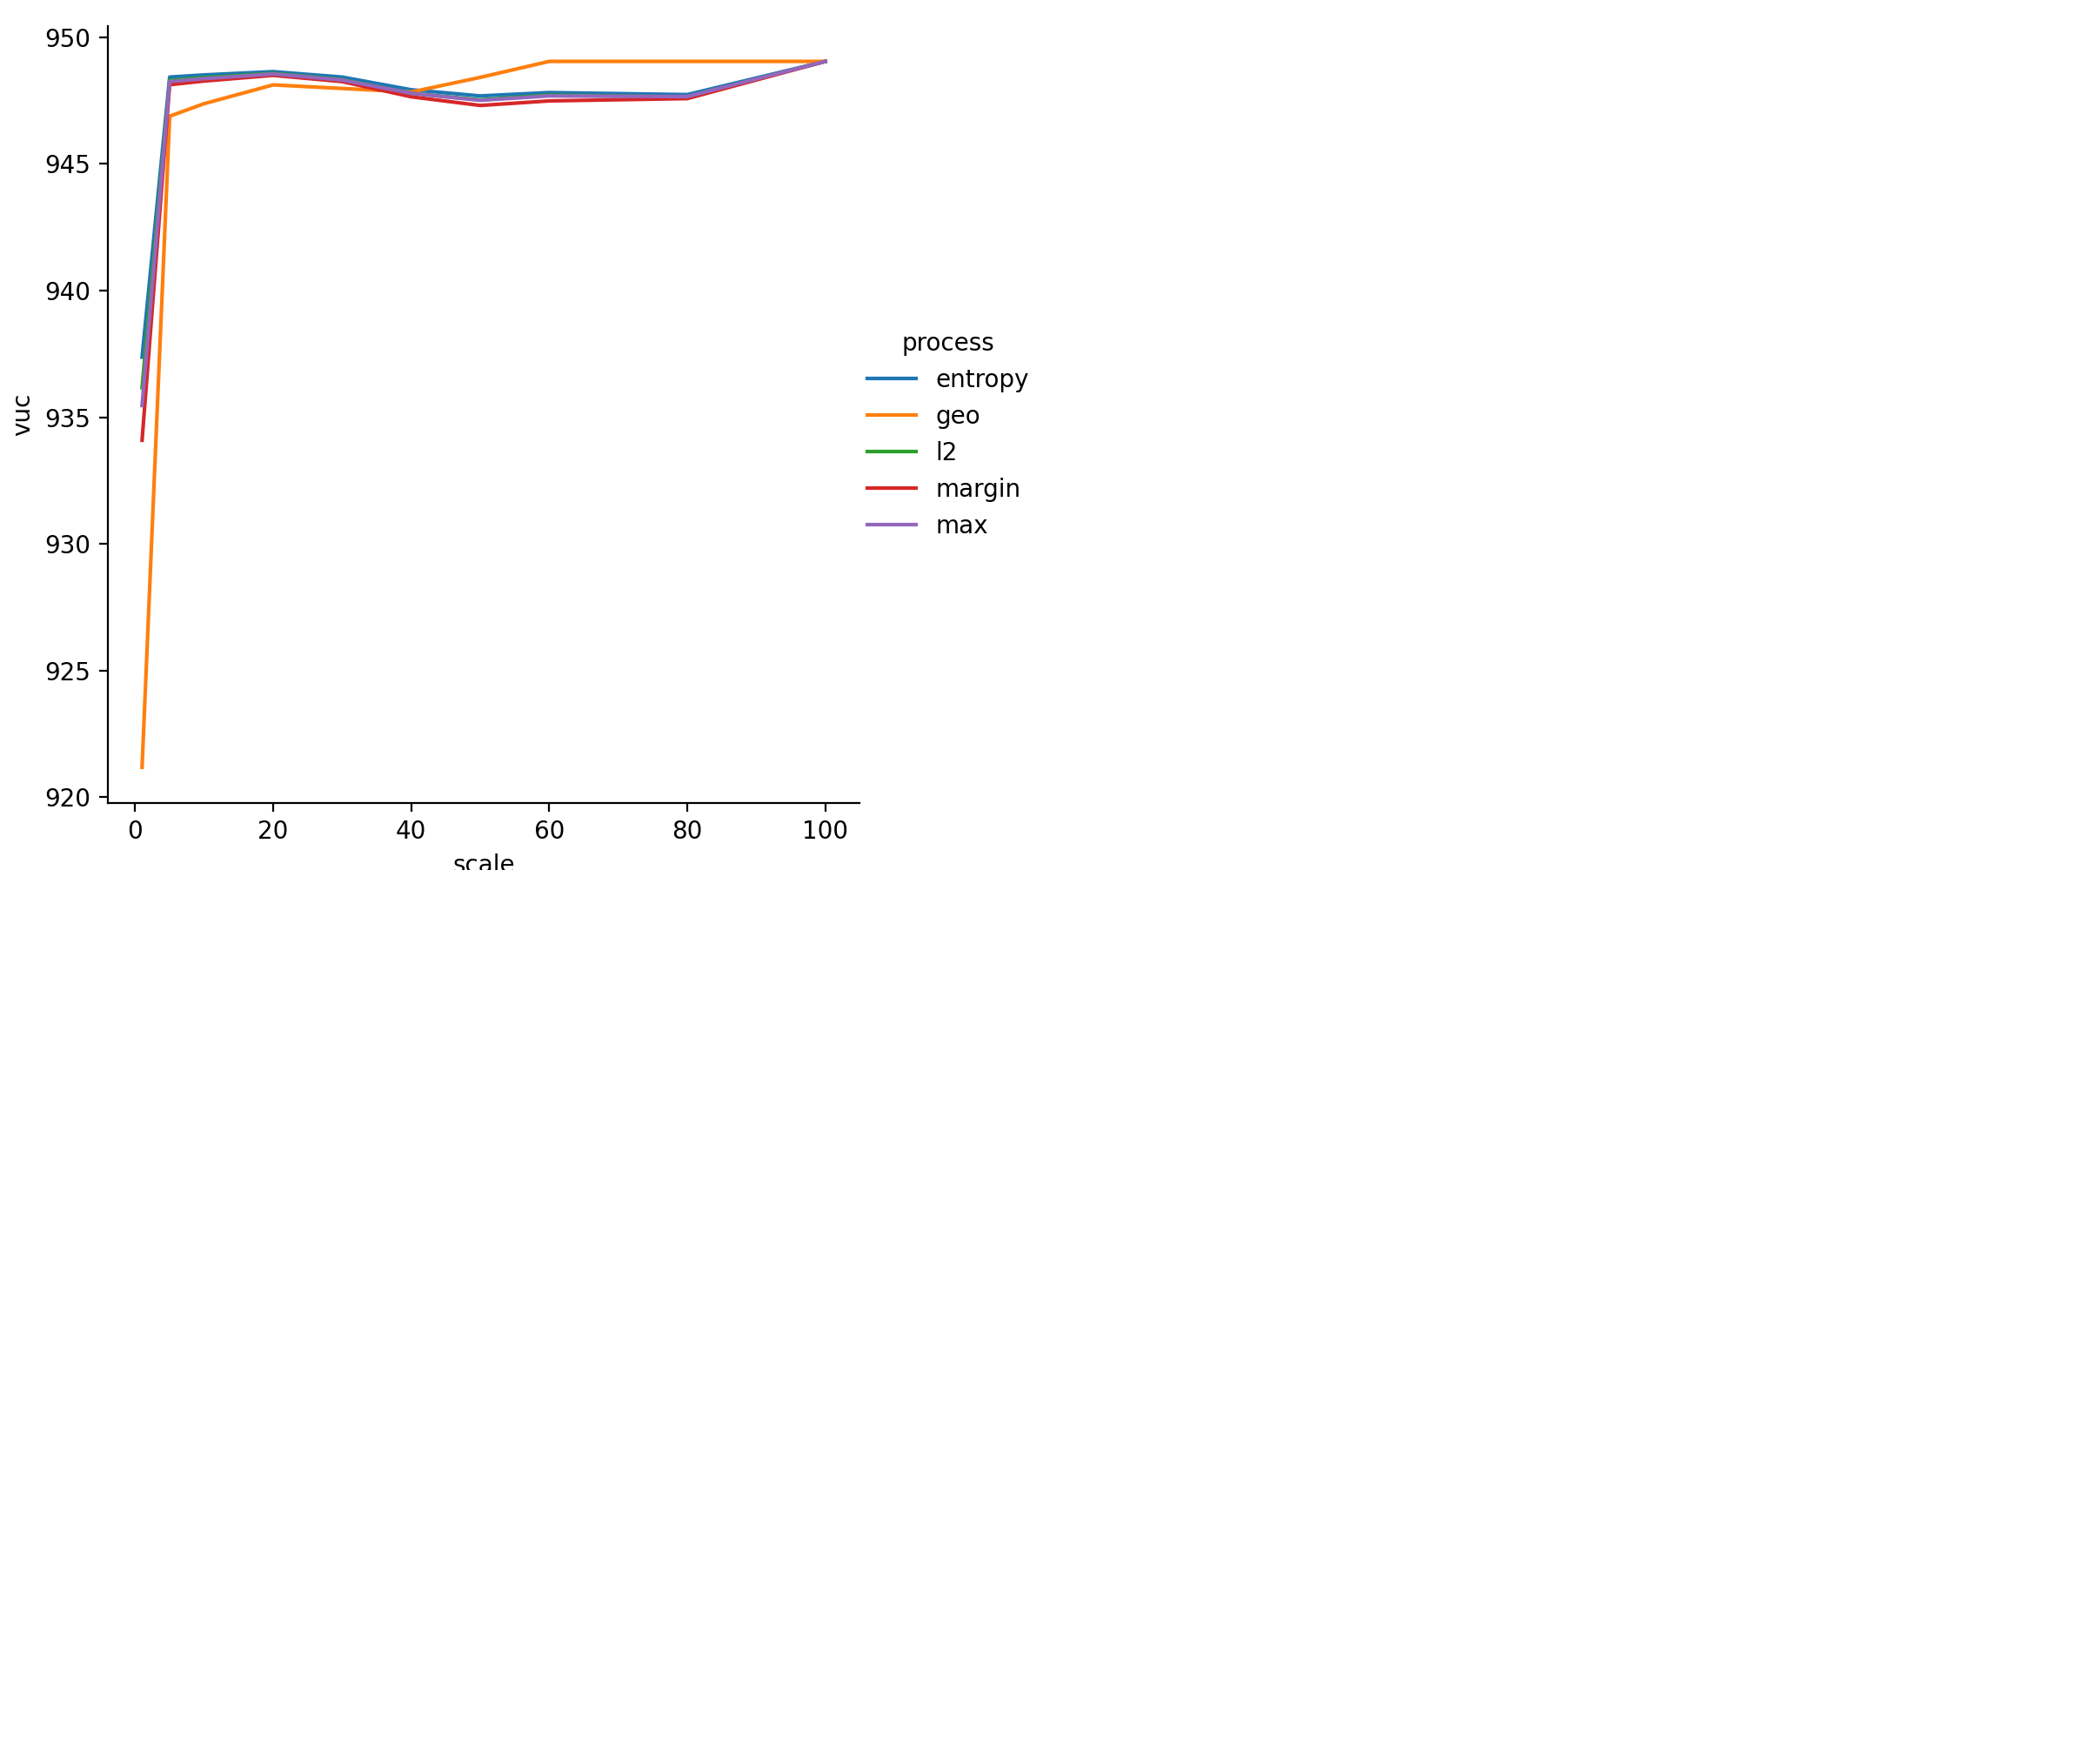

In [381]:
dfs

In [349]:
testdf["vuc"] = 1/testdf["vuc"]

<IPython.core.display.Javascript object>


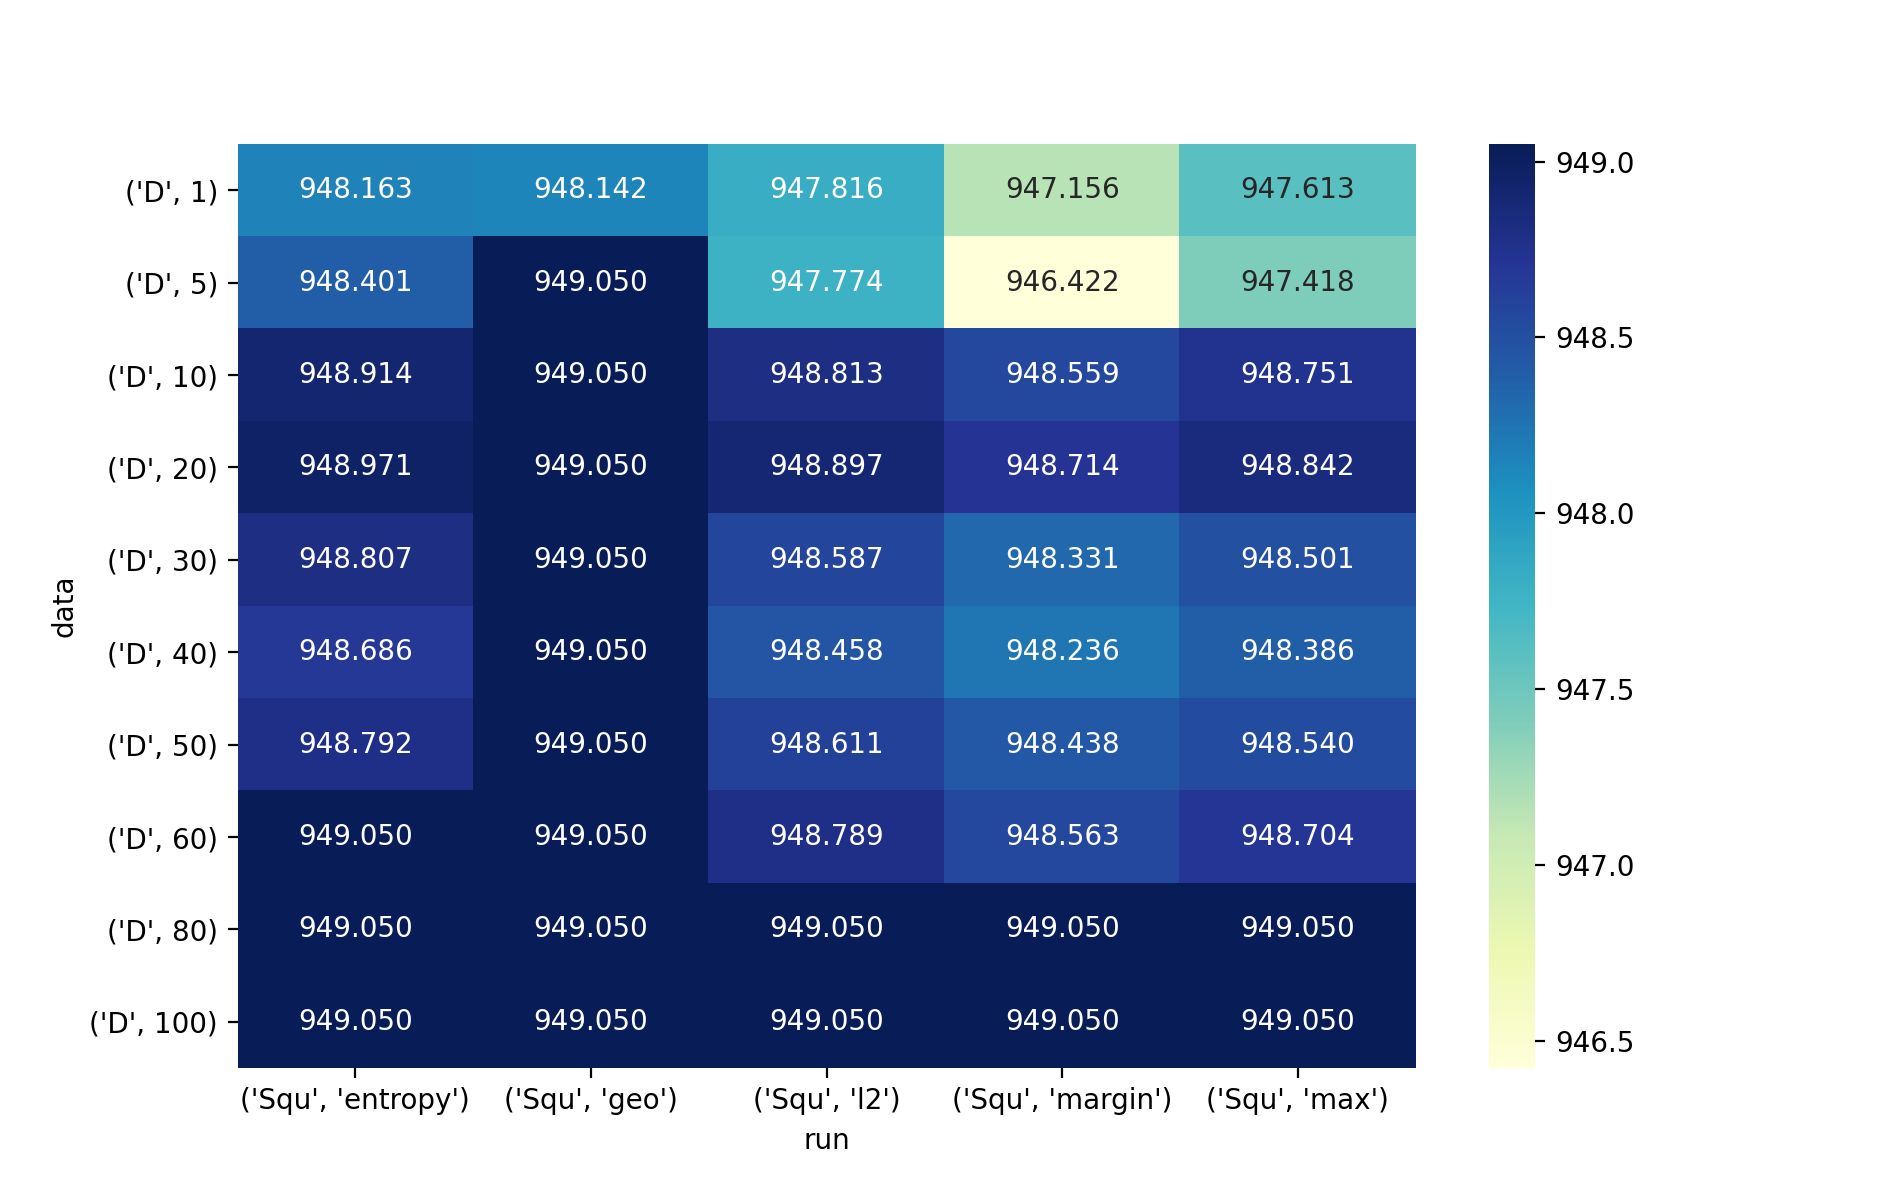

In [356]:
sub_plot_vuc_all_in_one(dfVuc[(dfVuc["cdata"]=="Squ") & (dfVuc["tdata"]=="D")])

<IPython.core.display.Javascript object>


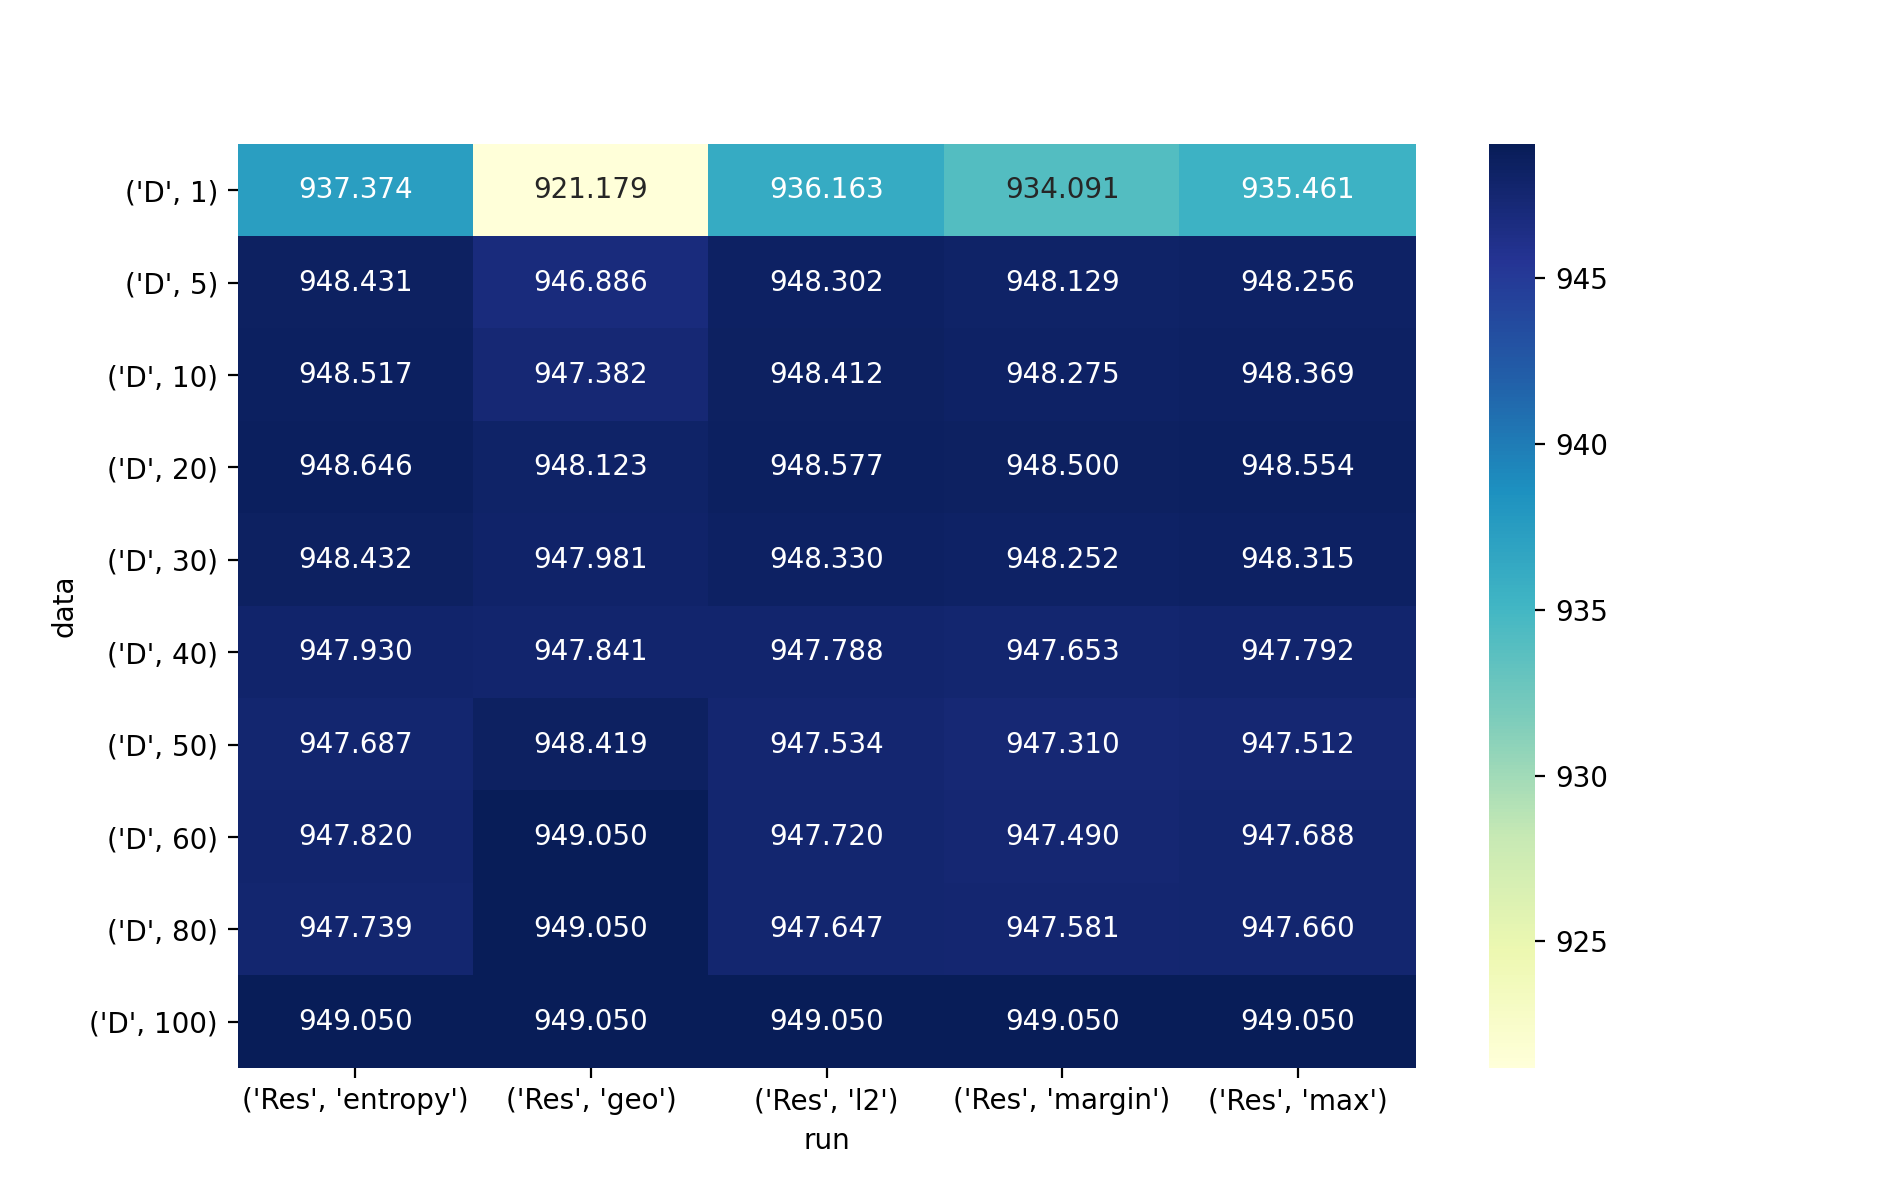

In [357]:
sub_plot_vuc_all_in_one(dfVuc[(dfVuc["cdata"]=="Res") & (dfVuc["tdata"]=="D")])

<IPython.core.display.Javascript object>


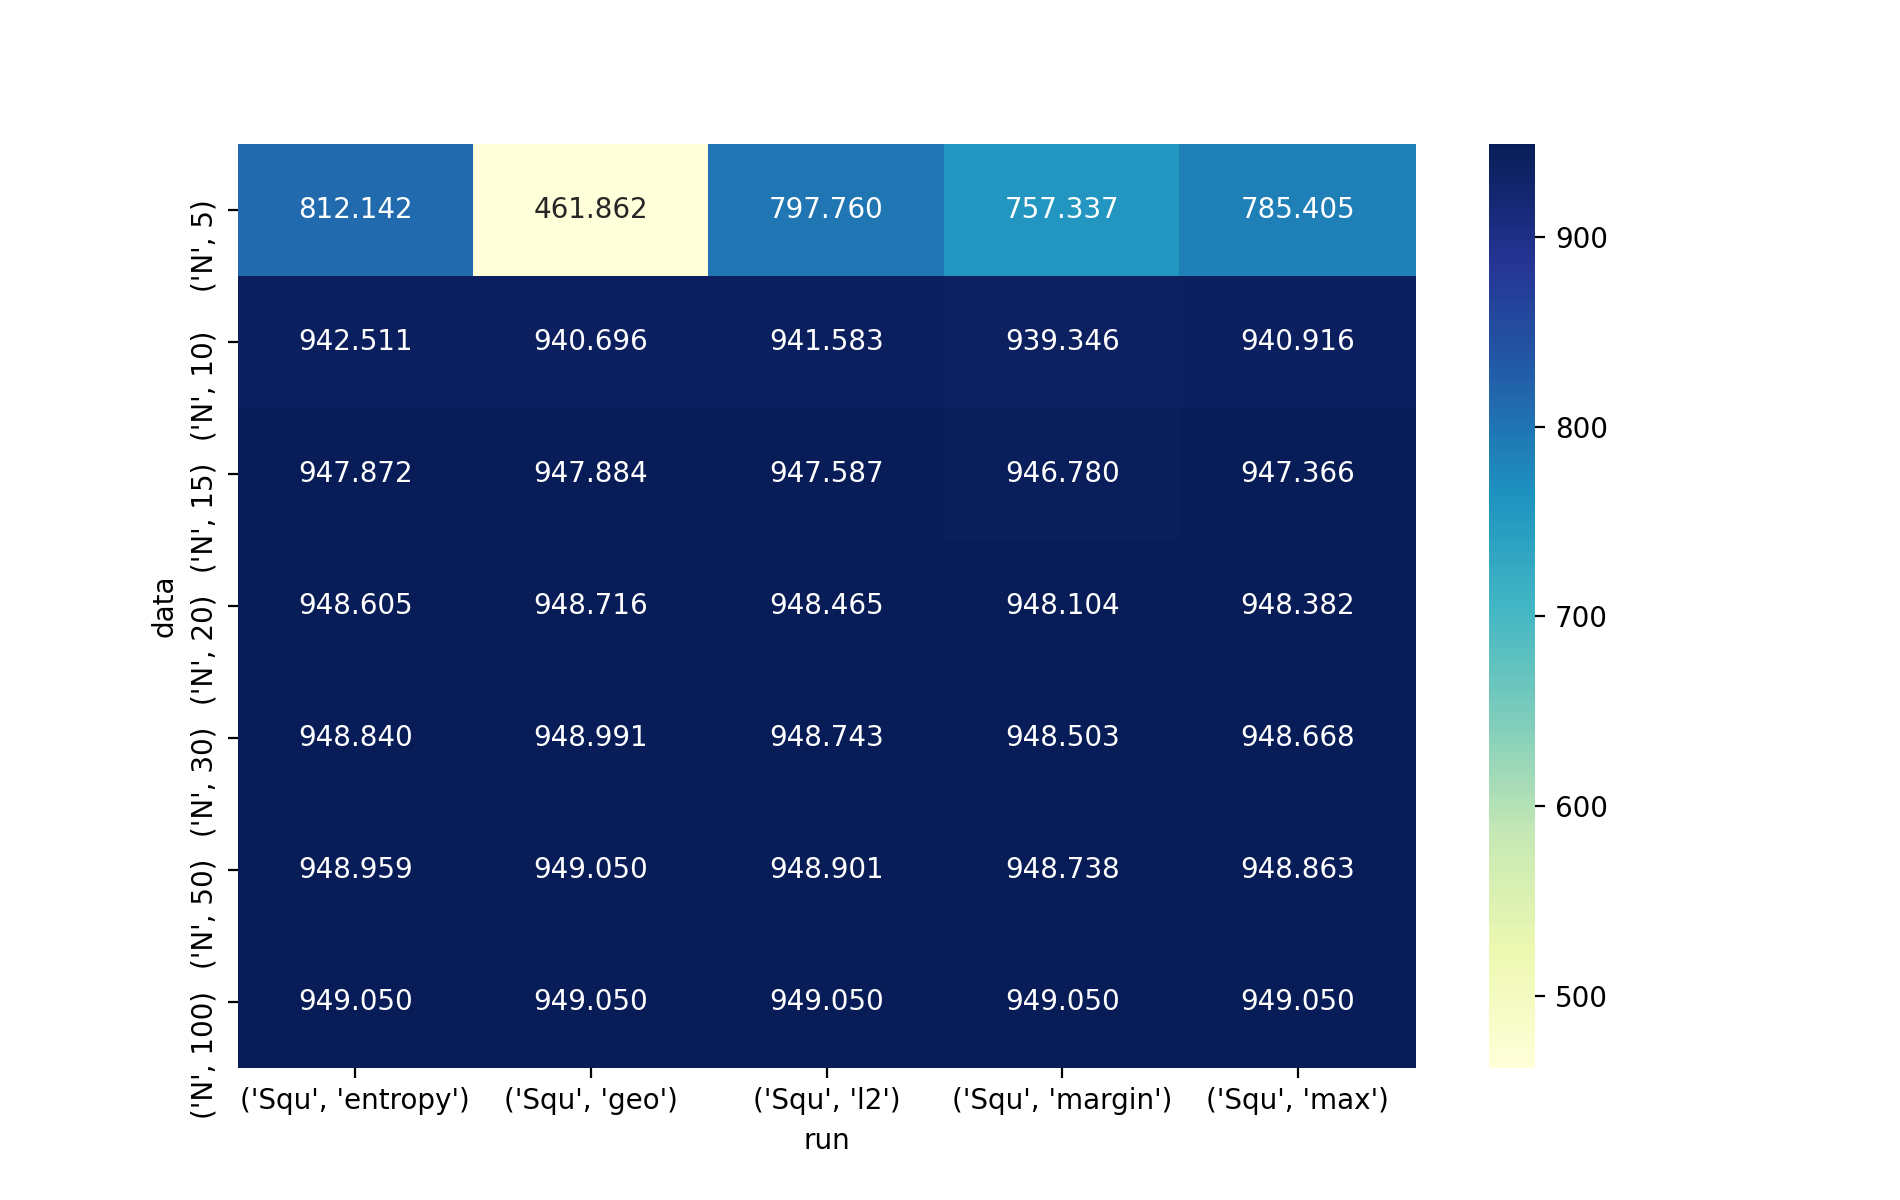

In [358]:
sub_plot_vuc_all_in_one(dfVuc[(dfVuc["cdata"]=="Squ") & (dfVuc["tdata"]=="N")])

<IPython.core.display.Javascript object>


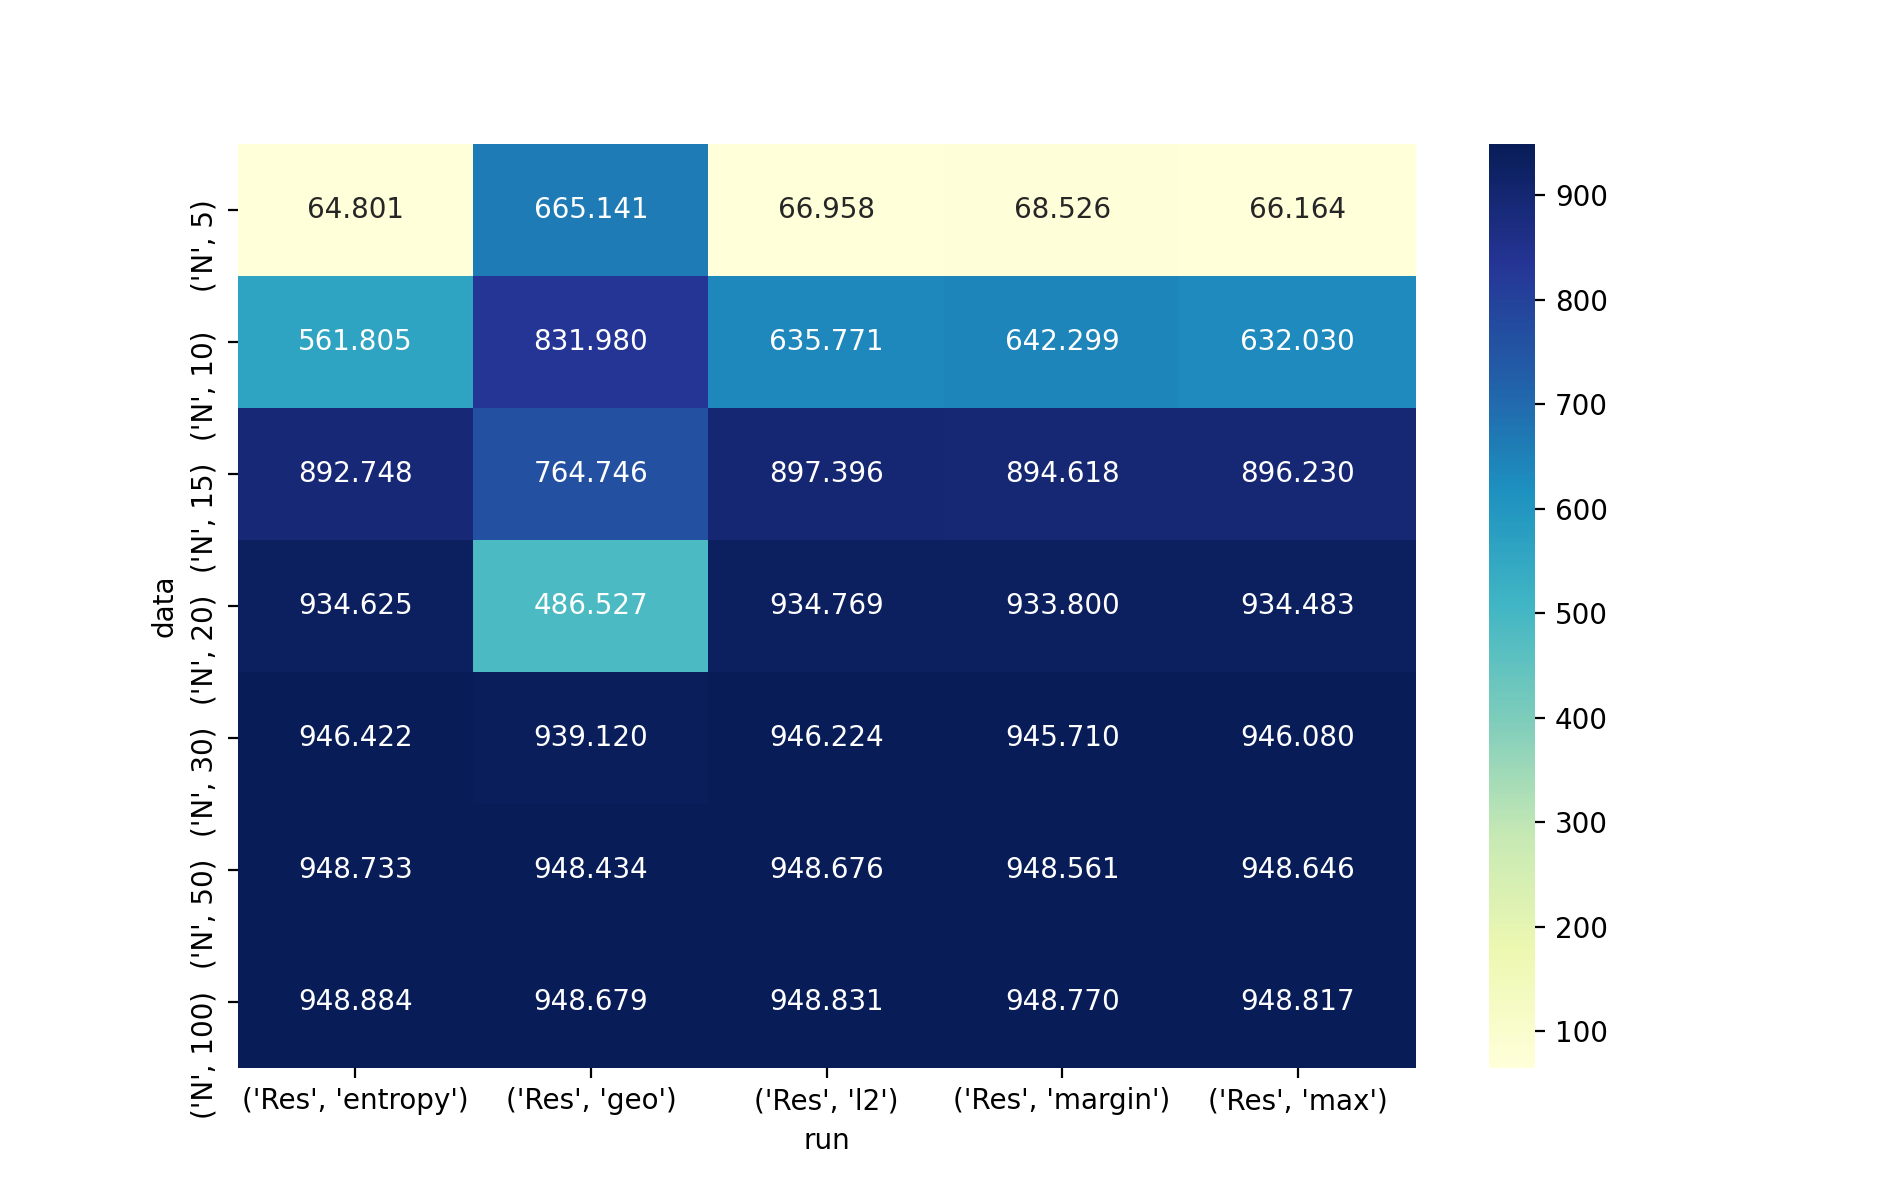

In [359]:
sub_plot_vuc_all_in_one(dfVuc[(dfVuc["cdata"]=="Res") & (dfVuc["tdata"]=="N")])

In [398]:
dfLogVuc=volume_under_curves(dfsAll, log=True)


/Users/krk/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


<IPython.core.display.Javascript object>


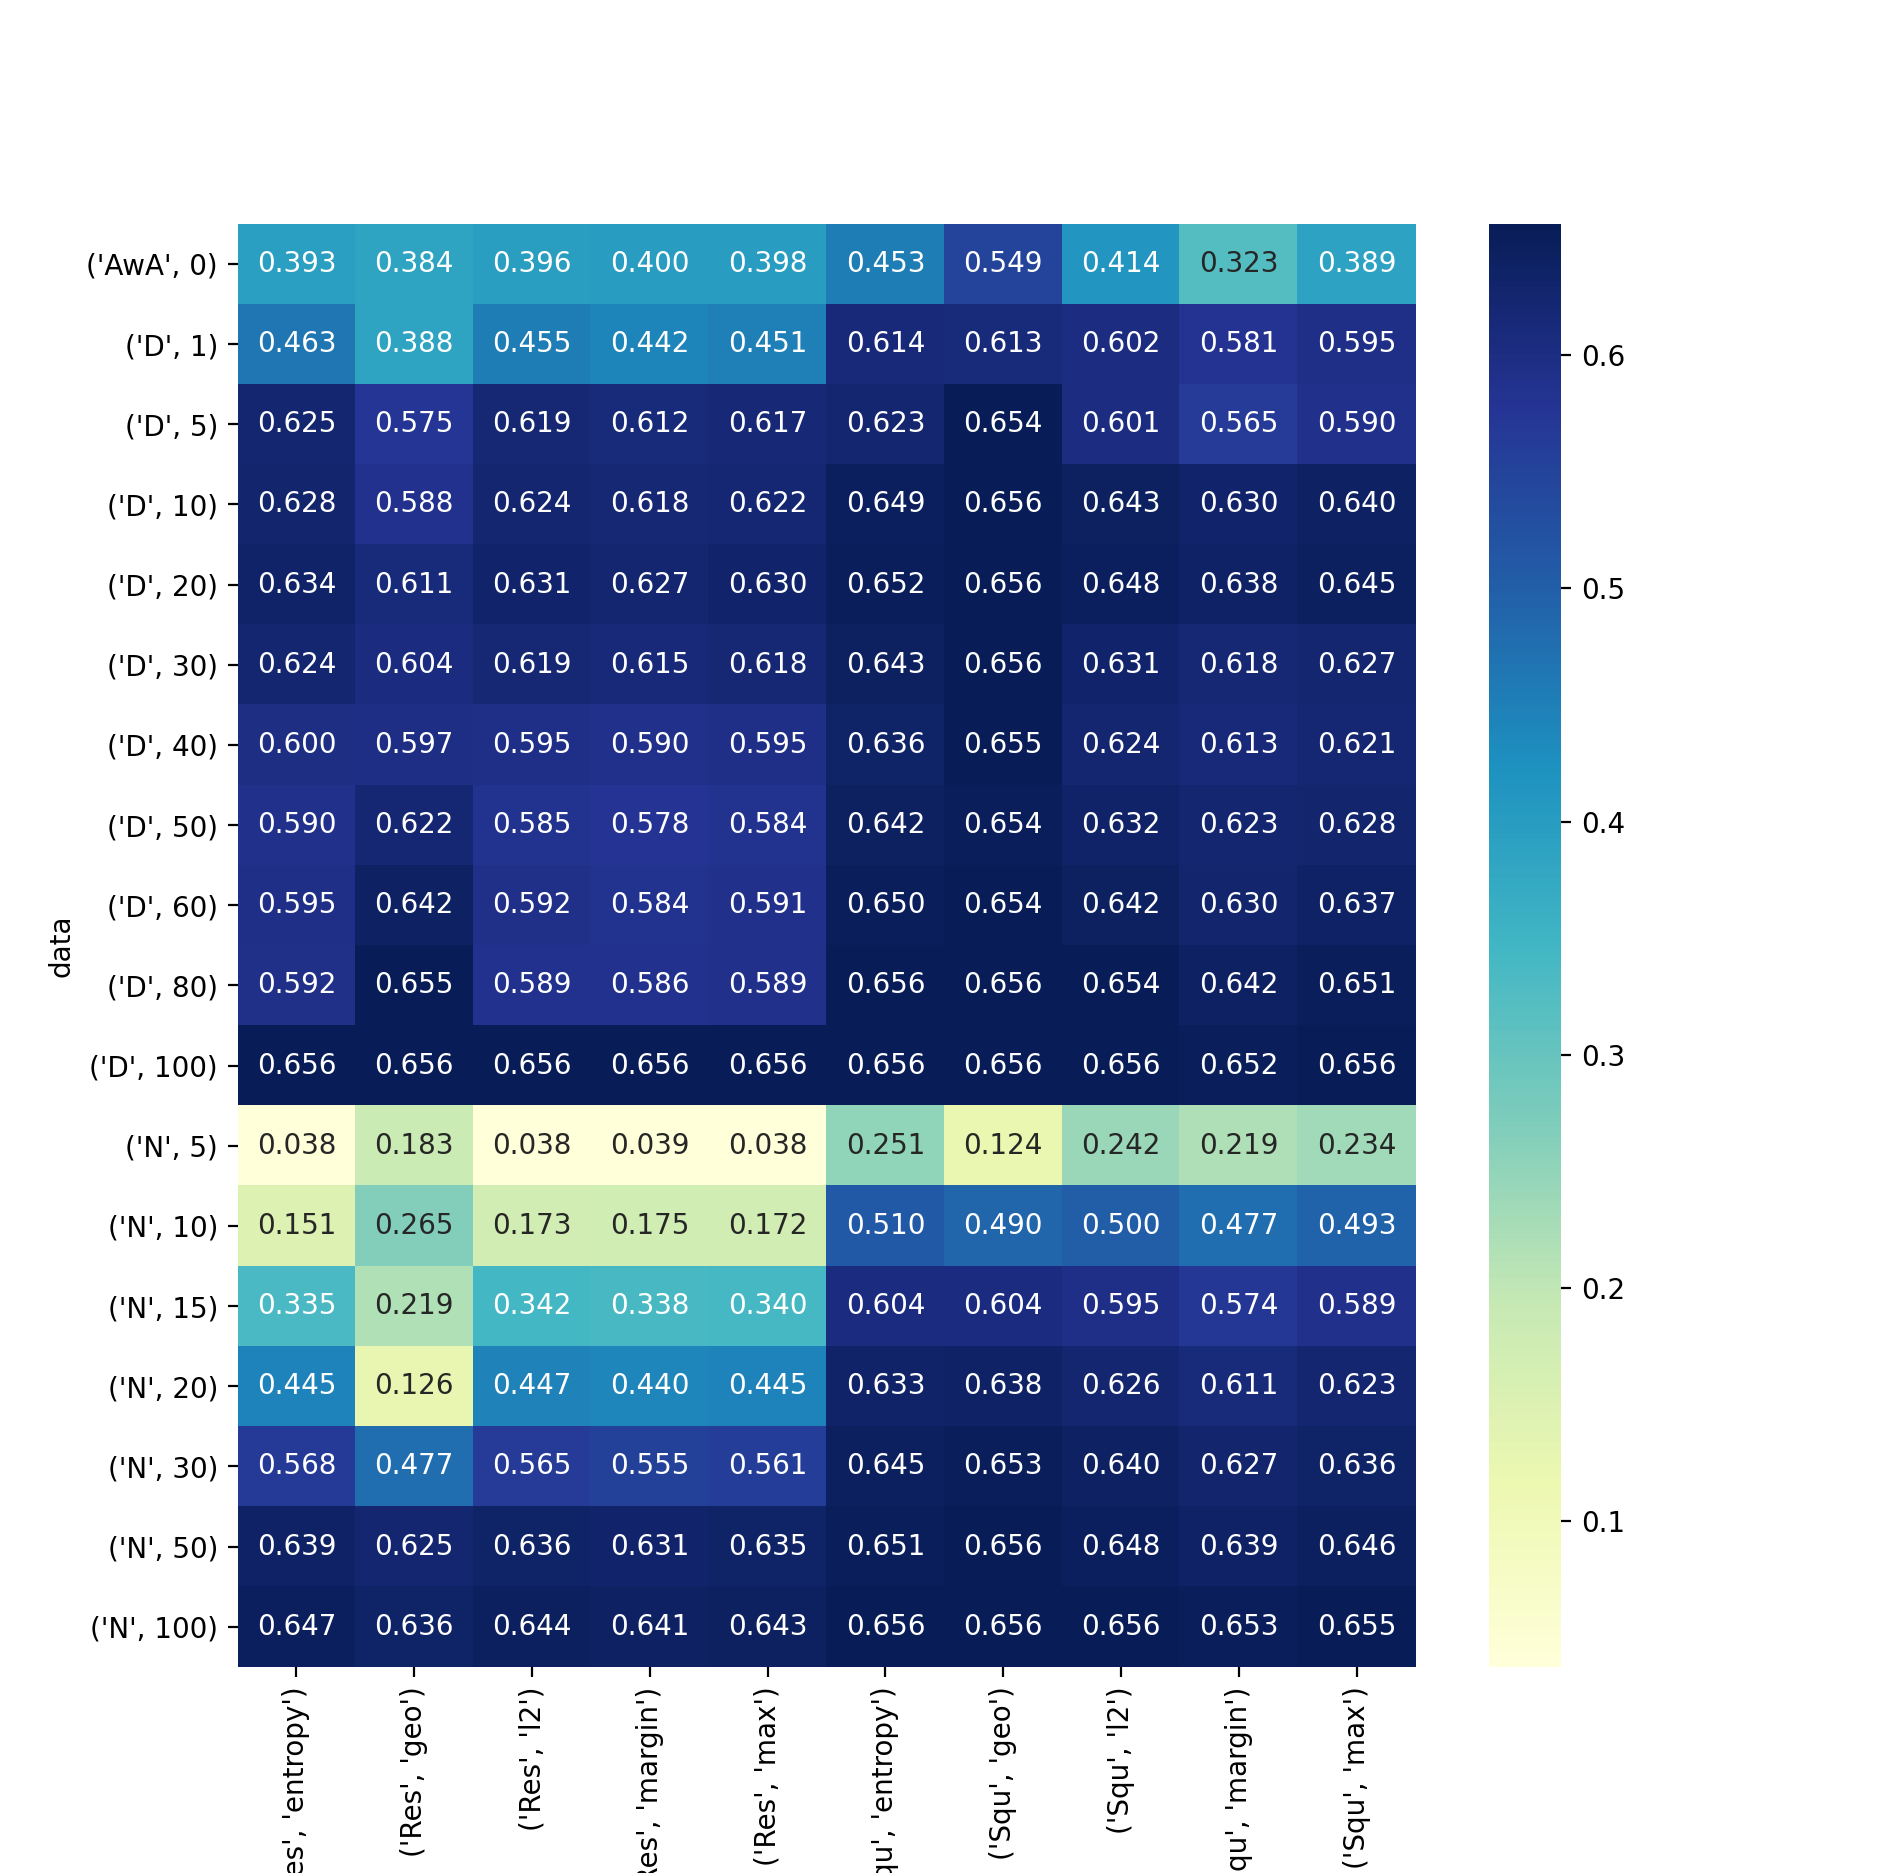

In [401]:
sub_plot_vuc_all_in_one(dfLogVuc)

In [123]:
def plot_lvuc_line(df):
    df = df[df["tdata"]!="AwA"]
    df = df.sort_values(["cdata","tdata","process"])
    sns.relplot(kind="line", data=df, hue="process", x="scale", y="result", col="tdata", row="cdata" )
    
    
def plot_rel_line(df):
    df = rel_to_mean(df)
    df = df[df["tdata"]!="AwA"]
    df = df.sort_values(["cdata","tdata","process"])
    sns.relplot(kind="line", data=df, hue="process", x="scale", y="result", col="tdata", row="cdata" )
    
def plot_distr_line(df):
    df = df[df["tdata"]!="AwA"]
    df = df.sort_values(["cdata","tdata","process"])
    g = sns.displot(kind="kde", data=df, hue="process", x="result", col="tdata", row="cdata" )
    
def plot_distr_box(df):
    df = df[df["tdata"]!="AwA"]
    df = df.sort_values(["cdata","tdata","process"])
    ax = sns.catplot(kind="box", x="process", y="result", data=df, col="tdata", row="cdata",fliersize=2)
    ax.set(ylim=(0,2))
    #sns.catplot(x="process", y="result", color="black", size=3, data=df, col="tdata", row="cdata")
    
def plot_single_distr_box(df, cdata, tdata):
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata)]
    df = df.sort_values(["cdata","tdata","process"])
    ax = sns.catplot(kind="box", x="process", y="result", data=df, fliersize=2)
    ax.set(ylim=(0,2))

    
def plot_all_distr_line(df):
    df = df.sort_values(["cdata","tdata","process"])
    g = sns.displot(kind="kde", data=df, hue="process", x="result")
    
def plot_all_distr_box(df):
    df = df.sort_values(["cdata","tdata","process"])
    ax = sns.catplot(kind="box", x="process", y="result", data=df, fliersize=2)
    ax.set(ylim=(0,2))
    #sns.catplot(x="process", y="result", color="black", size=3, data=df, col="tdata", row="cdata")
    
    
def plot_rel_distr_line(df):
    df = rel_to_mean(df)
    plot_distr_line(df)
    
def plot_rel_distr_box(df):
    df = rel_to_mean(df)
    plot_distr_box(df)
    #sns.catplot(x="process", y="result", color="black", size=3, data=df, col="tdata", row="cdata")
    
    
def plot_bar_all(df):
    df = df.groupby("process").mean()
    df = df.reset_index()
    df = df.sort_values(["process"])
    sns.catplot(kind="bar", data=df, x="process", y="result")
    
def plot_bar_cdata(df):
    df = df.groupby(["process", "cdata"]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","process"])
    sns.catplot(kind="bar", data=df, x="cdata", y="result", hue="process")
    
def plot_bar_cdata_tdata(df):
    df = df.groupby(["process", "cdata", "tdata"]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","tdata","process"])
    sns.catplot(kind="bar", data=df, x="cdata", y="result", hue="process", col="tdata")
    
def plot_bar_scale(df):
    df = df[df["tdata"]!="AwA"]
    df = df.groupby(["process", "cdata", "tdata","scale"]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","tdata","process","scale"])
    sns.catplot(kind="bar", data=df, x="process", y="result", hue="scale", col="cdata", row="tdata")
    
    
def plot_line_scale(df, para=None):
    if para is None:
        para = "scale"
    df = df[df["tdata"]!="AwA"]
    df = df.groupby(["process", "cdata", "tdata",para]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","tdata","process",para])
    g = sns.relplot(kind="line", data=df, x=para, y="result", hue="process", col="cdata", row="tdata")
    if para=="bs":
        g.set(xscale="log")

def plot_line_other(df, para):
    df = df[df["tdata"]!="AwA"]
    #df = df.groupby(["process", "cdata", "tdata",para]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","tdata","process",para])
    g = sns.relplot(kind="line", data=df, x=para, y="result", hue="process", col="cdata", row="tdata")
    if para=="bs":
        g.set(xscale="log")   
    
def rel_to_ks(df, relate_foo=None, rel_alpha=False):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    ind = ['cdata', 'tdata', 'scale','bs', 'alpha']
    df_mean =df[df["process"]=="max"]
    df_mean= df_mean.rename(columns={"result":"mean"})
    df_mean = df_mean.drop(columns=["process"])
    df_mean=df_mean.set_index(ind)
    df = df.set_index(ind)
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    if rel_alpha:
        df["result"] = df["result"]/df["alpha"]
    return df

def draw_roc_scale(df, cdata, tdata, bs):
    df = df[(df["tdata"]==tdata) & (df["cdata"]==cdata) & (df["bs"]==bs)].copy()
    df = df.sort_values(["cdata","tdata","process","scale"])
    g = sns.relplot(kind="line", data=df, x="alpha", y="result", col="scale",col_wrap=2, hue="process")
    g.set(ylim = 0)
    
def compute_winners(df, skip=True):
    dfnew = df.groupby(["cdata", "tdata", "scale", "bs", "alpha"]).max(numeric_only=True).rename(columns={"result":"max"})
    df = df.set_index(["cdata", "tdata", "scale", "bs", "alpha"]).join(dfnew)
    df = df.reset_index()
    df["max"] = df["result"]-df["max"]
    if skip:
        df.loc[df["result"]>=1, "max"] = -1
    df["result"] = 0
    df.loc[df["max"]==0, "result"] = 1
    df = df.drop(columns=["max"])
    return df
    
def compute_rank(df, skip=True):
    df = df.copy()
    rdf = df.groupby(["cdata", "tdata", "scale", "bs", "alpha"])['result'].rank(ascending=True)
    df["result"] = rdf
    return df
    
    
    
def misc_heat(df, process = None, vmin=1, vmax=5):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["tdata"]!="AwA"]
    df["run"] = list(zip(df["alpha"], df["bs"]))
    df["data"] = list(zip( df["tdata"], df["scale"]))
  
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, cmap="YlGnBu", fmt=".3f", **kwargs, vmin=vmin, vmax=vmax )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="process", col="cdata")
    g.map_dataframe(draw_p)
    
def misc_pn_heat(df, process = None):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["tdata"]!="AwA"]
    df["run"] = list(zip(df["alpha"], df["bs"]))
    df["data"] = list(zip( df["tdata"], df["scale"]))
  
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=0, vmin=-0.5, vmax=0.5, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="process", col="cdata")
    g.map_dataframe(draw_p)

    
def awa_heat(df, rel=False):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["tdata"]=="AwA"]
    def draw_p(data, **kwargs):
        data = data.pivot(index='bs', columns='alpha', values='result')
        if rel:
            sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
        else:
            sns.heatmap(data, annot=False, fmt=".3f",  cmap="YlGnBu", **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="cdata", col="process")
    g.map_dataframe(draw_p)
    
    
def dn_first_heat(df):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["tdata"]=="AwA"]
    def draw_p(data, **kwargs):
        data = data.pivot(index='bs', columns='alpha', values='result')
        if rel:
            sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
        else:
            sns.heatmap(data, annot=False, fmt=".3f",  cmap="YlGnBu", **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="cdata", col="process")
    g.map_dataframe(draw_p)
    
    

In [1100]:
def rel_to_ks(df, relate_foo=None, rel_alpha=False, para=None, para_col=False):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    if para is None:
        para = "max"
    ind = ['cdata', 'tdata', 'scale','bs', 'alpha']
    df_mean =df[df["process"]==para]
    df_mean= df_mean.rename(columns={"result":"mean"})
    df_mean = df_mean.drop(columns=["process"])
    df_mean=df_mean.set_index(ind)
    df = df.set_index(ind)
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    if rel_alpha:
        df["result"] = df["result"]/df["alpha"]
    if para_col:
        df["rel_to"] = para
    return df

def rel_to_ks_auc(df, relate_foo=None, rel_alpha=False, para="max", para_col=False):
    if relate_foo is None:
        relate_foo = lambda x,y: x/y
    ind = ['cdata', 'tdata', 'scale','bs']
    df = df.copy()
    df_mean =df[df["process"]==para]
    df_mean= df_mean.rename(columns={"result":"mean"})
    df_mean = df_mean.drop(columns=["process"])
    df_mean = df_mean.set_index(ind)
    df = df.set_index(ind)
    df = df.join(df_mean)
    df["result"] = relate_foo(df["result"],df["mean"])
    df = df.drop(columns=["mean"])
    df = df.reset_index()
    if rel_alpha:
        df["result"] = df["result"]/df["alpha"]
    if para_col:
        df["rel_to"] = para
    return df
    

def awa_heat(df, rel=False):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df.sort_values(["cdata", "process"])
    if rel:
        df = df[(df["tdata"]=="AwA") & (df["process"]!="max")]
    else:
        df = df[(df["tdata"]=="AwA")]
    def draw_p(data, **kwargs):
        data = data.pivot(index='bs', columns='alpha', values='result')
        if rel:
            sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
        else:
            sns.heatmap(data, annot=False, fmt=".3f",  cmap="YlGnBu", **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="cdata", col="process")
    g.map_dataframe(draw_p)
    
    
def dn_first_heat(df, tdata, alpha=None):
    #df = compute_winners(df, skip).copy()
    def draw_p(data, **kwargs):
        #print(data)
        data = data.pivot(index='scale', columns='process', values='bs')
        sns.heatmap(data, annot=True, fmt=".0f",  cmap="YlGnBu_r", vmin=10, vmax=10000, norm=LogNorm(),**kwargs )
    df = df.copy()
    df = df[df["tdata"]==tdata]
    if alpha is not None:
        df = df[df["alpha"]==alpha]
    #df["tdata"] = list(zip(df["tdata"], df["alpha"]))
    #df = df[df["result"]>=1]
    newdf = []
    for i in df.groupby(['cdata', 'tdata', 'scale', 'process', 'alpha']):
        d = i[1][i[1]["result"]>=1]
        if len(d)==0:
            r = list(i[0]) + [np.nan]
        else:
            r = list(i[0]) + [sorted(d["bs"].values)[0]]
        newdf.append(r)
    df = pd.DataFrame(newdf, columns=['cdata', 'tdata', 'scale', 'process', 'alpha', "bs"])
    #df = df.groupby(["cdata", "scale", "alpha","process"]).head(1)
    g = sns.FacetGrid(df,  col="cdata", row="alpha")
    g.map_dataframe(draw_p)
    
    return df

def plot_line_other(df, para, mean=False, lim=(0.4, 2.5)):
    if para == "scale":
        df = df[(df["tdata"]!="AwA")]
    if mean:
        df = df.groupby(["process", "cdata", "tdata",para]).mean()
    df = df.reset_index()
    df = df.sort_values(["cdata","tdata","process",para])
    g = sns.relplot(kind="line", data=df, x=para, y="result", hue="process", col="cdata", row="tdata")
    g.set(ylim=(0.4, 2.5))
    if para=="bs":
        g.set(xscale="log")
        
def misc_pn_heat(df, process = None):
    df = df[(df["process"]!="max")]
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[(df["process"]!="max")]
    #df = df[df["tdata"]=="D"]
    try:
        df["run"] = list(zip(df["alpha"], df["bs"]))
    except:
        df["run"] = list( df["bs"])
    df["data"] = list(zip( df["tdata"], df["scale"]))
  
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  col="process", row="cdata")
    g.map_dataframe(draw_p)
    
def matrix_pn_heat(df, cdata, process = None):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["cdata"]==cdata]
    try:
        df["run"] = list(zip(df["alpha"], df["bs"]))
    except:
        df["run"] = list( df["bs"])
    df["data"] = list(zip( df["tdata"], df["scale"]))
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  col="process", row="rel_to")
    g.map_dataframe(draw_p)
    
    
def nn_pn_heat(df, process = None):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df.groupby(["cdata", "tdata", "scale", "process", "rel_to"]).mean().reset_index()
    df["data"] = list(zip( df["tdata"], df["scale"]))
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='cdata', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  col="process", row="rel_to")
    g.map_dataframe(draw_p)
    
def plot_box_tdata(df):
    
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["tdata"]!="AwA") & (df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.catplot(kind="box", data=df, y="result", x="process",col="tdata", row="cdata"  )
    
    
def plot_box_awa(df):
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["tdata"]=="AwA") & (df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.catplot(kind="box", data=df, y="result", x="process",col="alpha", row="cdata"  )
    
    
def plot_box_all(df):
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.catplot(kind="box", data=df, y="result", x="process")
    
def plot_box_cdata(df):
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.catplot(kind="box", data=df, y="result", x="process", row="cdata")
    
    
def plot_box_process(df):
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.catplot(kind="box", data=df, y="result", x="process", hue="cdata")
    
    
def plot_line_distor(df):
    df = df.sort_values(["cdata","tdata", "process"])
    df = df[(df["tdata"]!="AwA")]
    g = sns.displot(kind="kde", data=df, x="result", hue="process",row="cdata", col="tdata" , cut=0 )
    #g.set(ylim=(0,0.3))

def plot_line_tdata(df):
    df = df.sort_values(["cdata","tdata", "process"])
    df = df[(df["tdata"]!="AwA")]
    g = sns.displot(kind="kde", data=df, x="result", hue="process",row="cdata", col="tdata" , cut=0 )
    g.set(ylim=(0,0.3))
    
def plot_line_awa(df, alpha=False):
    df = df.sort_values(["cdata","tdata", "process"])
    df = df[(df["tdata"]=="AwA") ]
    if alpha:
        g = sns.displot(kind="kde", data=df, x="result", hue="process",row="cdata", col="alpha" , cut=0 )
    else:
        g = sns.displot(kind="kde", data=df, x="result", hue="process",row="cdata",  cut=0 )
    
    
def plot_line_all(df):
    df = df.sort_values(["cdata","tdata", "process"])
   # df = df[(df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.displot(kind="kde", data=df, x="result", hue="process", cut=0)
    
    
def plot_line_cdata(df):
    df = df.sort_values(["cdata","tdata", "process"])
    #df = df[(df["bs"]<=50000)  & (df["alpha"]<=0.1)]
    g = sns.displot(kind="kde", data=df, x="result", hue="process", row="cdata" , cut=0 )
    

def compute_aucs(df):
    c = ["cdata", "tdata", "scale", "process", "bs"]
    df = df.copy()
    new_df = []
    for i,d in enumerate(df.groupby(["cdata", "tdata", "scale", "process", "bs"])):
        auc = metrics.auc(x=d[1]["val"], y=d[1]["result"])
        new_df.append(list(d[0])+[auc])
    new_df = pd.DataFrame(new_df, columns=c+["auc"]).set_index(c)
    df = df.set_index(c).join(new_df).reset_index().drop(columns=["val", "result"]).rename(columns={"auc":"result"})
    return df

def compute_aucs2(df):
    c = ["cdata", "tdata", "scale", "process", "bs"]
    df = df.copy()
    new_df = []
    for i,d in enumerate(df.groupby(["cdata", "tdata", "scale", "process", "bs"])):
        auc = metrics.auc(x=d[1]["val"], y=d[1]["result"])
        new_df.append(list(d[0])+[auc])
    df = pd.DataFrame(new_df, columns=c+["result"])
 #   df = df.set_index(c).join(new_df).reset_index().drop(columns=["val", "result"]).rename(columns={"auc":"result"})
    return df
    
def vmisc_pn_heat(df, process = None):
    #df = df[(df["process"]!="max")]
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[(df["process"]!="max")]
    #df = df[df["tdata"]=="D"]
    try:
        df["run"] = list(zip(df["alpha"], df["bs"]))
    except:
        df["run"] = list( df["bs"])
    df["data"] = list(zip( df["tdata"], df["scale"]))
  
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,   col="process", row="cdata")
    g.map_dataframe(draw_p)
    
def matrix_pn_heat(df, cdata, process = None):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
    df = df[df["cdata"]==cdata]
    df = df.sort_values(["process", "rel_to"])
    try:
        df["run"] = list(zip(df["alpha"], df["bs"]))
    except:
        df["run"] = list( df["bs"])
    df["data"] = list(zip( df["tdata"], df["scale"]))
    if process is not None:
        df = df[df["process"]==process]
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='run', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.5, vmax=1.5,**kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="process", col="rel_to")
    g.map_dataframe(draw_p)
    
    
def nn_pn_heat(df, process = None):
    #df = compute_winners(df, skip).copy()
    df = df.copy()
        
    df = df.groupby(["cdata", "tdata", "scale", "process", "rel_to"]).mean().reset_index()
    df = df.sort_values(["process", "rel_to"])
    df["data"] = list(zip( df["tdata"], df["scale"]))
    def draw_p(data, **kwargs):
        data = data.pivot(index='data', columns='cdata', values='result')
        sns.heatmap(data, fmt=".3f",  cmap="vlag" ,center=1, vmin=0.8, vmax=1.2, **kwargs )
    #df = volume_under_curves(df)
    g = sns.FacetGrid(df,  row="process", col="rel_to")
    g.map_dataframe(draw_p)

def vdraw_roc(df, tdata, bs, scale=None, remove=True):
    # & (df["scale"]==scale) & (df["bs"]==bs)
    df = df.rename(columns={"val": "FPR", "result":"TPR"})
    df = df[(df["tdata"]==tdata) & (df["bs"]==bs)]
    if remove:
        df = df[~(df["process"]).isin(["l2", "margin", "proj","proj_e"])]
    if scale is not None:
        df = df[(df["scale"]==scale) ]
    g = sns.relplot(kind="line", data=df, x="FPR", y="TPR", hue="process", row="scale", col="cdata")


def vdraw_roc_awa(df, bs=None, remove=True):
    # & (df["scale"]==scale) & (df["bs"]==bs)
    df = df.rename(columns={"val": "FPR", "result":"TPR"})
    df = df[(df["tdata"]=="AwA")]
    if remove:
        df = df[~(df["process"]).isin(["l2", "margin", "proj","proj_e"])]
    if bs is not None:
        df = df[(df["bs"]==bs) ]
    g = sns.relplot(kind="line", data=df, x="FPR", y="TPR", hue="process", row="bs", col="cdata")


def draw_roc(df, tdata, bs, scale=None):
    # & (df["scale"]==scale) & (df["bs"]==bs)
    df = df.rename(columns={"result":"TPR"})
    df = df[(df["tdata"]==tdata) & (df["bs"]==bs)]
    if scale is not None:
        df = df[(df["scale"]==scale) ]
    g = sns.relplot(kind="line", data=df, x="alpha", y="TPR", hue="process", row="scale", col="cdata")


def draw_roc_awa(df, scale=None):
    # & (df["scale"]==scale) & (df["bs"]==bs)
    df = df.rename(columns={ "result":"TPR"})
    df = df[(df["tdata"]=="AwA")]
    if scale is not None:
        df = df[(df["scale"]==scale) ]
    g = sns.relplot(kind="line", data=df, x="alpha", y="TPR", hue="process", row="bs", col="cdata")

    
def add_ends(df):
    df = df.copy()
    new_df = []
    for i in df.groupby(["cdata","tdata", "scale", "process", "bs"]):
        new_df.append(list(i[0]) + [0,0,0])
        new_df.append(list(i[0]) + [1,1,1])
    new_df = pd.DataFrame(new_df, columns=["cdata","tdata", "scale", "process", "bs", "alpha", "val", "result"])
    df = pd.concat([df, new_df]).sort_values(["cdata","tdata", "scale", "process", "bs", "alpha"])
    return df




<IPython.core.display.Javascript object>


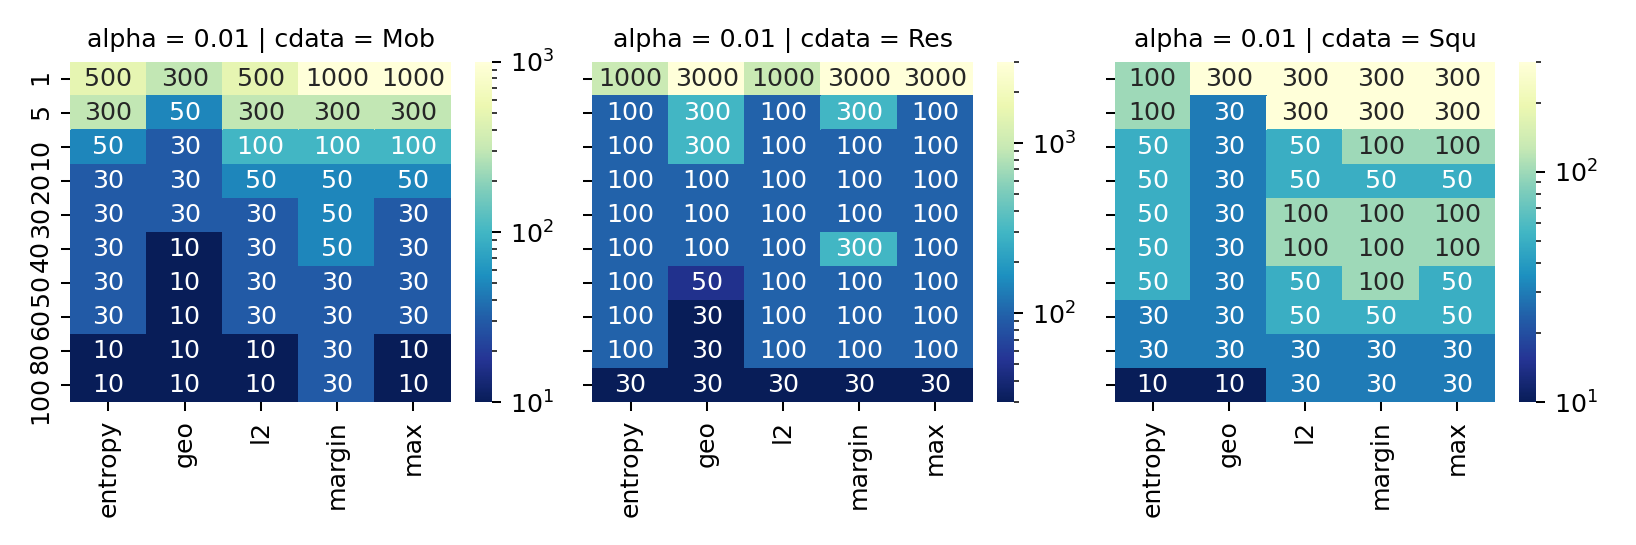

cdata tdata  scale  process  alpha      bs
0     Mob     D      1  entropy   0.01   500.0
1     Mob     D      1      geo   0.01   300.0
2     Mob     D      1       l2   0.01   500.0
3     Mob     D      1   margin   0.01  1000.0
4     Mob     D      1      max   0.01  1000.0
5     Mob     D      5  entropy   0.01   300.0
6     Mob     D      5      geo   0.01    50.0
7     Mob     D      5       l2   0.01   300.0
8     Mob     D      5   margin   0.01   300.0
9     Mob     D      5      max   0.01   300.0
10    Mob     D     10  entropy   0.01    50.0
11    Mob     D     10      geo   0.01    30.0
12    Mob     D     10       l2   0.01   100.0
13    Mob     D     10   margin   0.01   100.0
14    Mob     D     10      max   0.01   100.0
15    Mob     D     20  entropy   0.01    30.0
16    Mob     D     20      geo   0.01    30.0
17    Mob     D     20       l2   0.01    50.0
18    Mob     D     20   margin   0.01    50.0
19    Mob     D     20      max   0.01    50.0
20    Mob     D     30  entropy   0.01    30.0
21    Mob     D     30      geo   0.01    30.0
22    Mob     D     30       l2   0.01    30.0
23    Mob     D     30   margin   0.01    50.0
24    Mob     D     30      max   0.01    30.0
25    Mob     D     40  entropy   0.01    30.0
26    Mob     D     40      geo   0.01    10.0
27    Mob     D     40       l2   0.01    30.0
28    Mob     D     40   margin   0.01    50.0
29    Mob     D     40      max   0.01    30.0
30    Mob     D     50  entropy   0.01    30.0
31    Mob     D     50      geo   0.01    10.0
32    Mob     D     50       l2   0.01    30.0
33    Mob     D     50   margin   0.01    30.0
34    Mob     D     50      max   0.01    30.0
35    Mob     D     60  entropy   0.01    30.0
36    Mob     D     60      geo   0.01    10.0
37    Mob     D     60       l2   0.01    30.0
38    Mob     D     60   margin   0.01    30.0
39    Mob     D     60      max   0.01    30.0
40    Mob     D     80  entropy   0.01    10.0
41    Mob     D     80      geo   0.01    10.0
42    Mob     D     80       l2   0.01    10.0
43    Mob     D     80   margin   0.01    30.0
44    Mob     D     80      max   0.01    10.0
45    Mob     D    100  entropy   0.01    10.0
46    Mob     D    100      geo   0.01    10.0
47    Mob     D    100       l2   0.01    10.0
48    Mob     D    100   margin   0.01    30.0
49    Mob     D    100      max   0.01    10.0
50    Res     D      1  entropy   0.01  1000.0
51    Res     D      1      geo   0.01  3000.0
52    Res     D      1       l2   0.01  1000.0
53    Res     D      1   margin   0.01  3000.0
54    Res     D      1      max   0.01  3000.0
55    Res     D      5  entropy   0.01   100.0
56    Res     D      5      geo   0.01   300.0
57    Res     D      5       l2   0.01   100.0
58    Res     D      5   margin   0.01   300.0
59    Res     D      5      max   0.01   100.0
60    Res     D     10  entropy   0.01   100.0
61    Res     D     10      geo   0.01   300.0
62    Res     D     10       l2   0.01   100.0
63    Res     D     10   margin   0.01   100.0
64    Res     D     10      max   0.01   100.0
65    Res     D     20  entropy   0.01   100.0
66    Res     D     20      geo   0.01   100.0
67    Res     D     20       l2   0.01   100.0
68    Res     D     20   margin   0.01   100.0
69    Res     D     20      max   0.01   100.0
70    Res     D     30  entropy   0.01   100.0
71    Res     D     30      geo   0.01   100.0
72    Res     D     30       l2   0.01   100.0
73    Res     D     30   margin   0.01   100.0
74    Res     D     30      max   0.01   100.0
75    Res     D     40  entropy   0.01   100.0
76    Res     D     40      geo   0.01   100.0
77    Res     D     40       l2   0.01   100.0
78    Res     D     40   margin   0.01   300.0
79    Res     D     40      max   0.01   100.0
80    Res     D     50  entropy   0.01   100.0
81    Res     D     50      geo   0.01    50.0
82    Res     D     50       l2   0.01   100.0
83    Res     D     50   margin   0.01   100.0
84    Res

In [1053]:
dn_first_heat(dfsAll, "D", 0.01)

In [1075]:
df  = vdfsAll.copy()
df = df[df["process"].isin(["all", "all_e", "entropy", "geo", "max"])]
df = compute_aucs2(add_ends(df))
#df = pd.concat([rel_to_ks_auc(compute_aucs2(add_ends(df)), para=i, para_col=True) for i in ["max"]])

df


cdata tdata  scale process       bs   result
0      Mob   AwA      0     all     10.0  0.53212
1      Mob   AwA      0     all     30.0  0.63827
2      Mob   AwA      0     all     50.0  0.73337
3      Mob   AwA      0     all    100.0  0.89703
4      Mob   AwA      0     all    300.0  0.99712
...    ...   ...    ...     ...      ...      ...
2695   Squ     N    100     max    500.0  0.99730
2696   Squ     N    100     max   1000.0  0.99705
2697   Squ     N    100     max   3000.0  0.99675
2698   Squ     N    100     max   5000.0  0.99555
2699   Squ     N    100     max  10000.0  0.99380

[2700 rows x 6 columns]

<IPython.core.display.Javascript object>


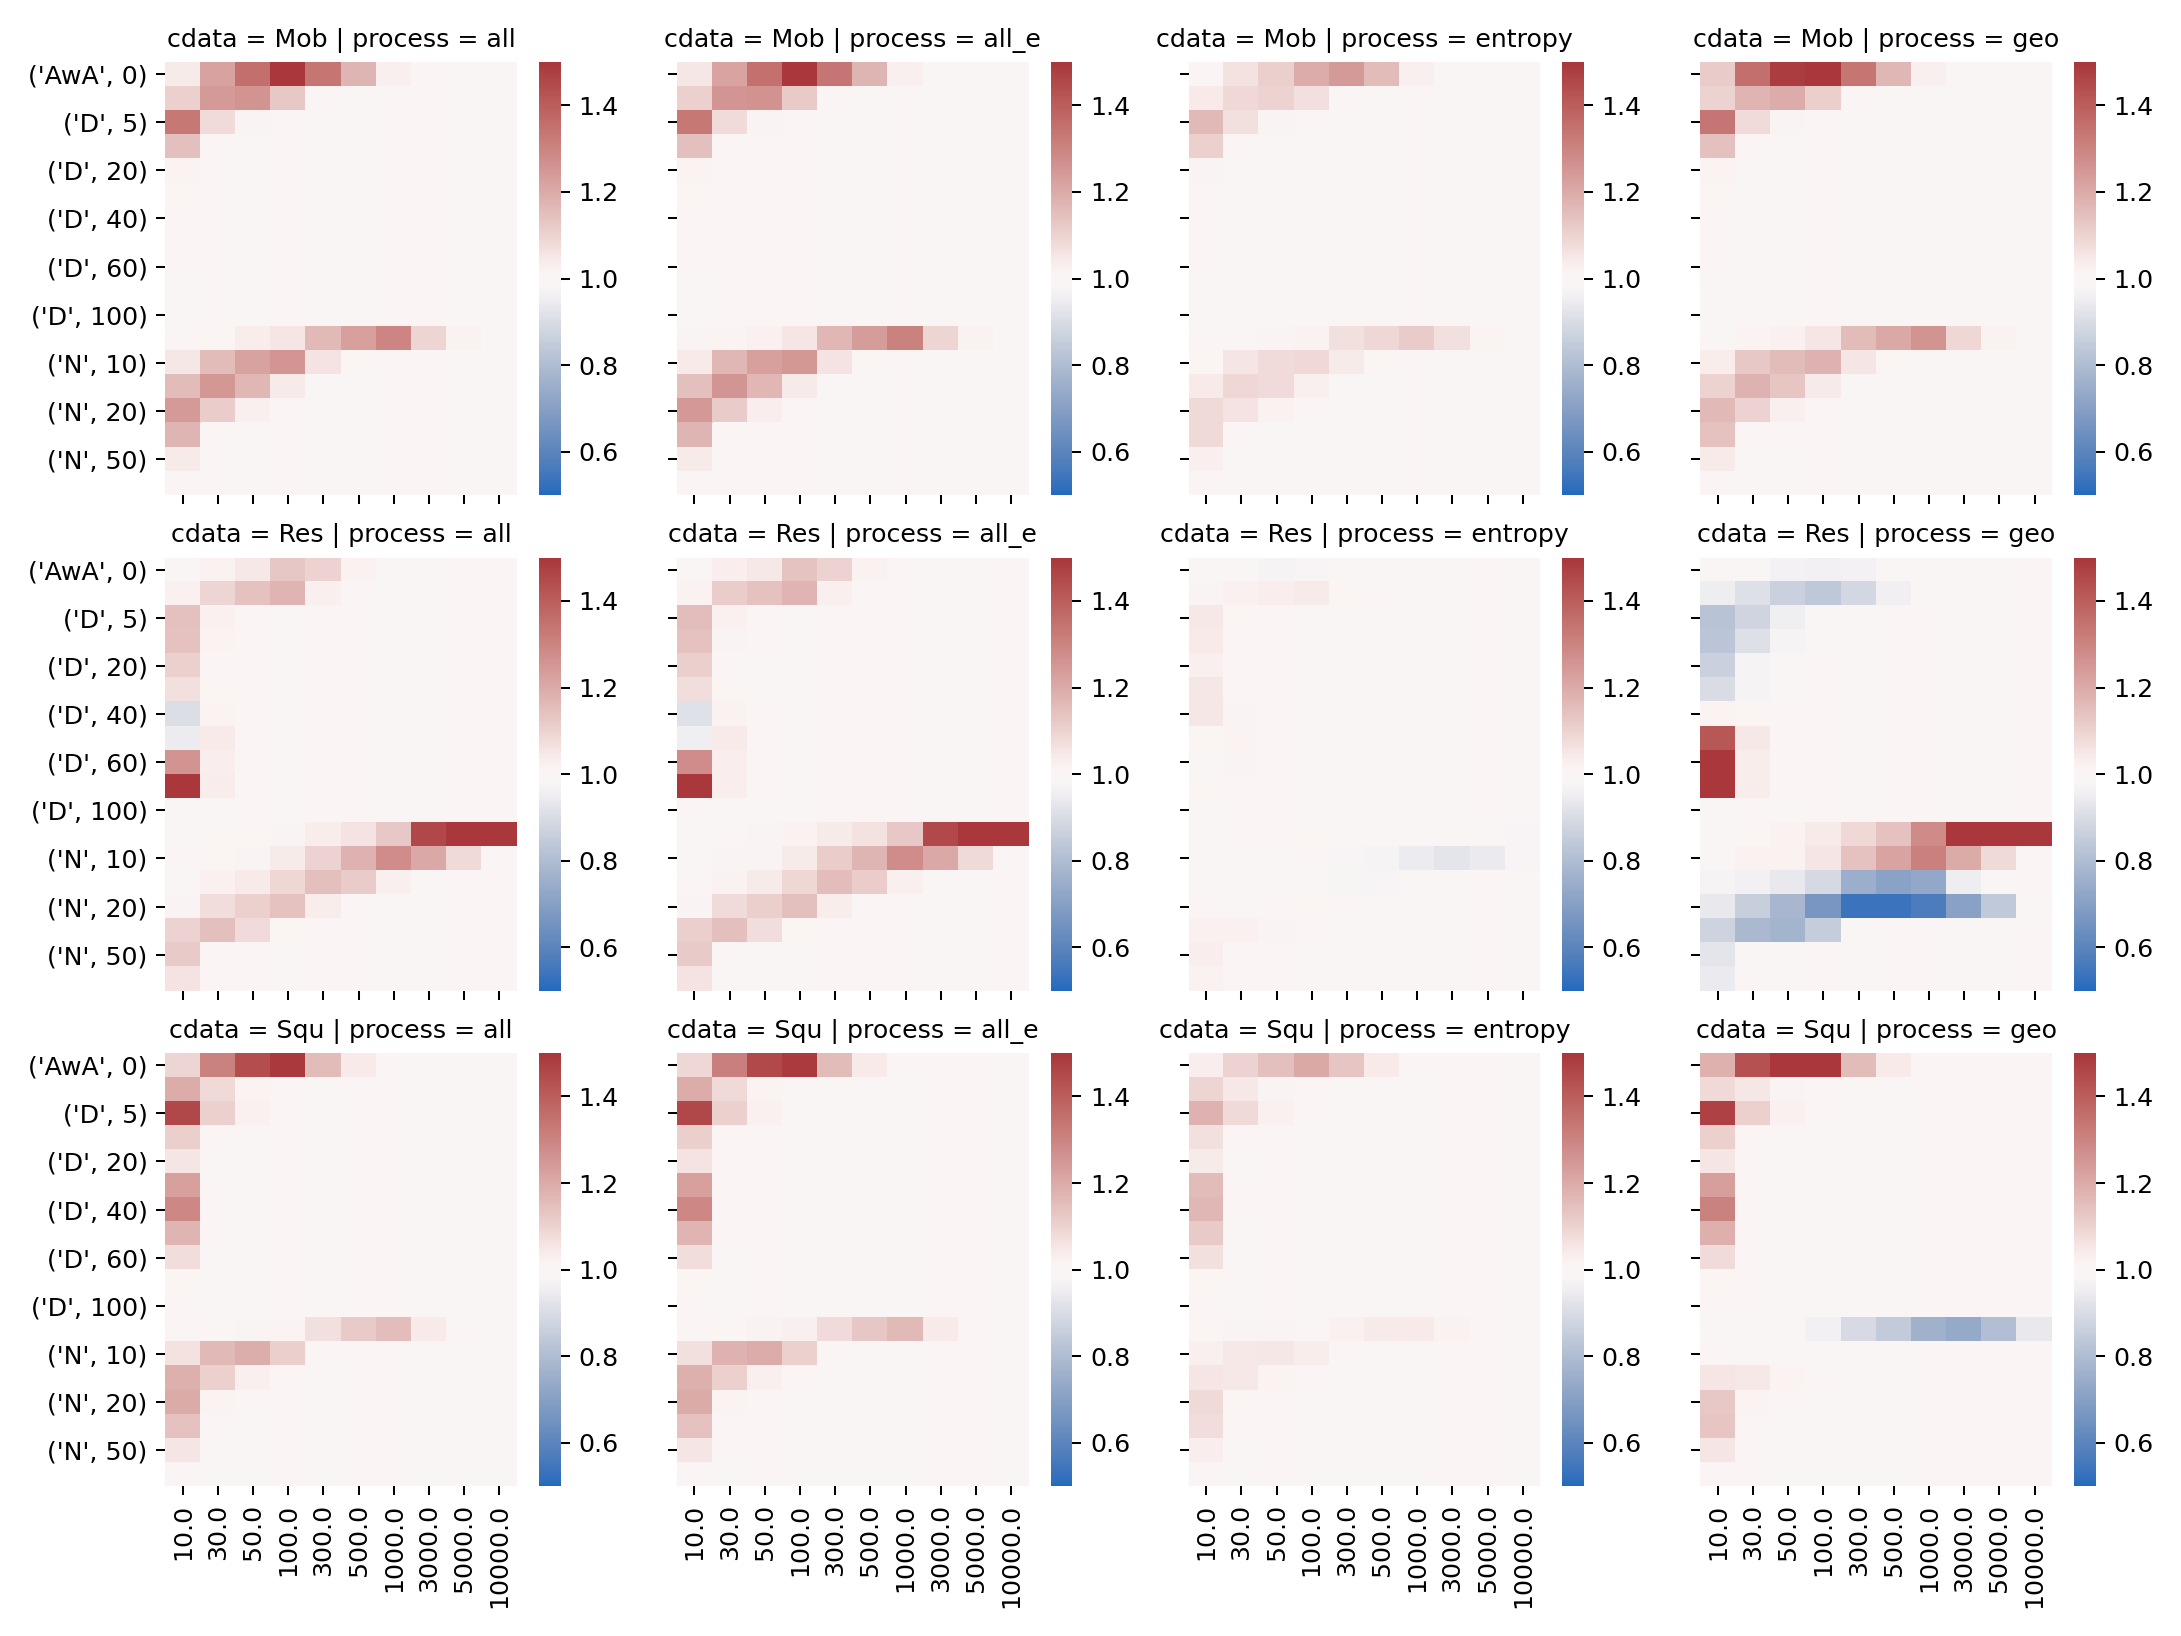

In [1045]:
vmisc_pn_heat(rel_to_ks_auc(df))
#plt.savefig("fig/auc_heat.png")

<IPython.core.display.Javascript object>


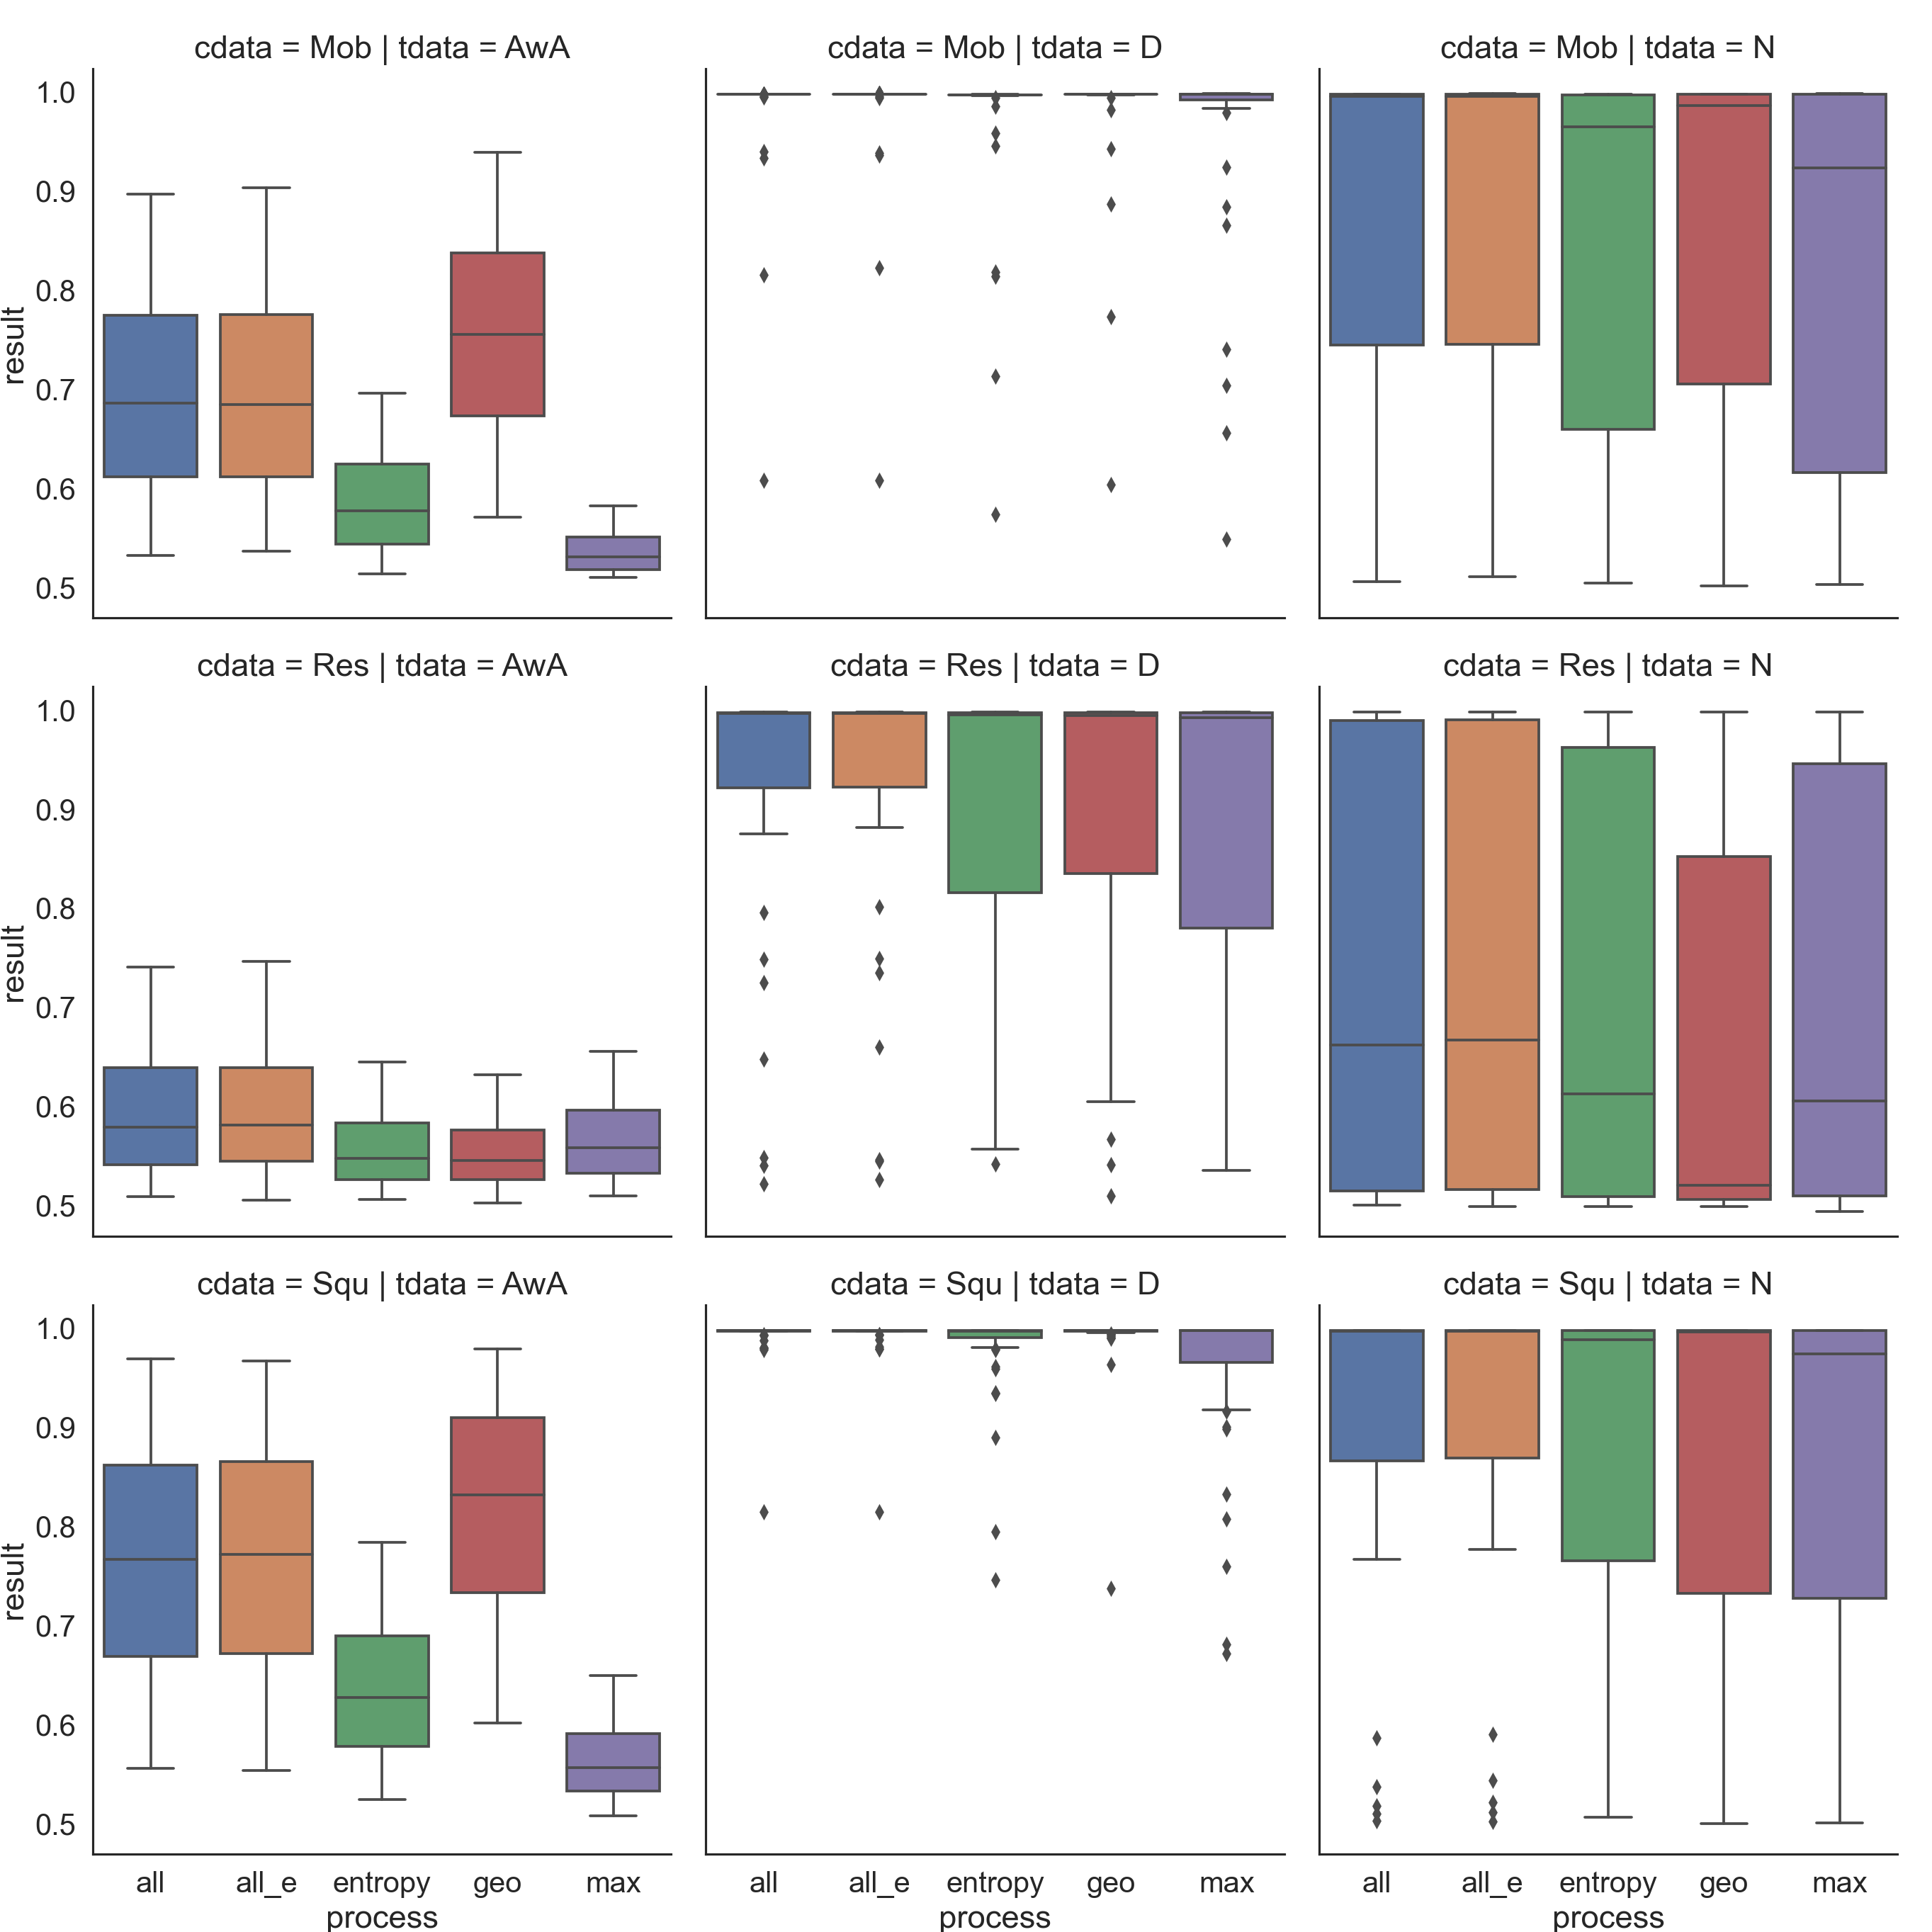

In [1103]:
#df2 = vdfsAll.copy()
#df2 = df2[df2["process"].isin(["all","all_e"])]
#df2["rel"] = df2["val"]/df2["alpha"]
#sns.catplot(kind="box", data=df, x="process", y="result")
#plt.savefig("fig/rel_fpr.png")
#draw_roc(add_ends(dfsAll), "D", 10)
#plt.savefig("fig/roc_30_AwA.png")
#df.groupby("process")["result"].mean()
#sns.set(style="white", font_scale=1.5)
plot_box_tdata(df[df["bs"]<=100])
#plt.savefig("fig/auc_box_c_100.png")

<IPython.core.display.Javascript object>


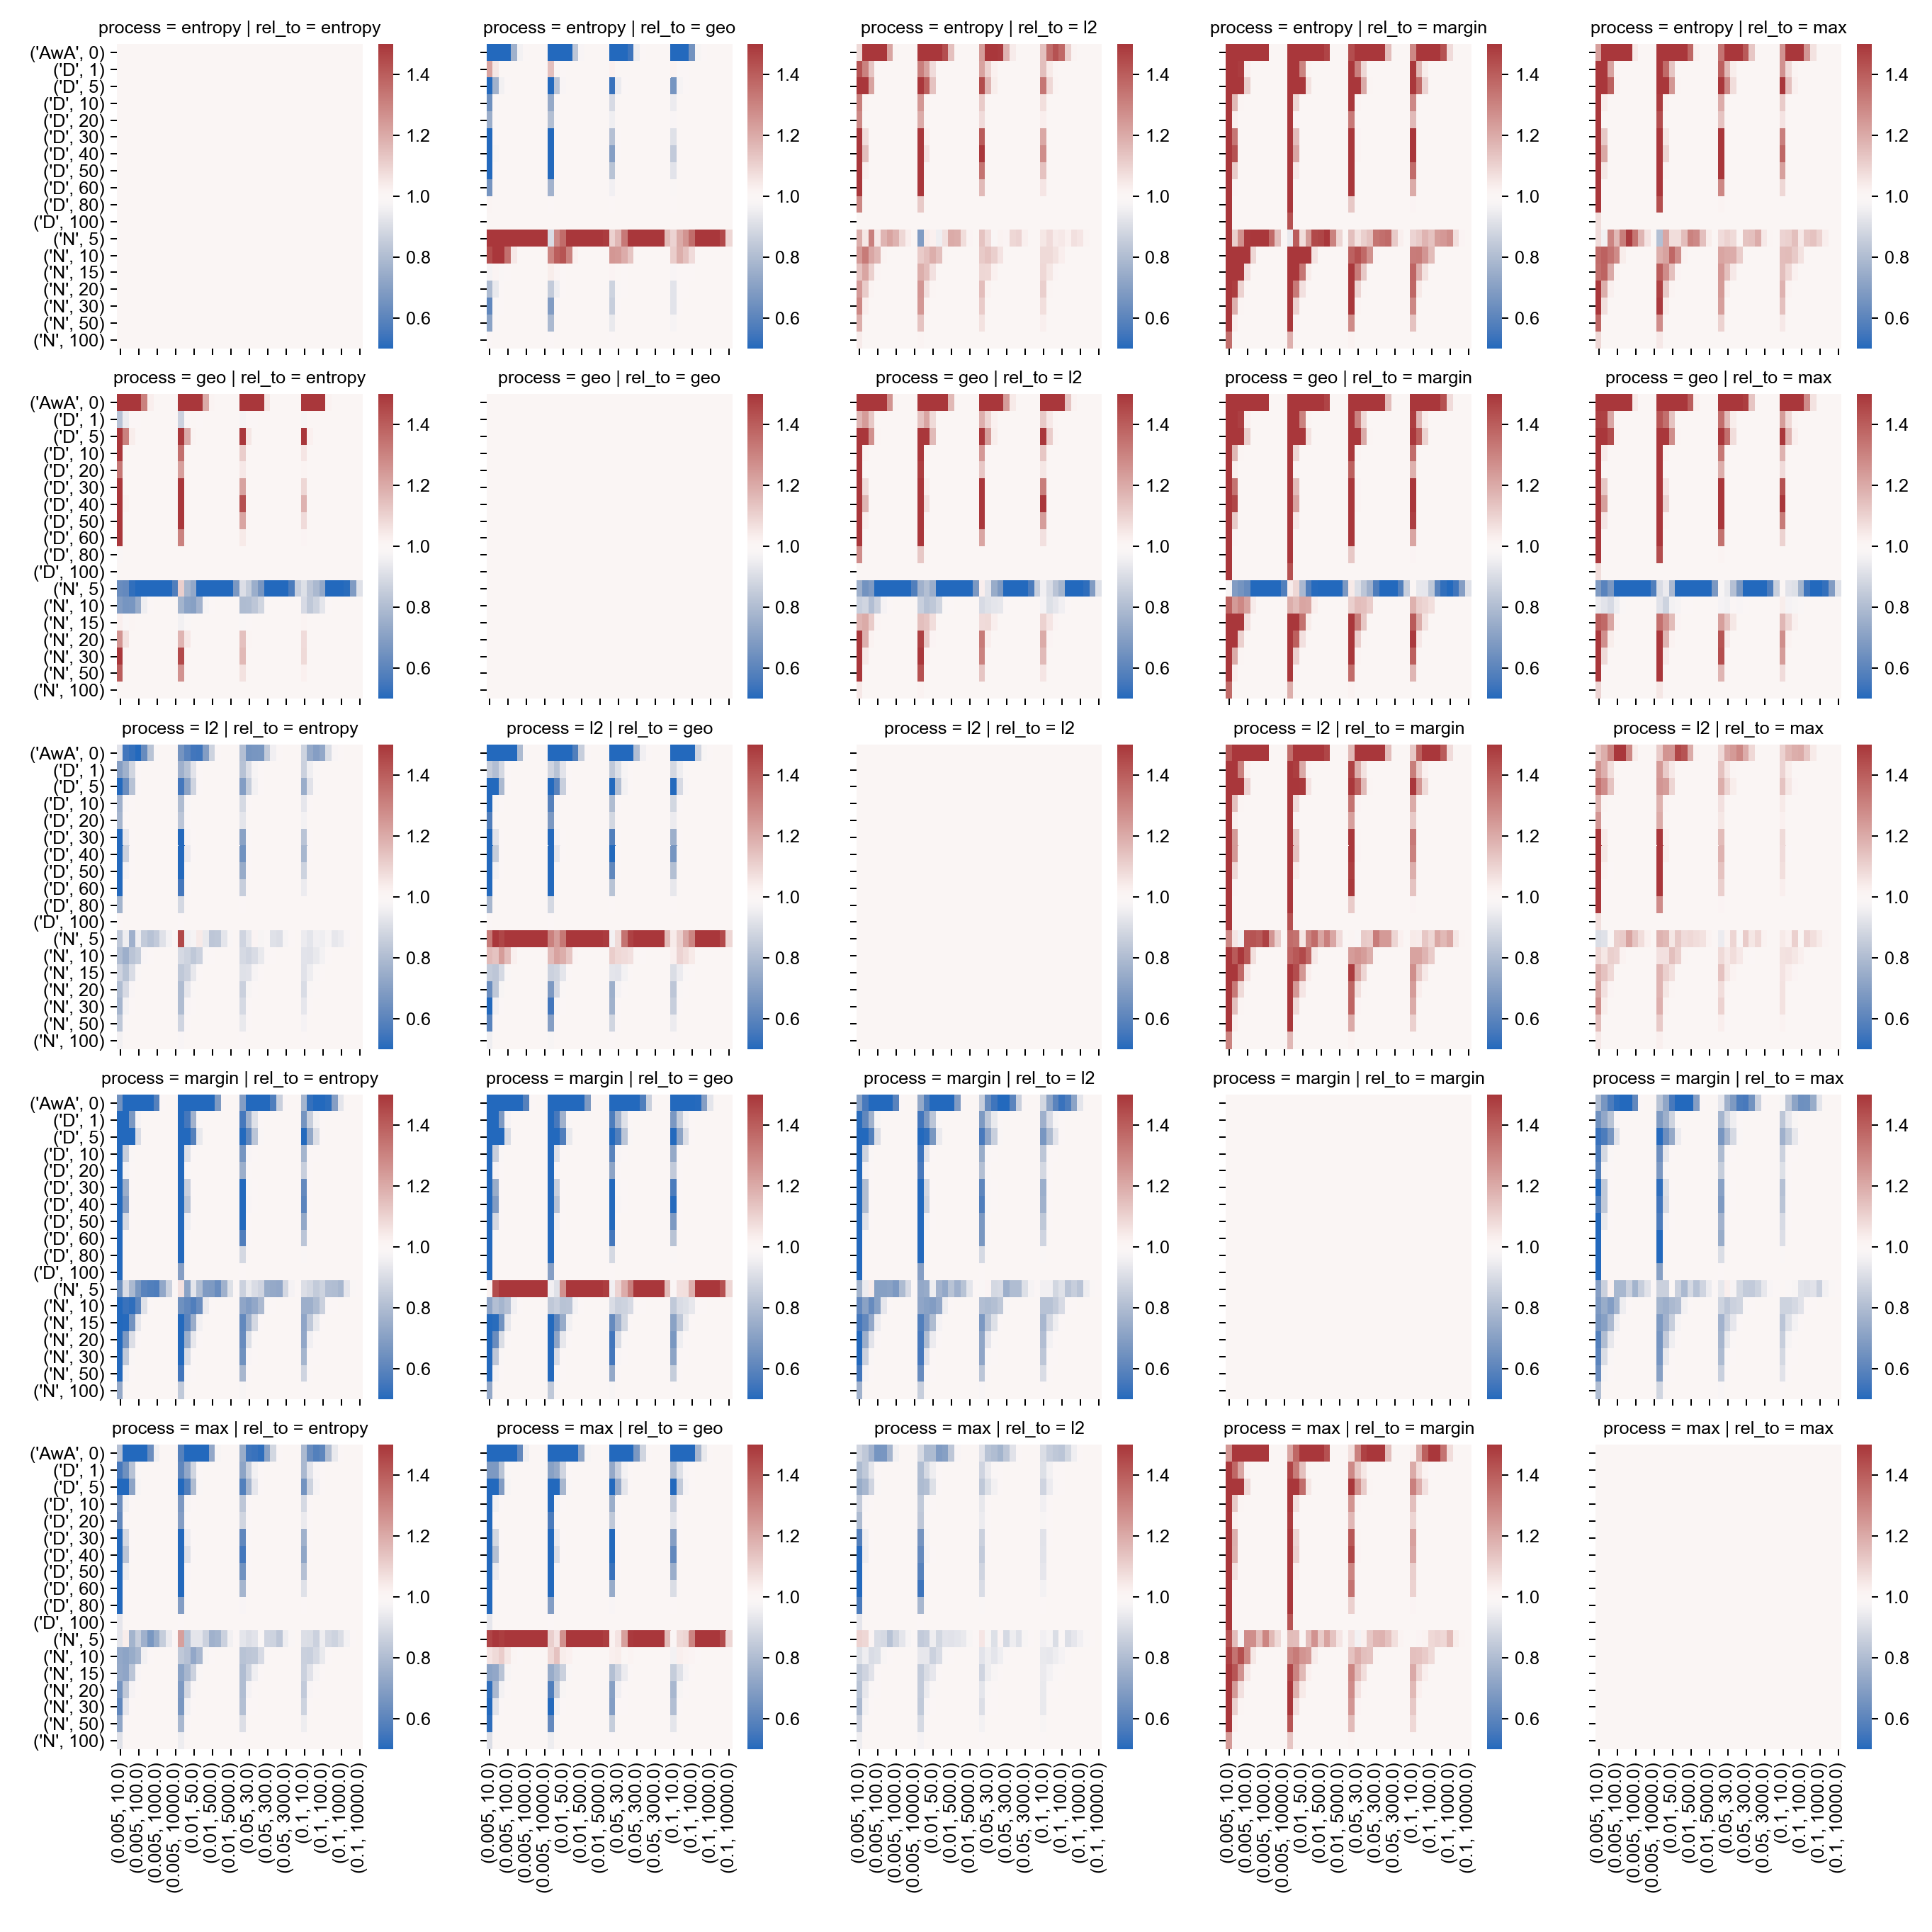

In [1066]:
df = pd.concat([rel_to_ks(dfsAll, para=i, para_col=True) for i in dfsAll["process"].unique()])
matrix_pn_heat(df, "Squ")

In [1112]:
df = vdfsAll.copy()
df["rel"] = df["val"]/df["alpha"]
#df = df[df["bs"]<1000]
1/(df[df["process"]=="all"]["val"].values/df[df["process"]=="all_e"]["val"].values).mean()

1.0240986259284022

<IPython.core.display.Javascript object>


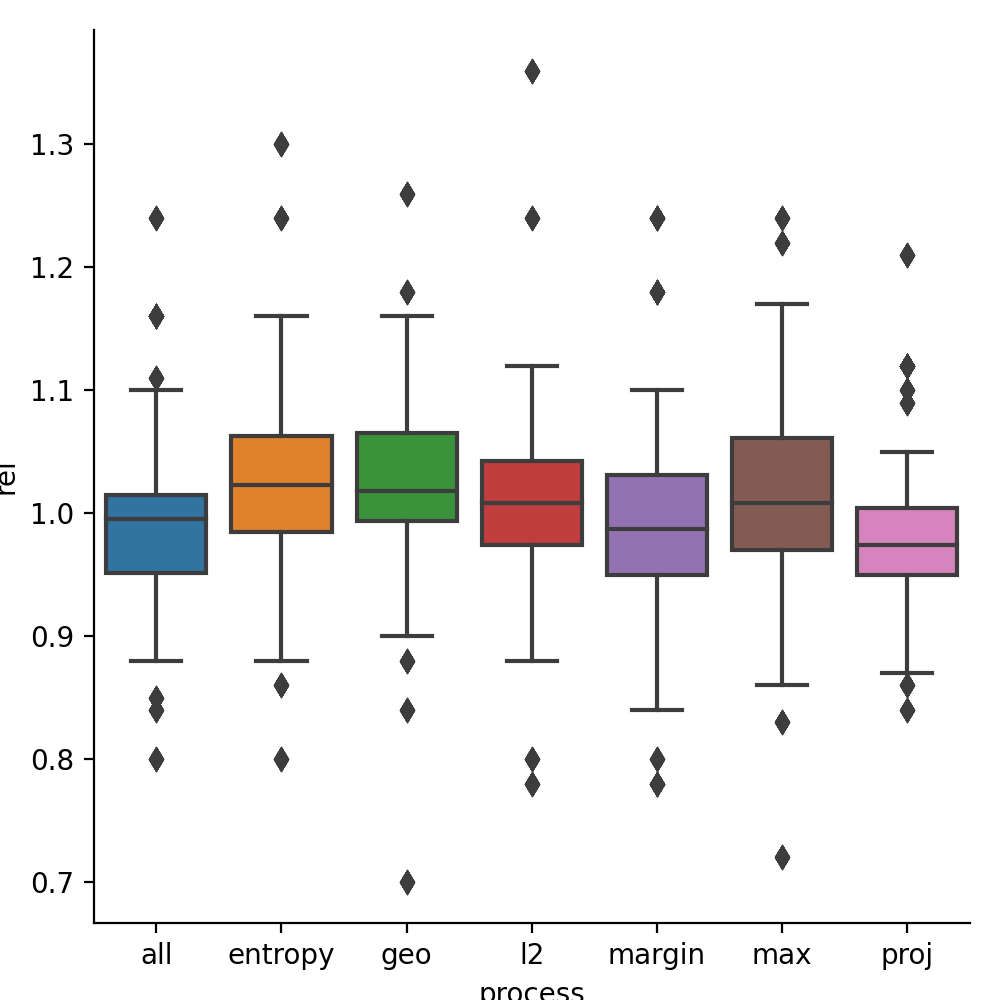

In [837]:
sns.catplot(kind="box", data=df, x="process", y="rel")

<IPython.core.display.Javascript object>


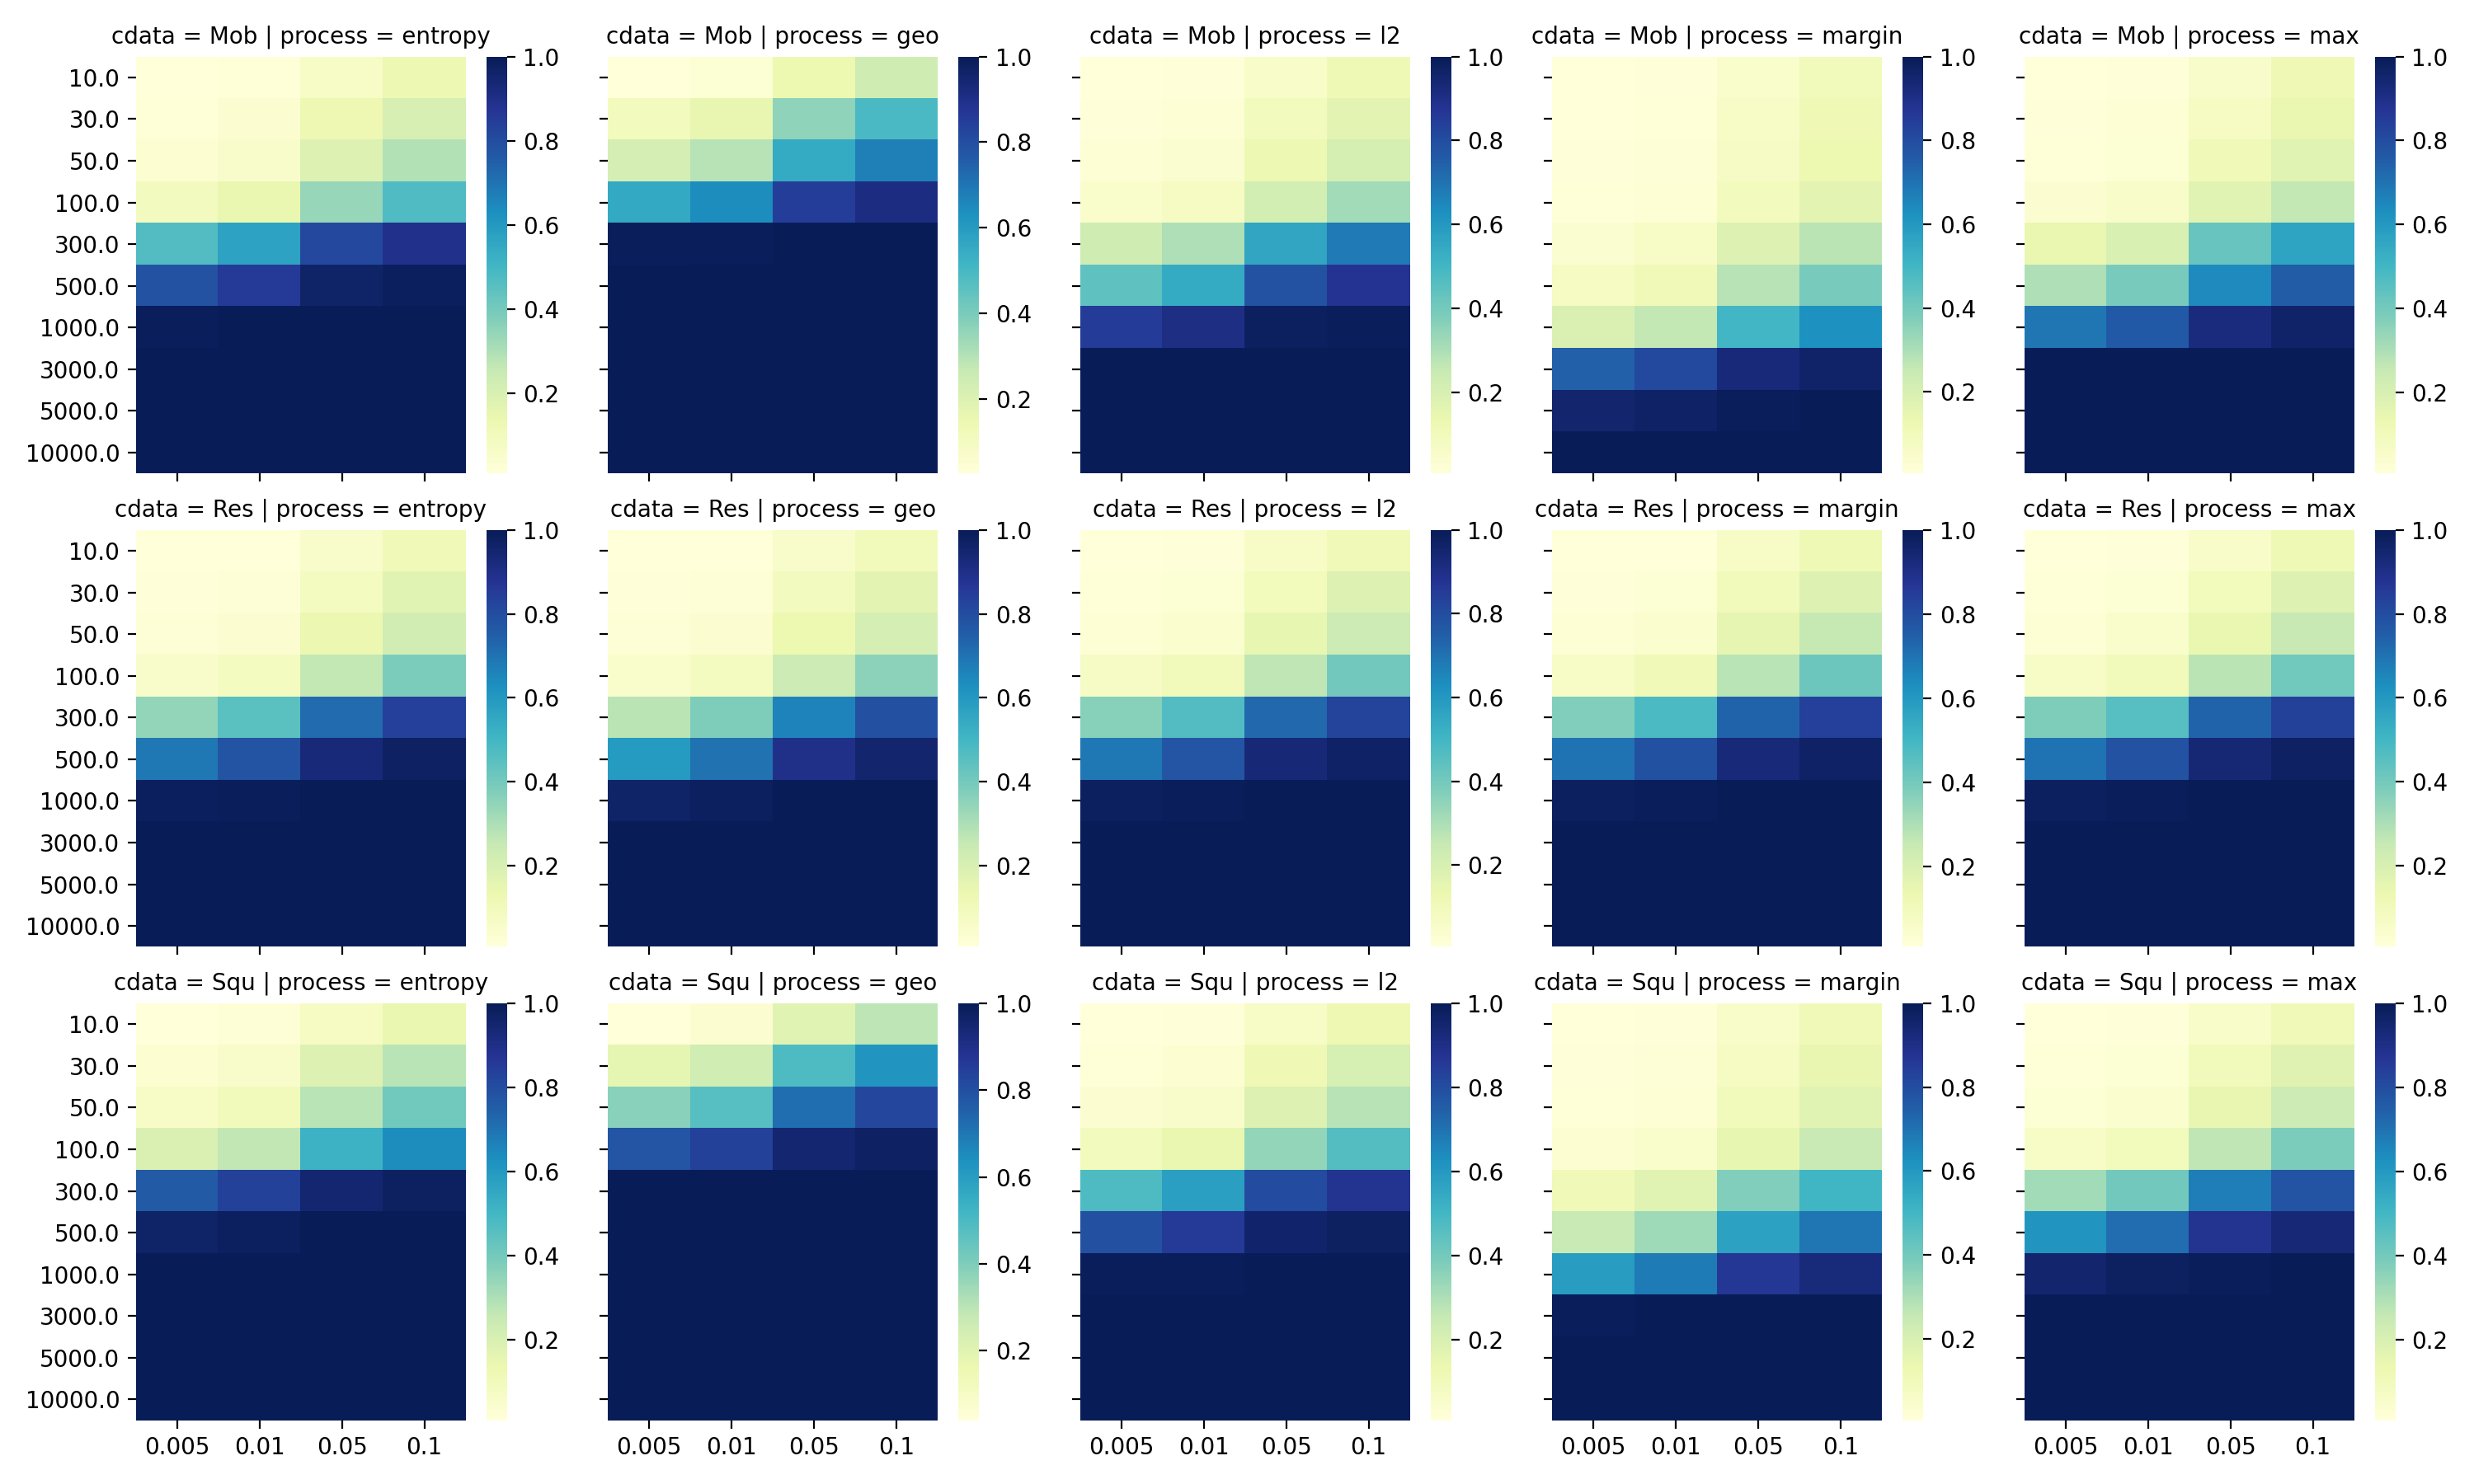

In [454]:
awa_heat(dfsAll)
plt.savefig("fig/awa_heat_abs.png")

<IPython.core.display.Javascript object>


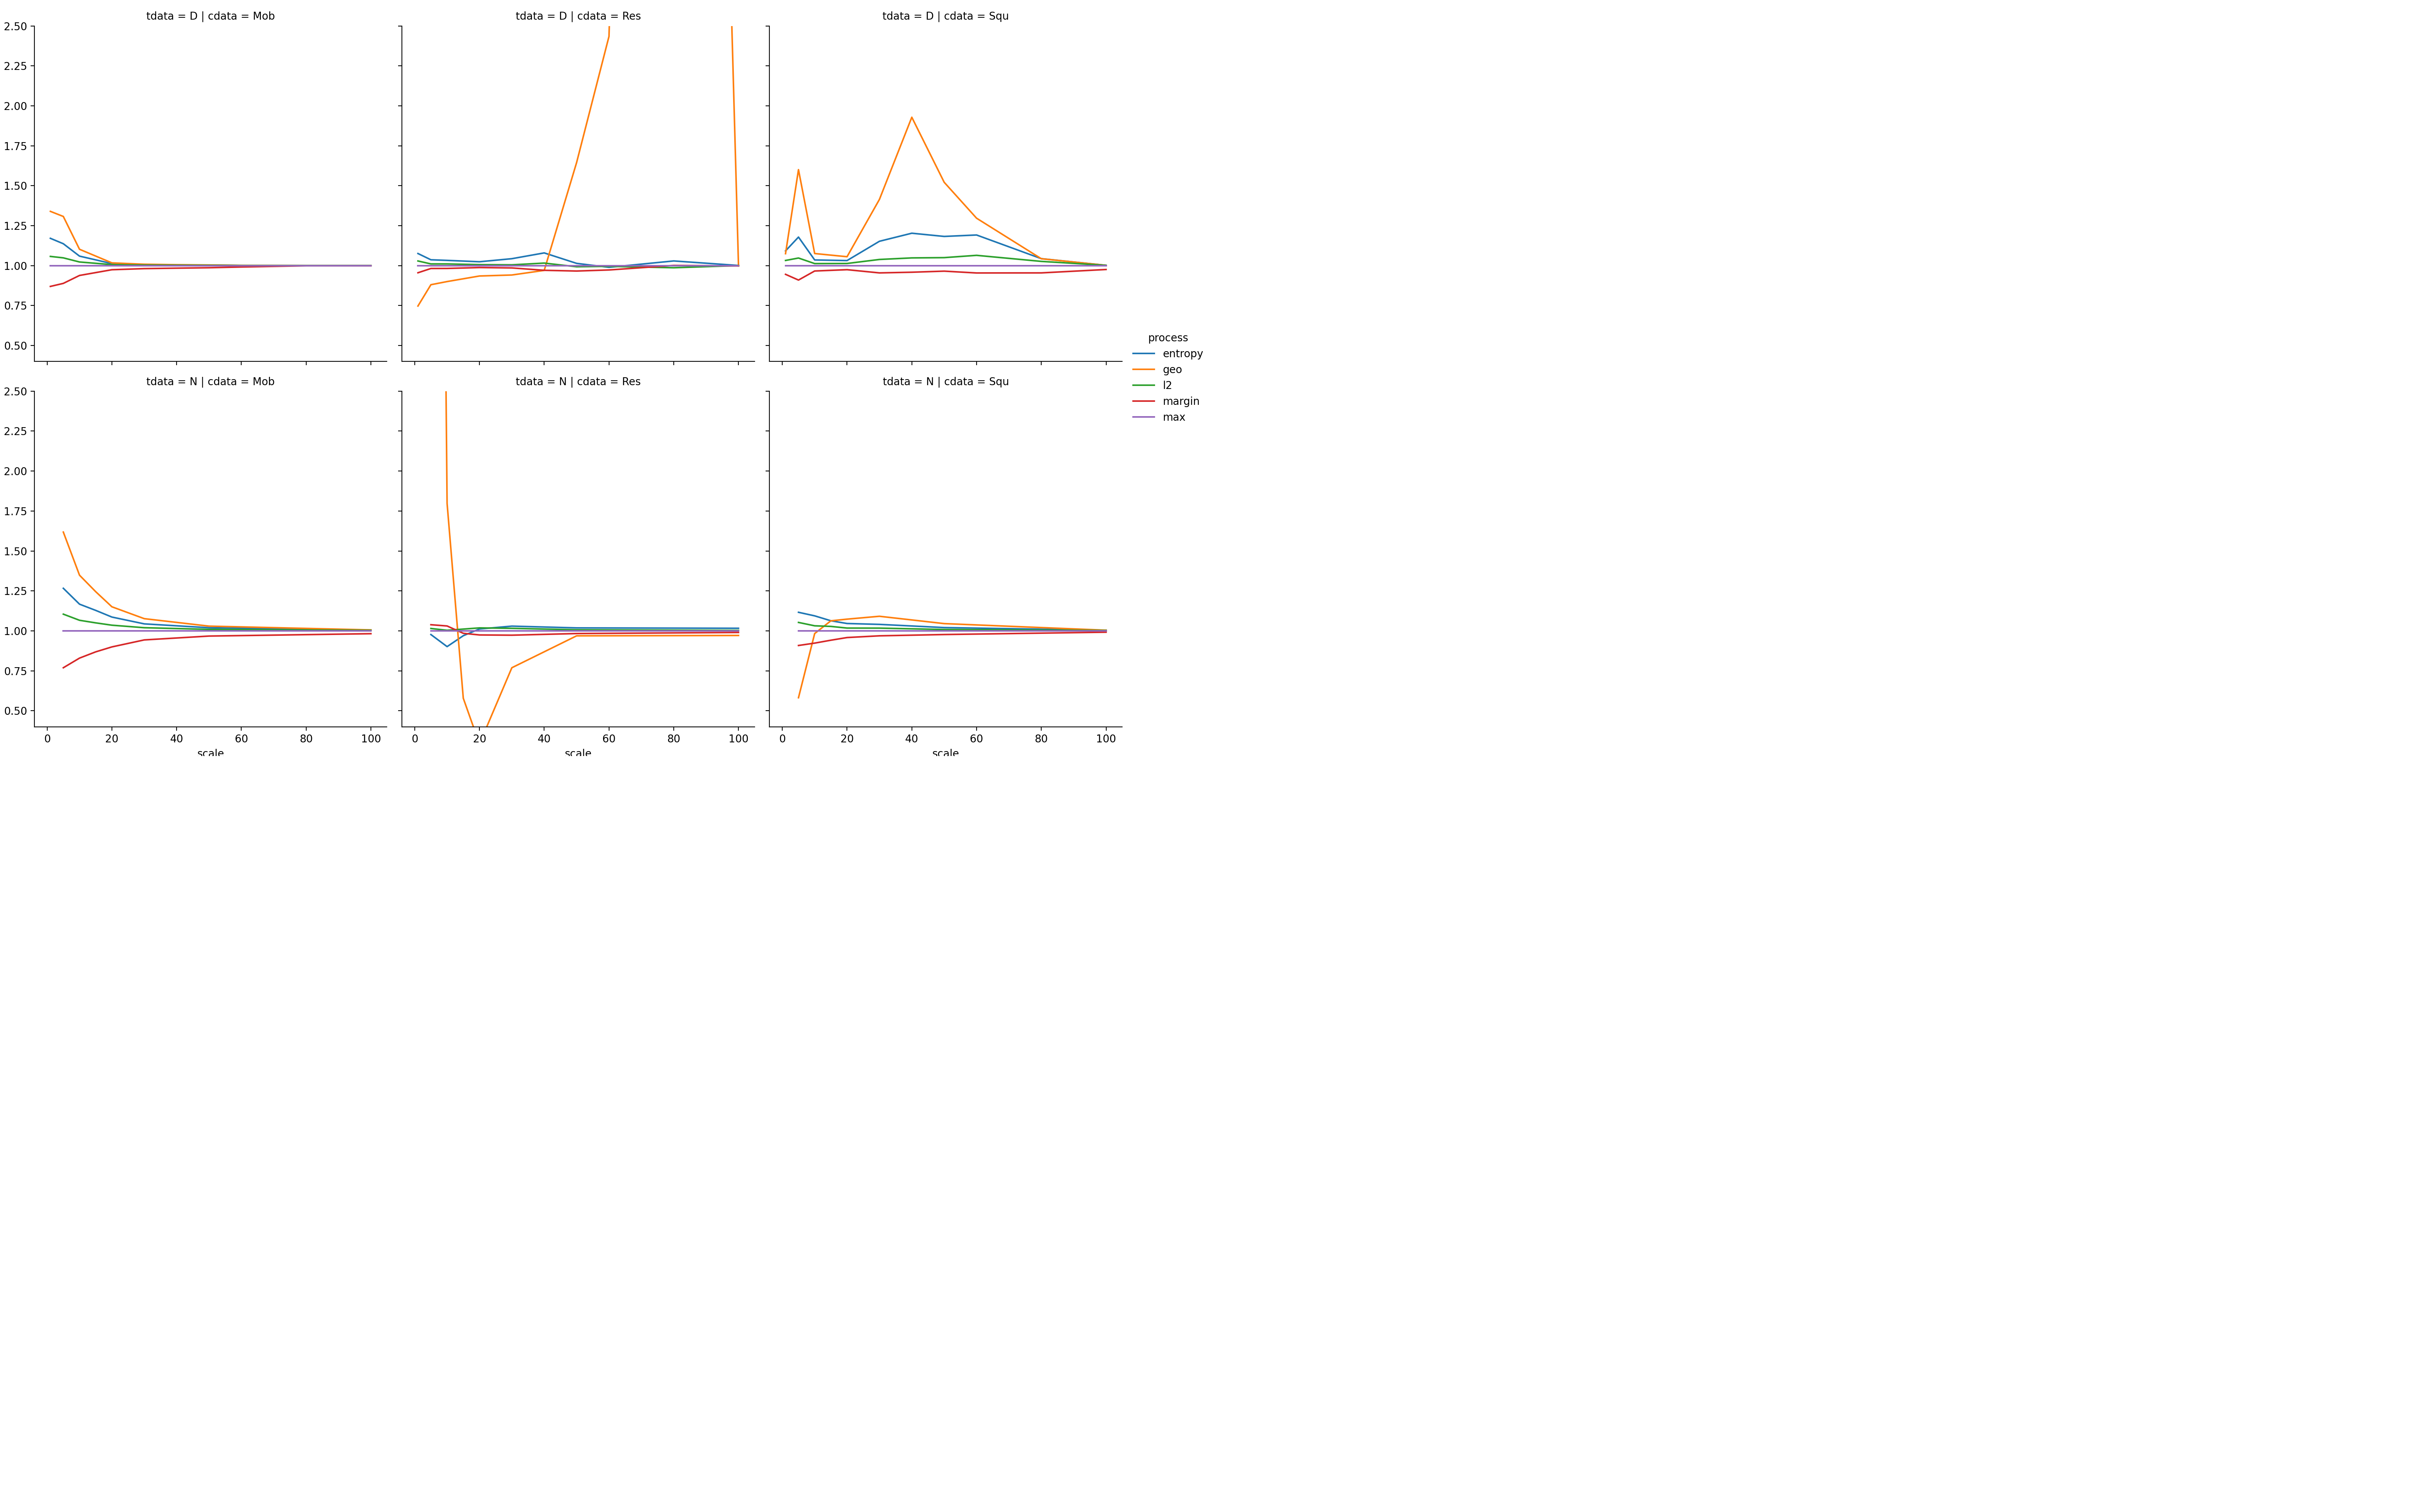

In [763]:
plot_line_other(rel_to_ks(dfsAll), "scale", mean=True)
plt.savefig("fig/mean_rel_scale.png")

In [681]:
def empiric_fpr(df, alpha, bs):
    df = df.copy()
    res = np.interp(alpha, df[df["bs"]==bs]["result"], df[df["bs"]==bs]["alpha"])
    return res
x = "results/basic-emulti_ksconf_entropy_geo_margin_0_1_l2-ResCal-ResVal.csv"
y = "config/basic-emulti_entropy_geo_logl2-ResCal-ResCal.csv"
z = "config/basic-emulti_ksconf_entropy_geo_margin_0_1_l2-ResCal-ResCal.csv"
z2 = "../config/basic-emulti_ksconf_entropy_geo_margin_0_1_l2-ResCal-ResCal.csv"
df = pd.read_csv(z2, names=["bs","alpha", "iter", "result"])
df["result"]=df["result"]/df["iter"]


empiric_fpr(df, 0.1, 100)

0.0967147435897436

In [687]:
df = pd.read_csv(z, names=["bs","alpha", "iter", "result"])

df

bs  alpha     iter  result
0        5.0  0.001  10000.0    48.0
1       10.0  0.001  10000.0    52.0
2       30.0  0.001  10000.0    45.0
3       50.0  0.001  10000.0    44.0
4      100.0  0.001  10000.0    48.0
5      300.0  0.001  10000.0    55.0
6      500.0  0.001  10000.0    57.0
7     1000.0  0.001  10000.0    53.0
8     3000.0  0.001  10000.0    37.0
9     5000.0  0.001  10000.0    55.0
10   10000.0  0.001  10000.0    58.0
11       5.0  0.005  10000.0   232.0
12      10.0  0.005  10000.0   246.0
13      30.0  0.005  10000.0   238.0
14      50.0  0.005  10000.0   253.0
15     100.0  0.005  10000.0   241.0
16     300.0  0.005  10000.0   268.0
17     500.0  0.005  10000.0   252.0
18    1000.0  0.005  10000.0   237.0
19    3000.0  0.005  10000.0   256.0
20    5000.0  0.005  10000.0   243.0
21   10000.0  0.005  10000.0   228.0
22       5.0  0.010  10000.0   499.0
23      10.0  0.010  10000.0   507.0
24      30.0  0.010  10000.0   497.0
25      50.0  0.010  10000.0   560.0
26     100.0  0.010  10000.0   500.0
27     300.0  0.010  10000.0   469.0
28     500.0  0.010  10000.0   490.0
29    1000.0  0.010  10000.0   497.0
30    3000.0  0.010  10000.0   473.0
31    5000.0  0.010  10000.0   499.0
32   10000.0  0.010  10000.0   476.0
33       5.0  0.015  10000.0   720.0
34      10.0  0.015  10000.0   734.0
35      30.0  0.015  10000.0   740.0
36      50.0  0.015  10000.0   724.0
37     100.0  0.015  10000.0   722.0
38     300.0  0.015  10000.0   777.0
39     500.0  0.015  10000.0   759.0
40    1000.0  0.015  10000.0   707.0
41    3000.0  0.015  10000.0   720.0
42    5000.0  0.015  10000.0   727.0
43   10000.0  0.015  10000.0   796.0
44       5.0  0.020  10000.0   926.0
45      10.0  0.020  10000.0   936.0
46      30.0  0.020  10000.0   944.0
47      50.0  0.020  10000.0   992.0
48     100.0  0.020  10000.0   946.0
49     300.0  0.020  10000.0  1011.0
50     500.0  0.020  10000.0   966.0
51    1000.0  0.020  10000.0   961.0
52    3000.0  0.020  10000.0   926.0
53    5000.0  0.020  10000.0   956.0
54   10000.0  0.020  10000.0   902.0
55       5.0  0.030  10000.0  1434.0
56      10.0  0.030  10000.0  1410.0
57      30.0  0.030  10000.0  1375.0
58      50.0  0.030  10000.0  1371.0
59     100.0  0.030  10000.0  1406.0
60     300.0  0.030  10000.0  1437.0
61     500.0  0.030  10000.0  1378.0
62    1000.0  0.030  10000.0  1417.0
63    3000.0  0.030  10000.0  1383.0
64    5000.0  0.030  10000.0  1460.0
65   10000.0  0.030  10000.0  1402.0
66       5.0  0.040  10000.0  1929.0
67      10.0  0.040  10000.0  1851.0
68      30.0  0.040  10000.0  1833.0
69      50.0  0.040  10000.0  1824.0
70     100.0  0.040  10000.0  1804.0
71     300.0  0.040  10000.0  1860.0
72     500.0  0.040  10000.0  1865.0
73    1000.0  0.040  10000.0  1836.0
74    3000.0  0.040  10000.0  1927.0
75    5000.0  0.040  10000.0  1871.0
76   10000.0  0.040  10000.0  1866.0
77       5.0  0.050  10000.0  2329.0
78      10.0  0.050  10000.0  2288.0
79      30.0  0.050  10000.0  2288.0
80      50.0  0.050  10000.0  2227.0
81     100.0  0.050  10000.0  2260.0
82     300.0  0.050  10000.0  2243.0
83     500.0  0.050  10000.0  2241.0
84    1000.0  0.050  10000.0  2310.0
85    3000.0  0.050  10000.0  2274.0
86    5000.0  0.050  10000.0  2224.0
87   10000.0  0.050  10000.0  2238.0
88       5.0  0.075  10000.0  3263.0
89      10.0  0.075  10000.0  3222.0
90      30.0  0.075  10000.0  3169.0
91      50.0  0.075  10000.0  3220.0
92     100.0  0.075  10000.0  3287.0
93     300.0  0.075  10000.0  3304.0
94     500.0  0.075  10000.0  3241.0
95    1000.0  0.075  10000.0  3292.0
96    3000.0  0.075  10000.0  3194.0
97    5000.0  0.075  10000.0  3216.0
98   10000.0  0.075  10000.0  3206.0
99       5.0  0.100  10000.0  4131.0
100     10.0  0.100  10000.0  4216.0
101     30.0  0.100  10000.0  4094.0
102     50.0  0.100  10000.0  4153.0
103    100.0  0.100  10000.0  4105.0
104    300.0  0.100  10000.0  4037.0
105    500.0  0.100  10000.0  4169.0
106   1000.0  0.100  10000.0  4062.0
107   3000.0  

In [685]:
df = pd.read_csv(z2, names=["bs","alpha", "iter", "result"])
df["result"]=df["result"]/df["iter"]
df

bs  alpha     iter  result
0       10.0  0.001  10000.0  0.0010
1       30.0  0.001  10000.0  0.0013
2       50.0  0.001  10000.0  0.0010
3      100.0  0.001  10000.0  0.0008
4      300.0  0.001  10000.0  0.0010
5      500.0  0.001  10000.0  0.0005
6     1000.0  0.001  10000.0  0.0004
7     3000.0  0.001  10000.0  0.0015
8     5000.0  0.001  10000.0  0.0005
9    10000.0  0.001  10000.0  0.0016
10      10.0  0.005  10000.0  0.0058
11      30.0  0.005  10000.0  0.0045
12      50.0  0.005  10000.0  0.0054
13     100.0  0.005  10000.0  0.0049
14     300.0  0.005  10000.0  0.0052
15     500.0  0.005  10000.0  0.0049
16    1000.0  0.005  10000.0  0.0035
17    3000.0  0.005  10000.0  0.0066
18    5000.0  0.005  10000.0  0.0045
19   10000.0  0.005  10000.0  0.0035
20      10.0  0.010  10000.0  0.0103
21      30.0  0.010  10000.0  0.0106
22      50.0  0.010  10000.0  0.0103
23     100.0  0.010  10000.0  0.0120
24     300.0  0.010  10000.0  0.0096
25     500.0  0.010  10000.0  0.0118
26    1000.0  0.010  10000.0  0.0096
27    3000.0  0.010  10000.0  0.0122
28    5000.0  0.010  10000.0  0.0105
29   10000.0  0.010  10000.0  0.0095
30      10.0  0.015  10000.0  0.0124
31      30.0  0.015  10000.0  0.0153
32      50.0  0.015  10000.0  0.0131
33     100.0  0.015  10000.0  0.0147
34     300.0  0.015  10000.0  0.0154
35     500.0  0.015  10000.0  0.0144
36    1000.0  0.015  10000.0  0.0148
37    3000.0  0.015  10000.0  0.0146
38    5000.0  0.015  10000.0  0.0168
39   10000.0  0.015  10000.0  0.0166
40      10.0  0.020  10000.0  0.0205
41      30.0  0.020  10000.0  0.0224
42      50.0  0.020  10000.0  0.0209
43     100.0  0.020  10000.0  0.0204
44     300.0  0.020  10000.0  0.0172
45     500.0  0.020  10000.0  0.0192
46    1000.0  0.020  10000.0  0.0209
47    3000.0  0.020  10000.0  0.0190
48    5000.0  0.020  10000.0  0.0181
49   10000.0  0.020  10000.0  0.0166
50      10.0  0.030  10000.0  0.0299
51      30.0  0.030  10000.0  0.0313
52      50.0  0.030  10000.0  0.0256
53     100.0  0.030  10000.0  0.0285
54     300.0  0.030  10000.0  0.0250
55     500.0  0.030  10000.0  0.0269
56    1000.0  0.030  10000.0  0.0291
57    3000.0  0.030  10000.0  0.0305
58    5000.0  0.030  10000.0  0.0315
59   10000.0  0.030  10000.0  0.0298
60      10.0  0.040  10000.0  0.0359
61      30.0  0.040  10000.0  0.0376
62      50.0  0.040  10000.0  0.0344
63     100.0  0.040  10000.0  0.0389
64     300.0  0.040  10000.0  0.0411
65     500.0  0.040  10000.0  0.0409
66    1000.0  0.040  10000.0  0.0427
67    3000.0  0.040  10000.0  0.0403
68    5000.0  0.040  10000.0  0.0352
69   10000.0  0.040  10000.0  0.0445
70      10.0  0.050  10000.0  0.0493
71      30.0  0.050  10000.0  0.0487
72      50.0  0.050  10000.0  0.0423
73     100.0  0.050  10000.0  0.0531
74     300.0  0.050  10000.0  0.0455
75     500.0  0.050  10000.0  0.0494
76    1000.0  0.050  10000.0  0.0475
77    3000.0  0.050  10000.0  0.0518
78    5000.0  0.050  10000.0  0.0496
79   10000.0  0.050  10000.0  0.0486
80      10.0  0.075  10000.0  0.0775
81      30.0  0.075  10000.0  0.0690
82      50.0  0.075  10000.0  0.0741
83     100.0  0.075  10000.0  0.0729
84     300.0  0.075  10000.0  0.0743
85     500.0  0.075  10000.0  0.0732
86    1000.0  0.075  10000.0  0.0806
87    3000.0  0.075  10000.0  0.0781
88    5000.0  0.075  10000.0  0.0747
89   10000.0  0.075  10000.0  0.0632
90      10.0  0.100  10000.0  0.1005
91      30.0  0.100  10000.0  0.1114
92      50.0  0.100  10000.0  0.1002
93     100.0  0.100  10000.0  0.1041
94     300.0  0.100  10000.0  0.0947
95     500.0  0.100  10000.0  0.1017
96    1000.0  0.100  10000.0  0.1027
97    3000.0  0.100  10000.0  0.1010
98    5000.0  0.100  10000.0  0.0995
99   10000.0  0.100  10000.0  0.1031
100     10.0  0.500  10000.0  0.4093
101     30.0  0.500  10000.0  0.4077
102     50.0  0.500  10000.0  0.4079
103    100.0  0.500  10000.0  0.4060
104    300.0  0.500  10000.0  0.4098
105    500.0  0.500  10000.0  0.4089
106   1000.0  0.500  10000.0  0.4147
107   3000.0  

In [160]:
dfsAll[(dfsAll["cdata"]=="Squ") & (dfsAll["tdata"]=="N") & (dfsAll["alpha"]==0.01) & (dfsAll["scale"]<=20) & (dfsAll["process"]=="margin")]

cdata tdata  scale process       bs  alpha  result
2610   Squ     N      5  margin     10.0   0.01  0.0096
2611   Squ     N      5  margin     30.0   0.01  0.0109
2612   Squ     N      5  margin     50.0   0.01  0.0156
2613   Squ     N      5  margin    100.0   0.01  0.0189
2614   Squ     N      5  margin    300.0   0.01  0.0451
2615   Squ     N      5  margin    500.0   0.01  0.0814
2616   Squ     N      5  margin   1000.0   0.01  0.1825
2617   Squ     N      5  margin   3000.0   0.01  0.6279
2618   Squ     N      5  margin   5000.0   0.01  0.8887
2619   Squ     N      5  margin  10000.0   0.01  0.9979
2650   Squ     N     10  margin     10.0   0.01  0.0281
2651   Squ     N     10  margin     30.0   0.01  0.0893
2652   Squ     N     10  margin     50.0   0.01  0.1626
2653   Squ     N     10  margin    100.0   0.01  0.3866
2654   Squ     N     10  margin    300.0   0.01  0.9348
2655   Squ     N     10  margin    500.0   0.01  0.9969
2656   Squ     N     10  margin   1000.0   0.01  1.0000
2657   Squ     N     10  margin   3000.0   0.01  1.0000
2658   Squ     N     10  margin   5000.0   0.01  1.0000
2659   Squ     N     10  margin  10000.0   0.01  1.0000
2690   Squ     N     15  margin     10.0   0.01  0.0814
2691   Squ     N     15  margin     30.0   0.01  0.3759
2692   Squ     N     15  margin     50.0   0.01  0.6571
2693   Squ     N     15  margin    100.0   0.01  0.9610
2694   Squ     N     15  margin    300.0   0.01  1.0000
2695   Squ     N     15  margin    500.0   0.01  1.0000
2696   Squ     N     15  margin   1000.0   0.01  1.0000
2697   Squ     N     15  margin   3000.0   0.01  1.0000
2698   Squ     N     15  margin   5000.0   0.01  1.0000
2699   Squ     N     15  margin  10000.0   0.01  1.0000
2730   Squ     N     20  margin     10.0   0.01  0.1635
2731   Squ     N     20  margin     30.0   0.01  0.6940
2732   Squ     N     20  margin     50.0   0.01  0.9353
2733   Squ     N     20  margin    100.0   0.01  0.9994
2734   Squ     N     20  margin    300.0   0.01  1.0000
2735   Squ     N     20  margin    500.0   0.01  1.0000
2736   Squ     N     20  margin   1000.0   0.01  1.0000
2737   Squ     N     20  margin   3000.0   0.01  1.0000
2738   Squ     N     20  margin   5000.0   0.01  1.0000
2739   Squ     N     20  margin  10000.0   0.01  1.0000

In [56]:
df = vdfsAll.copy()
df1 = df[df["tdata"]!="Val"].copy().set_index(["cdata", "scale", "process", "bs", "alpha"])
df2 = df[df["tdata"]=="Val"].copy().set_index(["cdata", "scale", "process", "bs", "alpha"]).rename(columns={"result":"val"}).drop(columns=["tdata"])
df = df1.join(df2).reset_index()[['cdata', 'tdata', 'scale', 'process', 'bs', 'alpha','val', 'result']]

cdata tdata  scale  process       bs  alpha     val  result
0      Res   AwA      0  entropy     10.0  0.005  0.0058  0.0058
1      Res   AwA      0  entropy     10.0  0.010  0.0096  0.0089
2      Res   AwA      0  entropy     10.0  0.050  0.0492  0.0536
3      Res   AwA      0  entropy     10.0  0.100  0.0961  0.1088
4      Res   AwA      0  entropy     30.0  0.005  0.0055  0.0123
...    ...   ...    ...      ...      ...    ...     ...     ...
7195   Squ     N    100      max  10000.0  0.010     NaN  1.0000
7196   Squ     D    100      max  10000.0  0.050     NaN  1.0000
7197   Squ     N    100      max  10000.0  0.050     NaN  1.0000
7198   Squ     D    100      max  10000.0  0.100     NaN  1.0000
7199   Squ     N    100      max  10000.0  0.100     NaN  1.0000

[7200 rows x 8 columns]

In [76]:
vdfLogVuc = true_volume_under_curves(vdfsAll)

/Users/krk/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/krk/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [75]:
df

cdata tdata  scale  process       bs  alpha     val  result
0      Res   AwA      0  entropy     10.0  0.005  0.0058  0.0058
1      Res     D      1  entropy     10.0  0.005  0.0058  0.0147
2      Res     D      5  entropy     10.0  0.005  0.0058  0.1993
3      Res     D     10  entropy     10.0  0.005  0.0058  0.2166
4      Res     D     20  entropy     10.0  0.005  0.0058  0.2573
...    ...   ...    ...      ...      ...    ...     ...     ...
7195   Squ     N     15      max  10000.0  0.100  0.1678  1.0000
7196   Squ     N     20      max  10000.0  0.100  0.1678  1.0000
7197   Squ     N     30      max  10000.0  0.100  0.1678  1.0000
7198   Squ     N     50      max  10000.0  0.100  0.1678  1.0000
7199   Squ     N    100      max  10000.0  0.100  0.1678  1.0000

[7200 rows x 8 columns]

In [72]:
df[(df["tdata"]=="N")]

cdata tdata  scale  process       bs  alpha     val  result
11     Res     N      5  entropy     10.0  0.005  0.0058  0.0051
12     Res     N     10  entropy     10.0  0.005  0.0058  0.0057
13     Res     N     15  entropy     10.0  0.005  0.0058  0.0076
14     Res     N     20  entropy     10.0  0.005  0.0058  0.0152
15     Res     N     30  entropy     10.0  0.005  0.0058  0.0573
...    ...   ...    ...      ...      ...    ...     ...     ...
7195   Squ     N     15      max  10000.0  0.100  0.1678  1.0000
7196   Squ     N     20      max  10000.0  0.100  0.1678  1.0000
7197   Squ     N     30      max  10000.0  0.100  0.1678  1.0000
7198   Squ     N     50      max  10000.0  0.100  0.1678  1.0000
7199   Squ     N    100      max  10000.0  0.100  0.1678  1.0000

[2800 rows x 8 columns]

In [366]:
vdfsAll
#df[(df["cdata"]=="Res") & (df["tdata"]=="AwA")]
#plot_lvuc_line(dfLogVuc)
#plot_line_other(rel_to_mean(dfsAll), "alpha")
#draw_roc_scale(dfsAll, "Squ", "AwA", 100)
#rel_to_ks(dfsAll)

cdata tdata  scale  process       bs  alpha     val  result
0       Mob   AwA      0  entropy     10.0  0.005  0.0045  0.0091
1       Mob     D      1  entropy     10.0  0.005  0.0045  0.0305
2       Mob     D      5  entropy     10.0  0.005  0.0045  0.2212
3       Mob     D     10  entropy     10.0  0.005  0.0045  0.6104
4       Mob     D     20  entropy     10.0  0.005  0.0045  0.9136
...     ...   ...    ...      ...      ...    ...     ...     ...
10795   Squ     N     15      max  10000.0  0.100  0.1678  1.0000
10796   Squ     N     20      max  10000.0  0.100  0.1678  1.0000
10797   Squ     N     30      max  10000.0  0.100  0.1678  1.0000
10798   Squ     N     50      max  10000.0  0.100  0.1678  1.0000
10799   Squ     N    100      max  10000.0  0.100  0.1678  1.0000

[10800 rows x 8 columns]

<IPython.core.display.Javascript object>


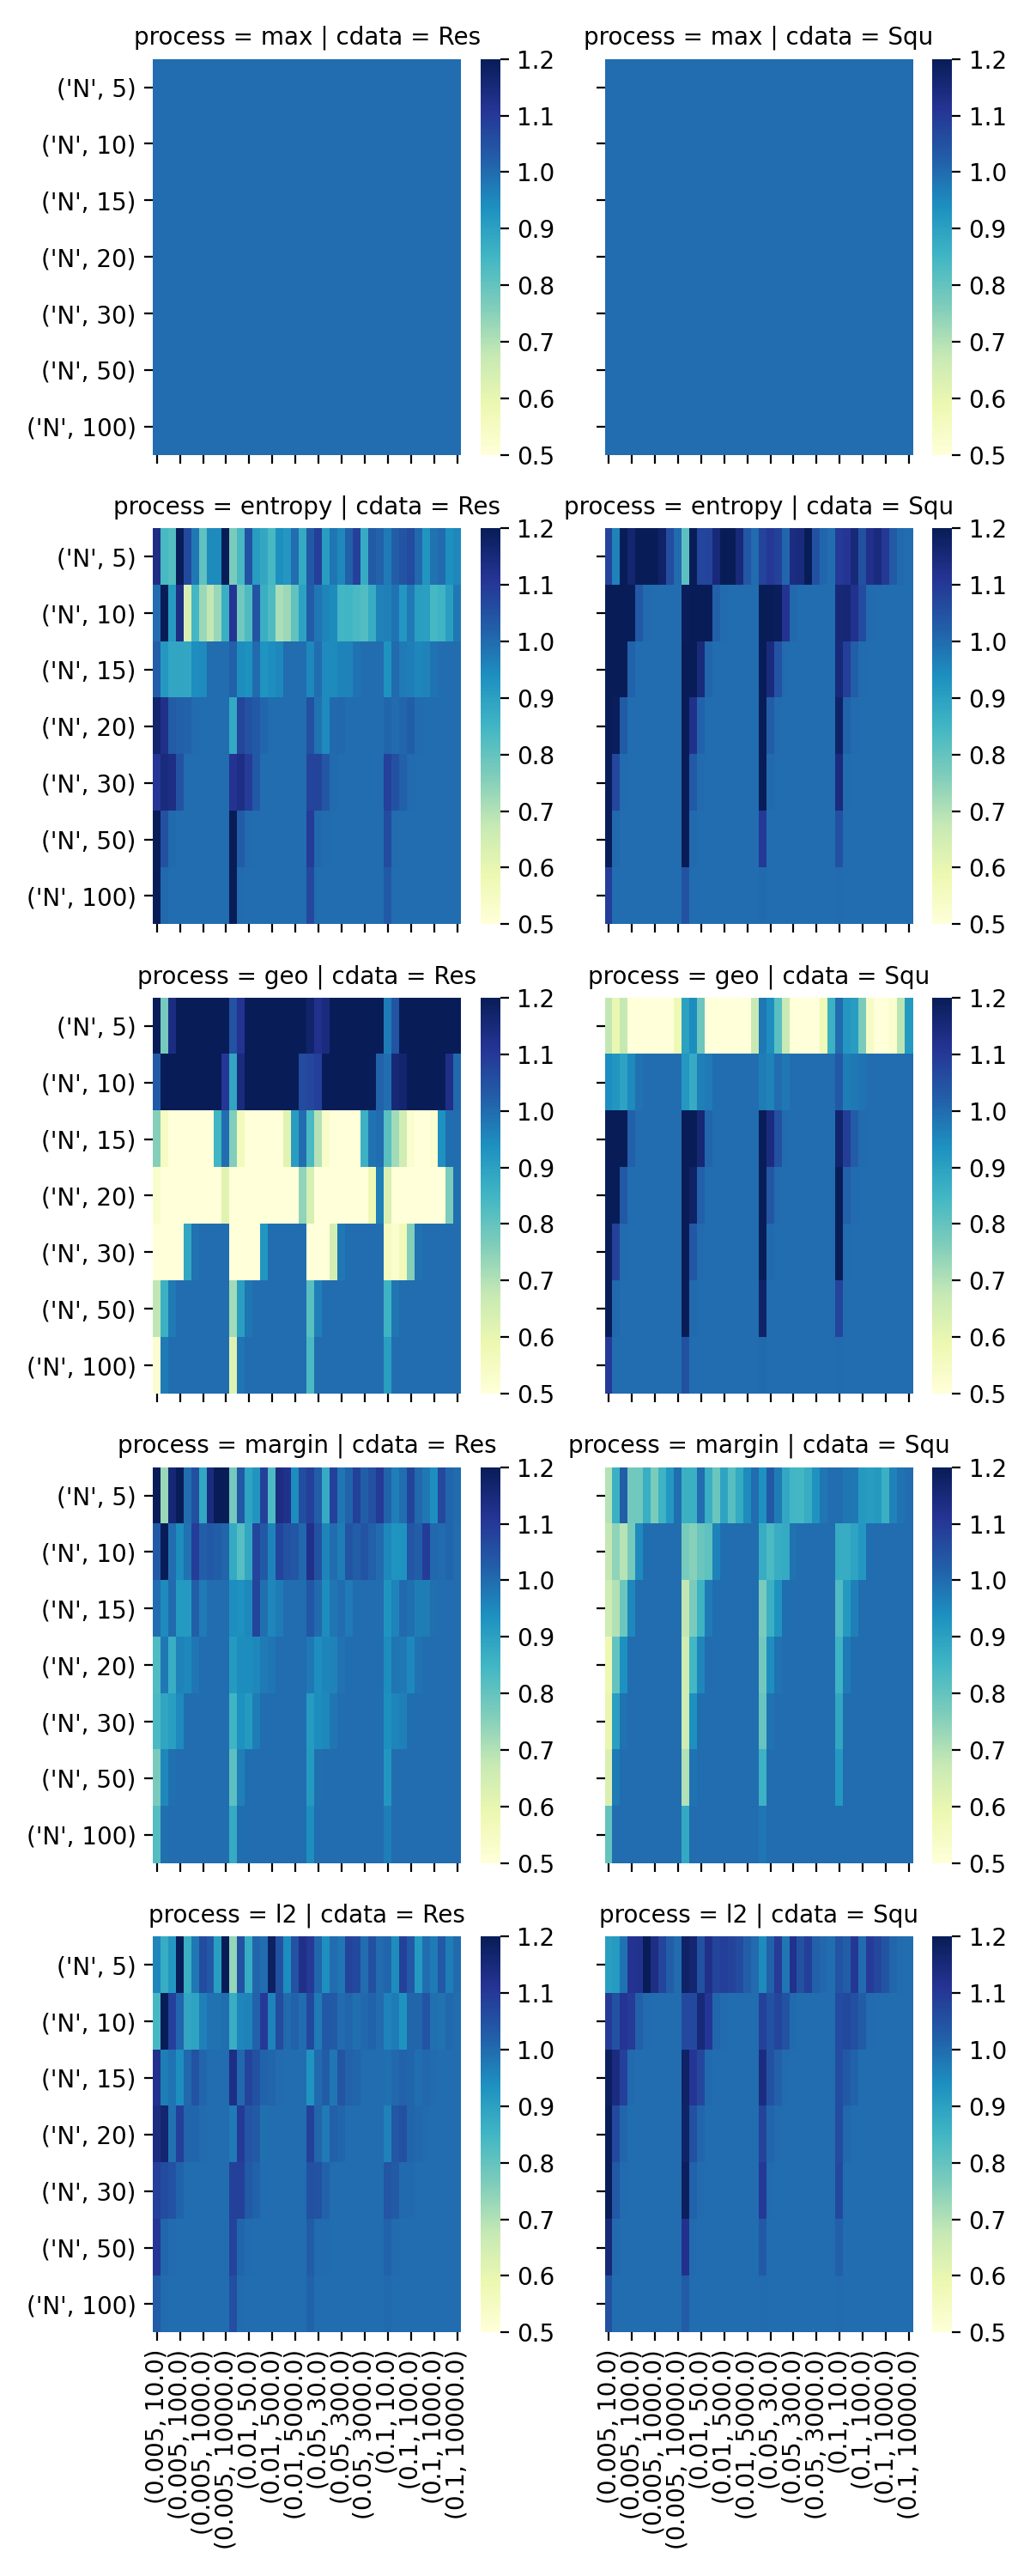

In [100]:
df = rel_to_ks(dfsAll, lambda x,y : (x/y))
misc_heat(df[(df["tdata"]=="N")], vmin=0.5, vmax=1.2)


<IPython.core.display.Javascript object>


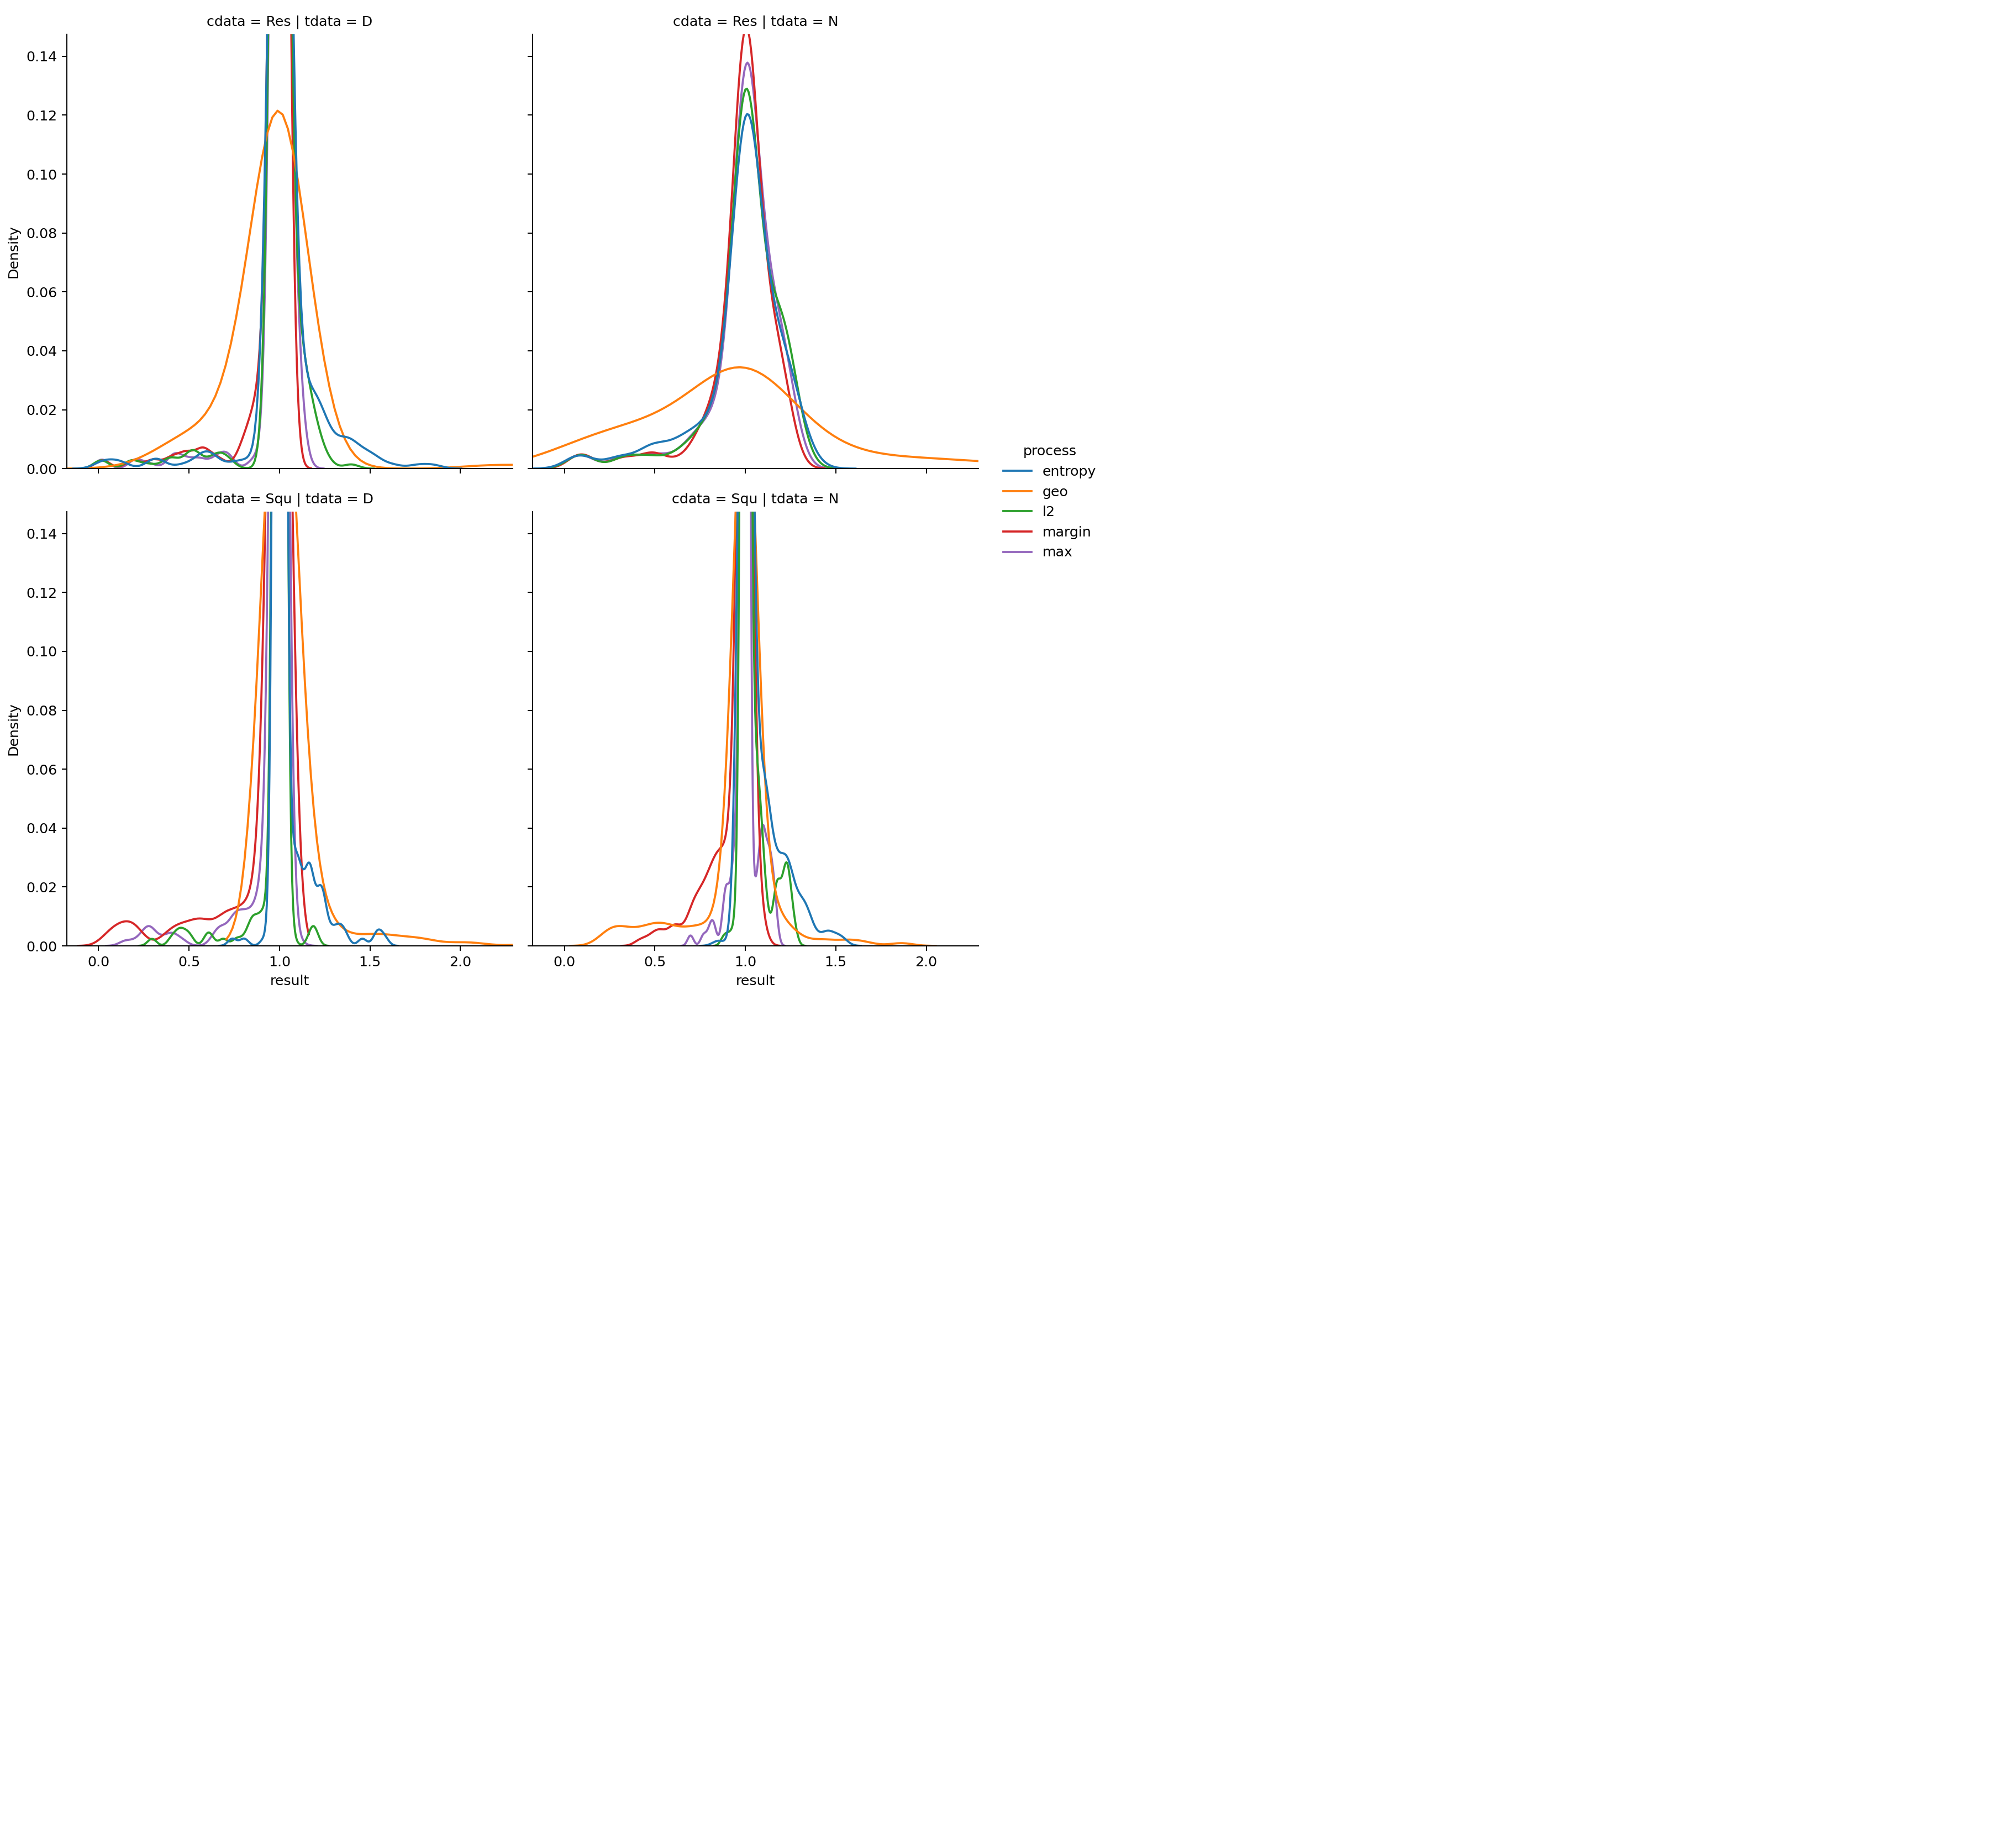

In [581]:
plot_distr_line(rel_to_mean(dfsAll))

<IPython.core.display.Javascript object>


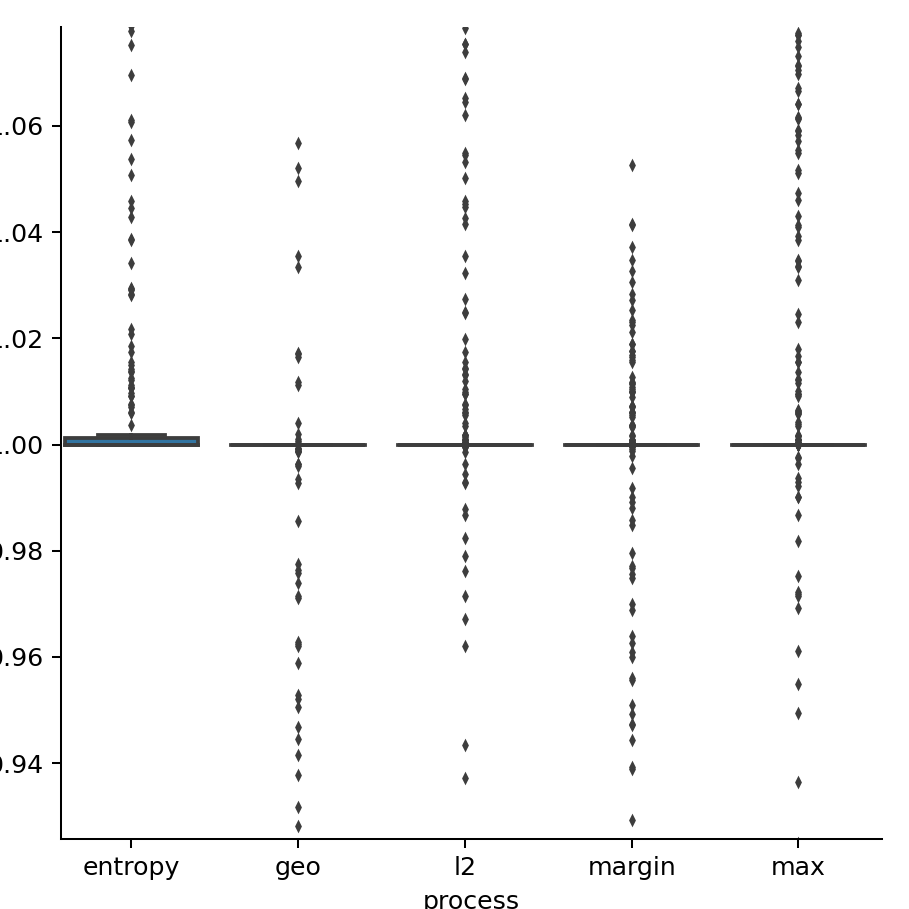

In [597]:
plot_single_distr_box(rel_to_mean(dfsAll), "Res", "D")

<IPython.core.display.Javascript object>


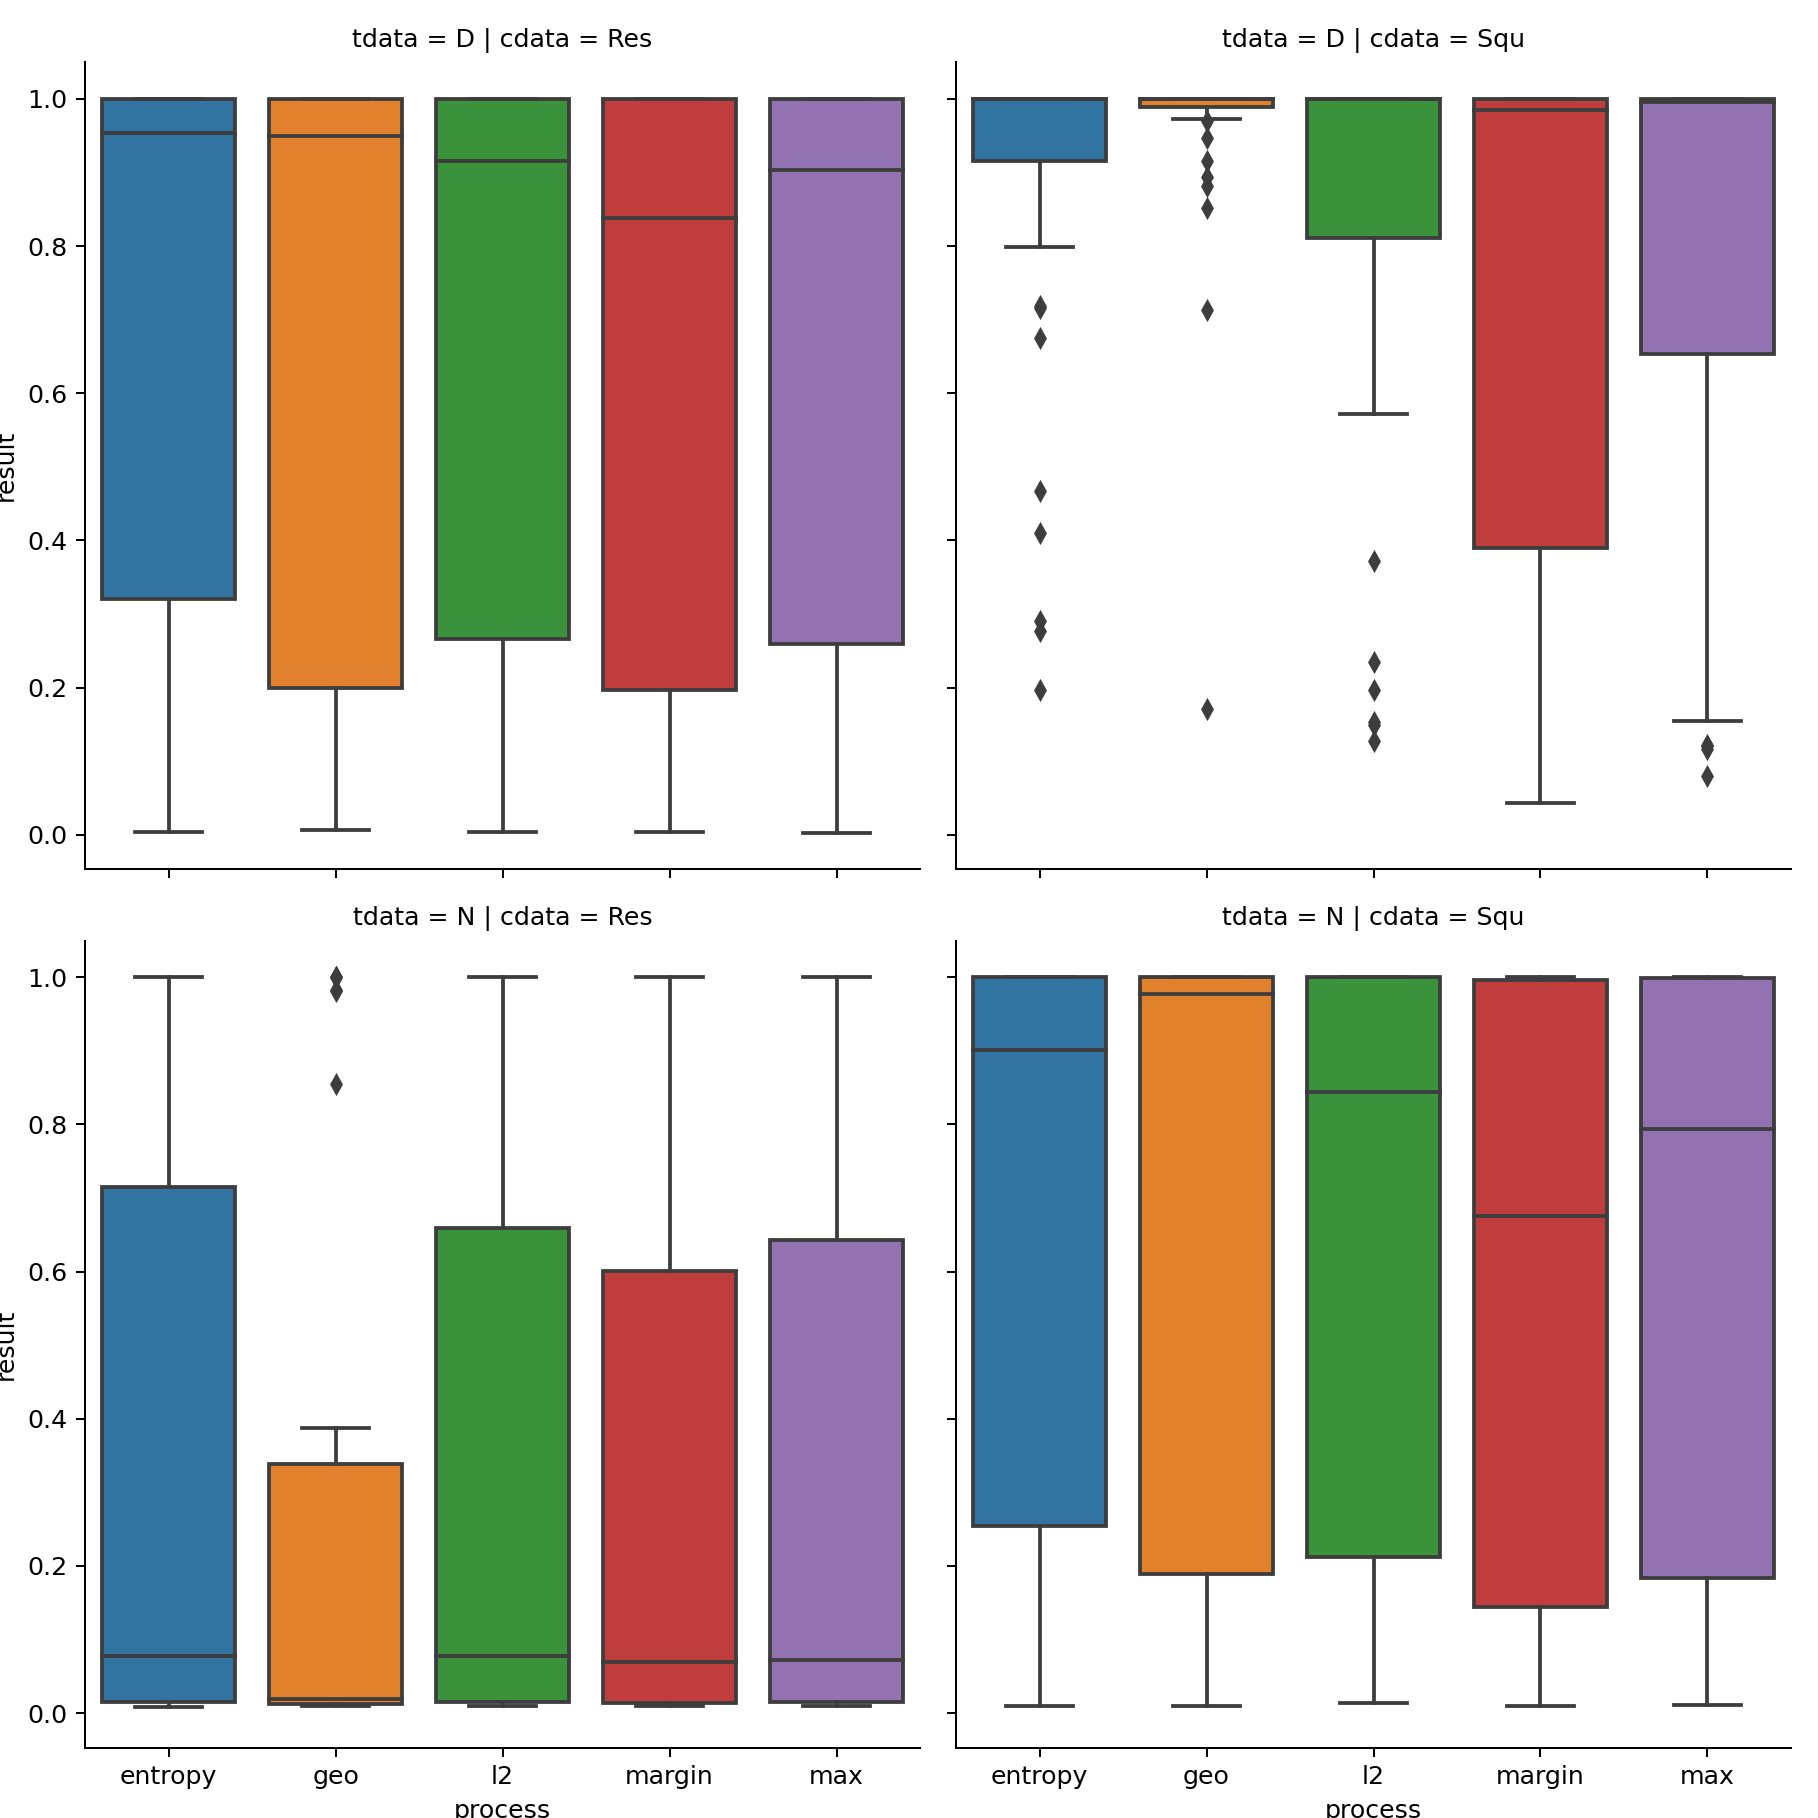

In [875]:
#df = rel_to_mean(dfsAll, lambda x,y : (x-y)/y).sort_values(["cdata","tdata","process"])
df = dfsAll
df = df.sort_values(["cdata","tdata", "process"])
df = df[(df["tdata"]!="AwA") & (df["bs"]<=100) & (df["alpha"]==0.01)]
g = sns.catplot(kind="box", data=df, y="result", x="process",col="cdata", row="tdata"  )
#g = sns.displot(kind="kde", data=df, x="result", hue="process", cut=0,  col="cdata", row="tdata" )
#g.set(yscale="log")

<IPython.core.display.Javascript object>


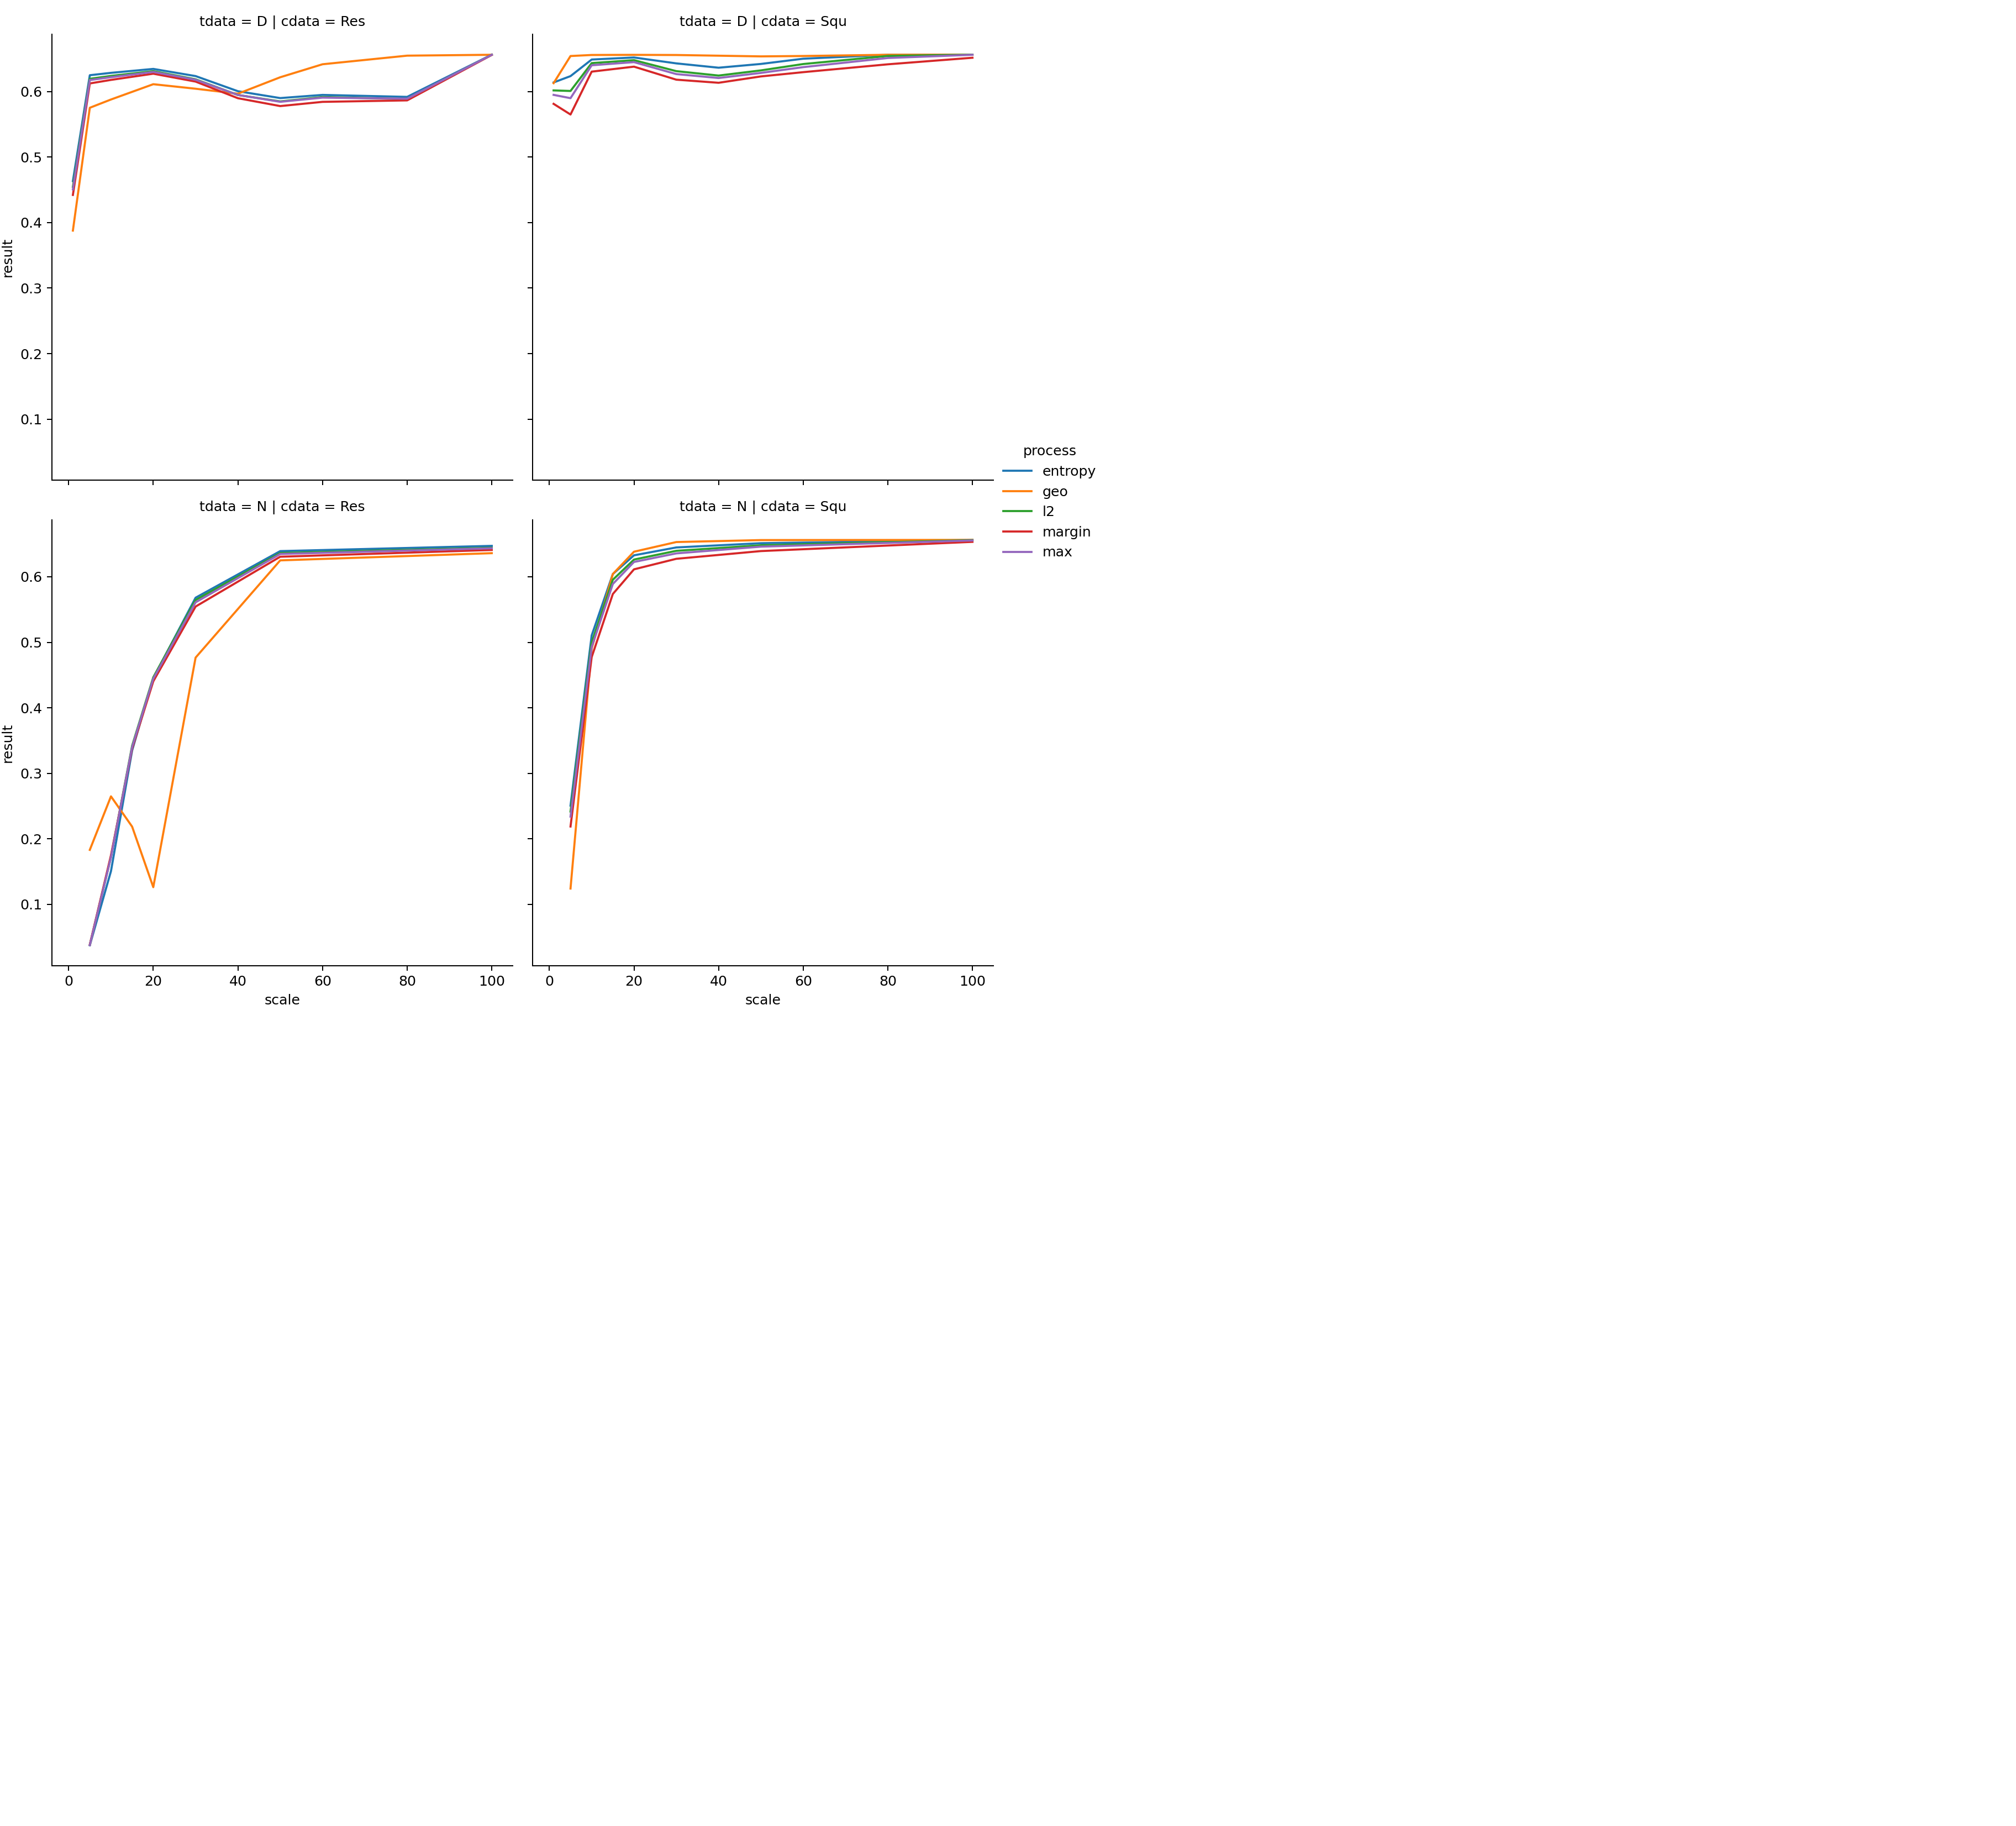

In [883]:
plot_line_scale(dfLogVuc, "scale")

<IPython.core.display.Javascript object>


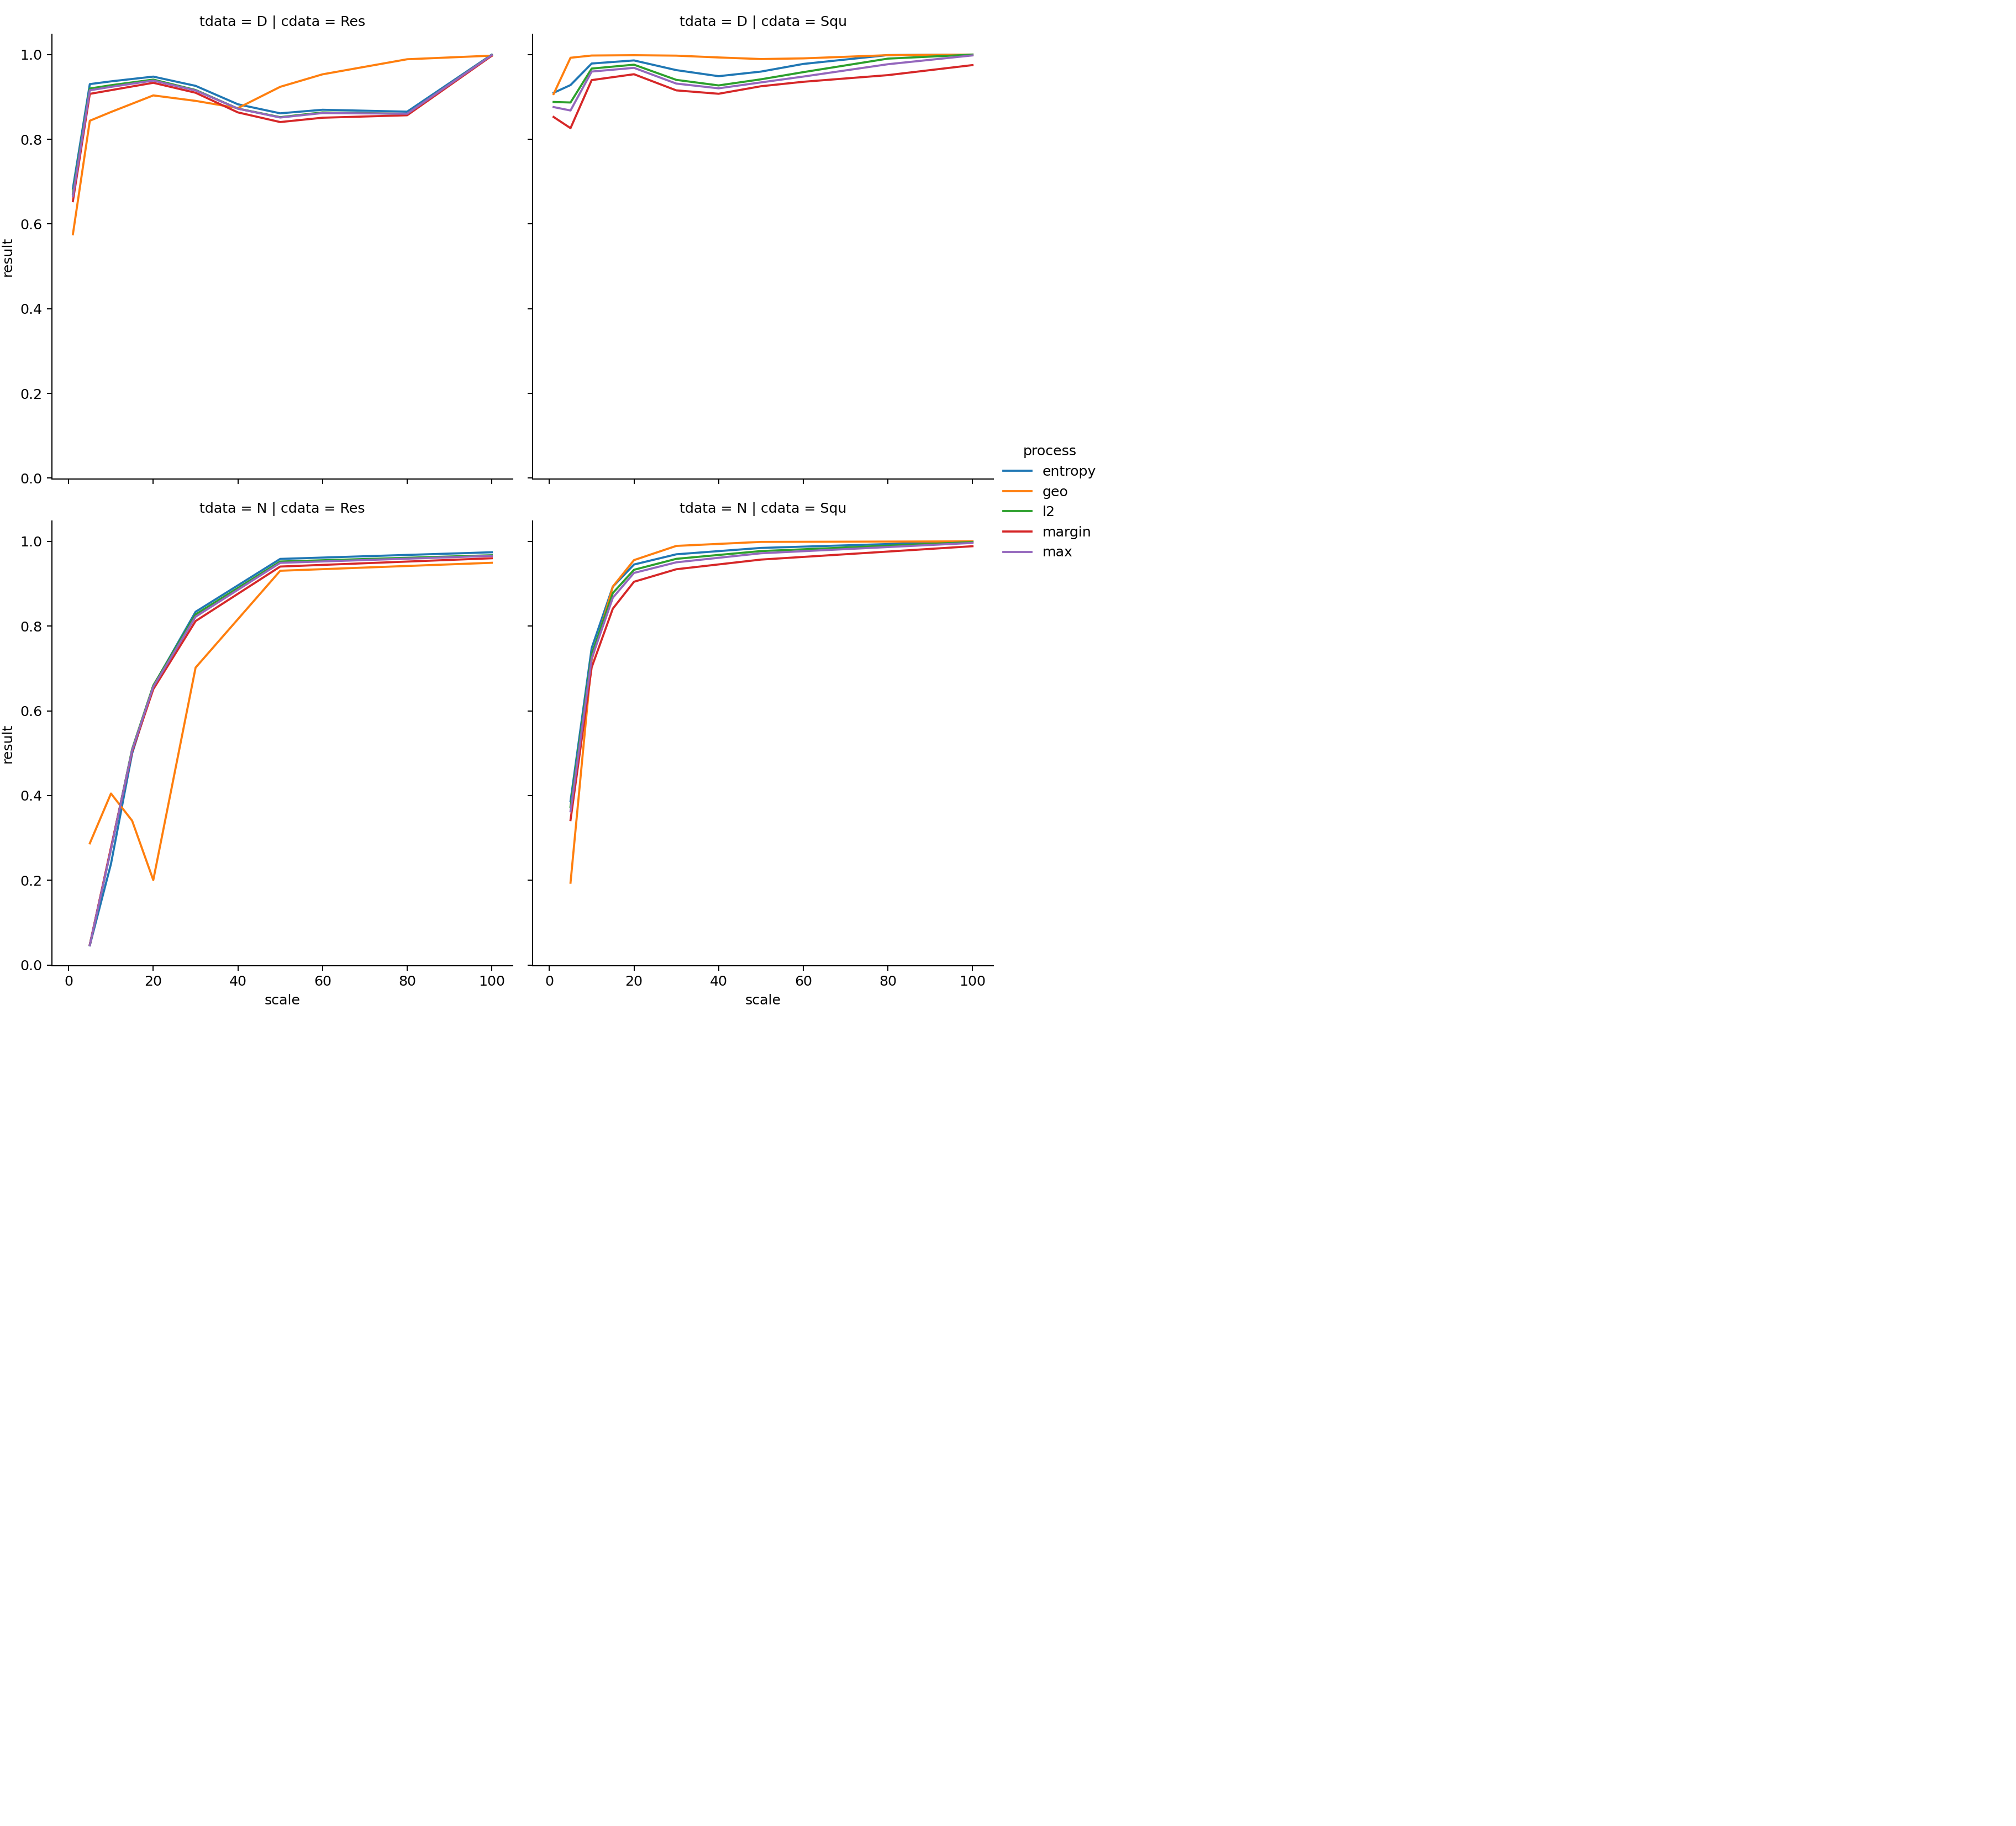

In [884]:
plot_line_scale(dfsAll, "scale")

In [447]:
def load_clf(path):
    ma = sorted(["ksconf", "margin_0_1", "geo", "l2", "entropy"])
    na = {"ksconf":"max", "margin_0_1":"margin", "geo":"geo", "l2":"l2", "entropy":"entropy"}
    mb = sorted(["ResNet50", "SqueezeNet", "MobileNet25"])
    nb = {"ResNet50":"Res", "SqueezeNet":"Squ", "MobileNet25":"Mob"}
    dfs = [pd.concat([pd.read_csv("clf/{0}-{1}_{2}.csv".format(i,j, path), names=[na[i]]) for i in ma], axis=1).unstack().reset_index().rename(columns={"level_0":"process", 0:nb[j]}).drop(columns=["level_1"]).reset_index().set_index(["index","process"])  for j in mb]

    df = dfs[0].join(dfs[1]).join(dfs[2]).melt(ignore_index=False).reset_index(1).rename(columns={"variable":"cdata","value":"result"})
    return df

def load_clf_oos(ooss):
    dfs = [load_clf("ILSVRC_cal_data")]
    dfs[0]["tdata"] = "C"
    for i in ooss:
        df = load_clf(i[0])
        df["tdata"] = i[1]
        dfs.append(df)
    df = pd.concat(dfs)
    df = df[["process", "cdata", "tdata", "result"]]
    return df
    

In [448]:
df = load_clf_oos([("ILSVRC_cal_data+dead_percent0.2", "D20"), ("ILSVRC_cal_data+noise_sigma20", "N20"),  ("AwA_data", "AwA")])
df

process cdata tdata   result
index                               
0       entropy   Mob     C  0.56080
1       entropy   Mob     C  0.33927
2       entropy   Mob     C  0.62497
3       entropy   Mob     C  0.72610
4       entropy   Mob     C  0.08292
...         ...   ...   ...      ...
186605   margin   Squ   AwA  0.99999
186606   margin   Squ   AwA  0.99995
186607   margin   Squ   AwA  0.99999
186608   margin   Squ   AwA  0.99995
186609   margin   Squ   AwA  0.99996

[5059830 rows x 4 columns]

In [458]:
df = df.sort_values(["cdata", "process"])
g = sns.displot(kind="kde", data=df, x="result", hue="tdata", row="cdata", col="process")
g.set(ylim=(0,0.5))
plt.savefig("fig/transform.png")

<IPython.core.display.Javascript object>

In [28]:
df = load_clf("ILSVRC_cal_data+dead_percent0.5")

In [29]:
df

process cdata   result
index                         
0       entropy   Mob  0.60042
1       entropy   Mob  0.68657
2       entropy   Mob  0.80067
3       entropy   Mob  0.57785
4       entropy   Mob  0.56688
...         ...   ...      ...
499995   margin   Squ  0.22996
499996   margin   Squ  0.70181
499997   margin   Squ  0.24755
499998   margin   Squ  0.02462
499999   margin   Squ  0.46782

[1500000 rows x 3 columns]

In [102]:
8/3*2

5.333333333333333

In [803]:
dfsAll[dfsAll["tdata"]=="D"]["scale"].unique()

array([  1,   5,  10,  20,  30,  40,  50,  60,  80, 100])

In [821]:
nvdfsAll.loc[(nvdfsAll["bs"]==30) & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.005), "val"]=72/10000
nvdfsAll.loc[(nvdfsAll["bs"]==30) & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.01), "val"]=101/10000
nvdfsAll.loc[(nvdfsAll["bs"]==30) & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.05), "val"]=492/10000
nvdfsAll.loc[(nvdfsAll["bs"]==30) & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.1), "val"]=1076/10000

In [ ]:
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Res") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.005), "val"]=44/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Res") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.01), "val"]=96/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Res") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.05), "val"]=487/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Res") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.1), "val"]=1051/10000


In [823]:
SquN[2].get_name()

'SuqN15'

In [827]:
nvpAll = [Process(SquCal[0], i, j)  for j in mall for i in SquN[3:4]+ SquVal] #+ [Process(ResCal[0], i, j)  for j in mall for i in ResD[1:2]+ ResVal] 
nvanaAll = Analysis(nvpAll)
nvrepAll = nvanaAll.compose_report()
nvdfsAll = tr3(nvanaAll.flatten_results())

In [828]:

nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Squ") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.005), "val"]=42/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Squ") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.01), "val"]=98/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Squ") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.05), "val"]=485/10000
nvdfsAll.loc[(nvdfsAll["bs"]==10) & (nvdfsAll["cdata"]=="Squ") & (nvdfsAll["process"]=="all_e") & (nvdfsAll["alpha"]==0.1), "val"]=988/10000

In [829]:
df = nvdfsAll[(nvdfsAll["bs"]==10)]
df

cdata tdata  scale process    bs  alpha     val  result
0    Squ     N     20     all  10.0  0.005  0.0045  0.4064
10   Squ     N     20     all  10.0  0.010  0.0101  0.5324
20   Squ     N     20     all  10.0  0.050  0.0475  0.8437
30   Squ     N     20     all  10.0  0.100  0.1021  0.9288
40   Squ     N     20   all_e  10.0  0.005  0.0042  0.3937
50   Squ     N     20   all_e  10.0  0.010  0.0098  0.5378
60   Squ     N     20   all_e  10.0  0.050  0.0485  0.8399
70   Squ     N     20   all_e  10.0  0.100  0.0988  0.9340

<IPython.core.display.Javascript object>


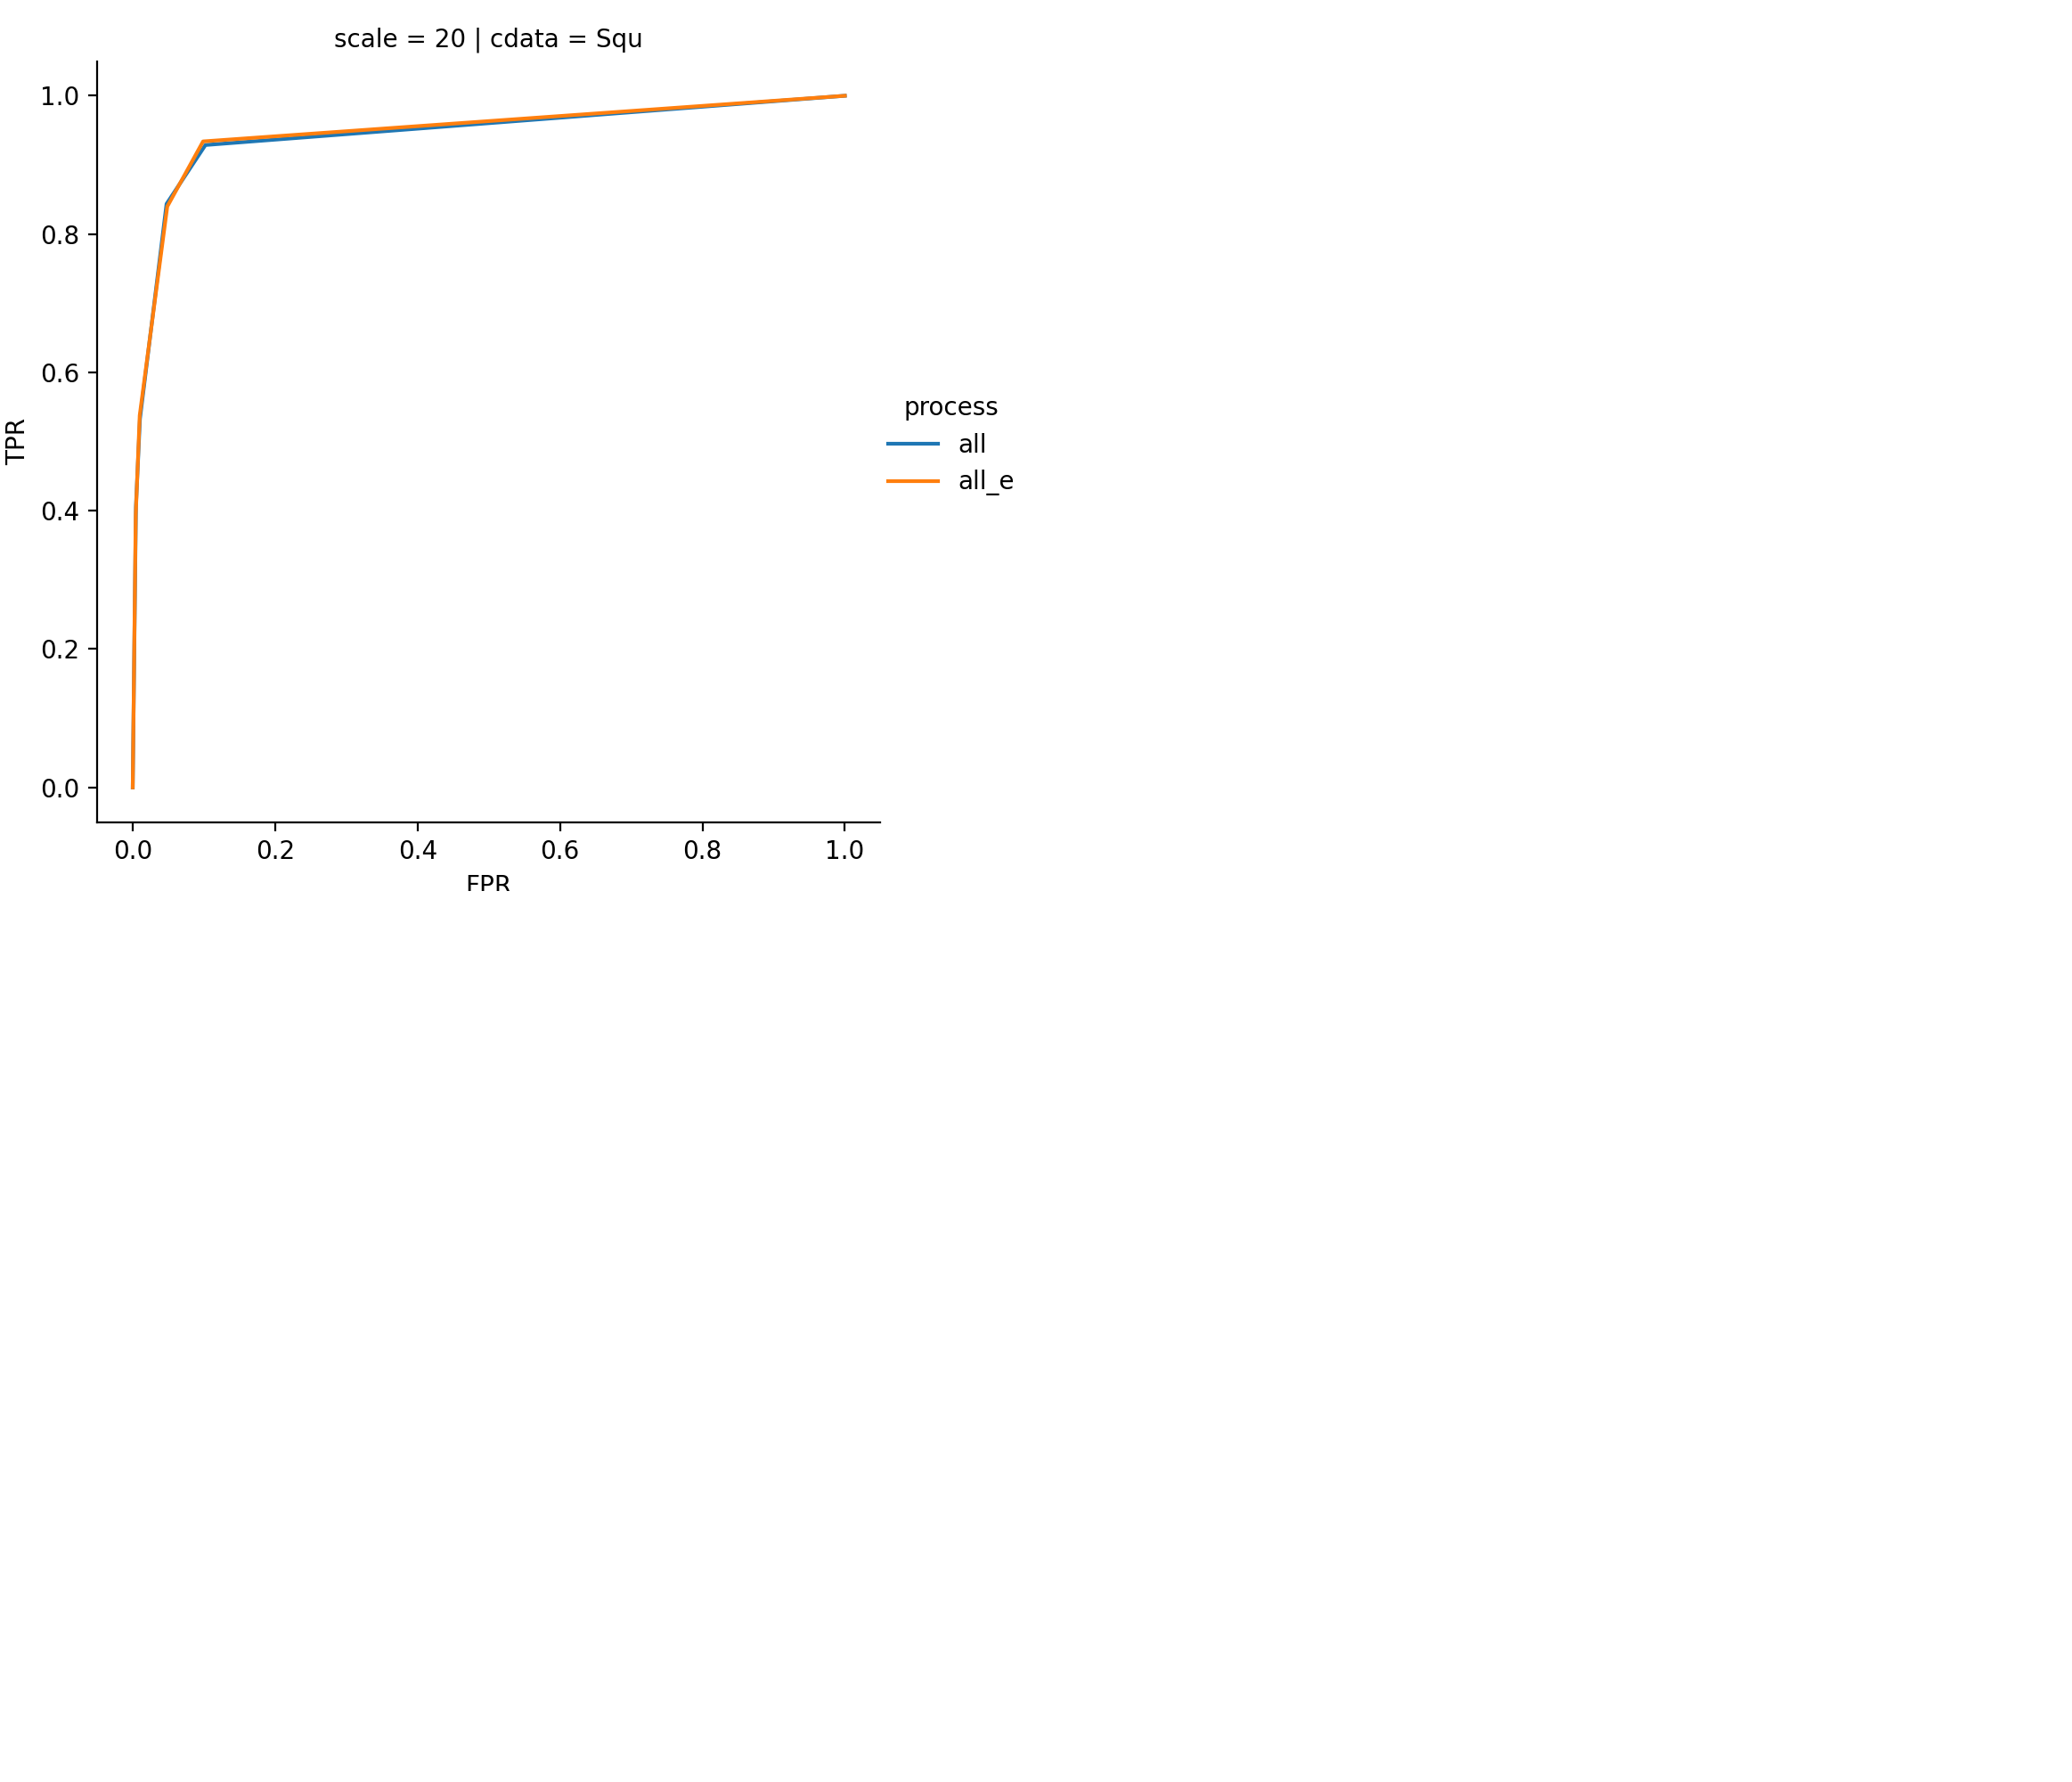

In [830]:
draw_roc(add_ends(df), "N", 10)

In [833]:
vdfsAll[(vdfsAll["cdata"]=="Squ") & (vdfsAll["process"]=="all")]

cdata tdata  scale process       bs  alpha     val  result
5040   Squ   AwA      0     all     10.0  0.005  0.0045  0.0197
5041   Squ     D      1     all     10.0  0.005  0.0045  0.1381
5042   Squ     D      5     all     10.0  0.005  0.0045  0.6812
5043   Squ     D     10     all     10.0  0.005  0.0045  0.9428
5044   Squ     D     20     all     10.0  0.005  0.0045  0.9686
5045   Squ     D     30     all     10.0  0.005  0.0045  0.7985
5046   Squ     D     40     all     10.0  0.005  0.0045  0.5580
5047   Squ     D     50     all     10.0  0.005  0.0045  0.4434
5048   Squ     D     60     all     10.0  0.005  0.0045  0.5382
5049   Squ     D     80     all     10.0  0.005  0.0045  0.9515
5050   Squ     D    100     all     10.0  0.005  0.0045  1.0000
5051   Squ     N      5     all     10.0  0.005  0.0045  0.0053
5052   Squ     N     10     all     10.0  0.005  0.0045  0.0268
5053   Squ     N     15     all     10.0  0.005  0.0045  0.1523
5054   Squ     N     20     all     10.0  0.005  0.0045  0.4064
5055   Squ     N     30     all     10.0  0.005  0.0045  0.7740
5056   Squ     N     50     all     10.0  0.005  0.0045  0.9765
5057   Squ     N    100     all     10.0  0.005  0.0045  1.0000
5058   Squ   AwA      0     all     10.0  0.010  0.0101  0.0386
5059   Squ     D      1     all     10.0  0.010  0.0101  0.2278
5060   Squ     D      5     all     10.0  0.010  0.0101  0.7846
5061   Squ     D     10     all     10.0  0.010  0.0101  0.9748
5062   Squ     D     20     all     10.0  0.010  0.0101  0.9873
5063   Squ     D     30     all     10.0  0.010  0.0101  0.8951
5064   Squ     D     40     all     10.0  0.010  0.0101  0.7088
5065   Squ     D     50     all     10.0  0.010  0.0101  0.6229
5066   Squ     D     60     all     10.0  0.010  0.0101  0.7272
5067   Squ     D     80     all     10.0  0.010  0.0101  0.9913
5068   Squ     D    100     all     10.0  0.010  0.0101  1.0000
5069   Squ     N      5     all     10.0  0.010  0.0101  0.0108
5070   Squ     N     10     all     10.0  0.010  0.0101  0.0485
5071   Squ     N     15     all     10.0  0.010  0.0101  0.2230
5072   Squ     N     20     all     10.0  0.010  0.0101  0.5324
5073   Squ     N     30     all     10.0  0.010  0.0101  0.8749
5074   Squ     N     50     all     10.0  0.010  0.0101  0.9920
5075   Squ     N    100     all     10.0  0.010  0.0101  1.0000
5076   Squ   AwA      0     all     10.0  0.050  0.0475  0.1224
5077   Squ     D      1     all     10.0  0.050  0.0475  0.5509
5078   Squ     D      5     all     10.0  0.050  0.0475  0.9499
5079   Squ     D     10     all     10.0  0.050  0.0475  0.9986
5080   Squ     D     20     all     10.0  0.050  0.0475  0.9993
5081   Squ     D     30     all     10.0  0.050  0.0475  0.9905
5082   Squ     D     40     all     10.0  0.050  0.0475  0.9460
5083   Squ     D     50     all     10.0  0.050  0.0475  0.9424
5084   Squ     D     60     all     10.0  0.050  0.0475  0.9802
5085   Squ     D     80     all     10.0  0.050  0.0475  1.0000
5086   Squ     D    100     all     10.0  0.050  0.0475  1.0000
5087   Squ     N      5     all     10.0  0.050  0.0475  0.0497
5088   Squ     N     10     all     10.0  0.050  0.0475  0.1695
5089   Squ     N     15     all     10.0  0.050  0.0475  0.5123
5090   Squ     N     20     all     10.0  0.050  0.0475  0.8437
5091   Squ     N     30     all     10.0  0.050  0.0475  0.9841
5092   Squ     N     50     all     10.0  0.050  0.0475  0.9999
5093   Squ     N    100     all     10.0  0.050  0.0475  1.0000
5094   Squ   AwA      0     all     10.0  0.100  0.1021  0.2107
5095   Squ     D      1     all     10.0  0.100  0.1021  0.7027
5096   Squ     D      5     all     10.0  0.100  0.1021  0.9810
5097   Squ     D     10     all     10.0  0.100  0.1021  0.9996
5098   Squ     D     20     all     10.0  0.100  0.1021  1.0000
5099   Squ     D     30     all     10.0  0.100  0.1021  0.9983
5100   Squ     D     40     all     10.0  0.100  0.1021  0.9865
5101   Squ     D     50     all     1